# Chapter 6.2. Identification of Hidden Subgenres

In [1]:
import sys
import os
import shutil
import datetime
import re
import pandas as pd
from collections import Counter
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from reading_robot import load_data, tei2text, text2features, classify, process_labels, describe_data,feature_analysis, cull_data, st_tests, metadata2numbers, cluster, call_stylo, prepare_subcorpus
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
%matplotlib inline


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
ne_dir = "/home/jose/Dropbox/Doktorarbeit/novelasespanolas/"

In [3]:
wdir = "/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/"

# 6.2.0. Getting Data

## Getting Files

In [4]:
"""
from reading_robot import load_data, get_metadata
get_metadata.from_TEIP5("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/","master/*.xml","metadata","beta-opt-obl-structure")
"""

'\nfrom reading_robot import load_data, get_metadata\nget_metadata.from_TEIP5("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/","master/*.xml","metadata","beta-opt-obl-structure")\n'

In [5]:
from shutil import copyfile
parquet_files_lt = ["tokens_freq_table_raw_10000_T","lemma_freq_table_raw_10000_T","sem_anno_freq_table_raw_10000_T","tags_tokens_corpus_10000_T","ling_anno_freq_table_raw_10000_T","authorial_zscores_10000_T","lemma_freq_table_raw_10000_T","tags_ling_pos_diff_mw_ord_ent_70000_T"]
for file_st in parquet_files_lt:
    print(wdir + file_st + ".parquet")
    copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/" + file_st + ".parquet", wdir + file_st + ".parquet")
copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_beta-opt-obl-structure.csv", wdir + "metadata_beta-opt-obl-structure.csv")
copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/quantified_subgenreClasses.csv", wdir + "quantified_subgenreClasses.csv")
copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_recategorized.csv", wdir + "metadata_recategorized.csv")


/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/tokens_freq_table_raw_10000_T.parquet
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/lemma_freq_table_raw_10000_T.parquet
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/sem_anno_freq_table_raw_10000_T.parquet
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/tags_tokens_corpus_10000_T.parquet
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/ling_anno_freq_table_raw_10000_T.parquet
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/authorial_zscores_10000_T.parquet
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/lemma_freq_table_raw_10000_T.parquet
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/tags_ling_pos_diff_mw_ord_ent_70000_T.parquet


'/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/metadata_recategorized.csv'

## Getting Metadata

In [6]:
metadata_df = pd.read_csv(wdir+"metadata_beta-opt-obl-structure.csv",index_col=0,sep=",").fillna(0)
metadata_df.shape

(358, 177)

In [7]:
metadata_df.head()

idno author.name         title  year supergenre   genre  \
ne0001  ne0001      Baroja     Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos  Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos       Nazarin  1895  narrative  novela   
ne0004  ne0004      Galdos         Halma  1895  narrative  novela   
ne0005  ne0005      Galdos      Tristana  1892  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  ...    \
ne0001                  realist          Spain   36912891.0   XX842743  ...     
ne0002                  realist          Spain   71395987.0  XX1014802  ...     
ne0003                  realist          Spain   71395987.0  XX1014802  ...     
ne0004                  realist          Spain   71395987.0  XX1014802  ...     
ne0005            bildungsroman          Spain   71395987.0  XX1014802  ...     

       am.wnlex.noun.Topss am.wnlex.noun.relations am.wnlex.noun.attributes  \
ne0001                 121                      13                      483   
ne0002                 239                      39                      821   
ne0003                 253                      17                      725   
ne0004                 288                      24                     1061   
ne0005                 191                      17                      705   

       am.wnlex.verb.emotions am.wnlex.noun.locations am.wnlex.noun.events  \
ne0001                    200                     312                  177   
ne0002                    314                     336                  355   
ne0003                    396                     301                  327   
ne0004                    424                     282                  248   
ne0005                    456                     174                  229   

       am.wnlex.verb.contacts am.wnlex.xxxs am.wnlex.verb.changes decade  
ne0001                    518         41371                   655   1900  
ne0002                    684         70169                   764   1880  
ne0003                    498         54401                   572   1890  
ne0004                    450         60648                   553   1890  
ne0005                    415         43359                   446   1890  

[5 rows x 177 columns]

In [8]:
quantified_subgenre_df = pd.read_csv(wdir+"quantified_subgenreClasses.csv",sep="\t", index_col=0)
quantified_subgenre_df.head()

autobiografía  aventura  biografía  costumbrista  diálogo  educación  \
ne0001              0         1          0             0        0          0   
ne0002              0         0          0             0        0          0   
ne0003              0         0          0             0        0          0   
ne0004              0         0          0             0        0          0   
ne0005              0         0          0             0        0          1   

        episodio nacional  erótica  espiritual  fantástico        ...          \
ne0001                  0        0           0           0        ...           
ne0002                  0        0           0           1        ...           
ne0003                  0        0           2           0        ...           
ne0004                  0        0           2           0        ...           
ne0005                  0        0           2           0        ...           

        humor  memorias  modernista  naturalista  nivola  poética  \
ne0001      0         0           0            1       0        0   
ne0002      0         0           0            1       0        0   
ne0003      0         0           0            1       0        0   
ne0004      0         0           0            0       0        0   
ne0005      0         0           0            1       0        0   

        psicológica  realista  social  ficción-literaria  
ne0001            0         1       1                  4  
ne0002            0         2       1                  6  
ne0003            0         1       1                  2  
ne0004            0         2       1                  1  
ne0005            0         2       1                  6  

[5 rows x 24 columns]

In [9]:
semantic_subgenres_lt = quantified_subgenre_df.columns.tolist()

In [10]:
bool_quantified_subgenre_df = (quantified_subgenre_df > 0).astype(int)
bool_quantified_subgenre_df.head()

autobiografía  aventura  biografía  costumbrista  diálogo  educación  \
ne0001              0         1          0             0        0          0   
ne0002              0         0          0             0        0          0   
ne0003              0         0          0             0        0          0   
ne0004              0         0          0             0        0          0   
ne0005              0         0          0             0        0          1   

        episodio nacional  erótica  espiritual  fantástico        ...          \
ne0001                  0        0           0           0        ...           
ne0002                  0        0           0           1        ...           
ne0003                  0        0           1           0        ...           
ne0004                  0        0           1           0        ...           
ne0005                  0        0           1           0        ...           

        humor  memorias  modernista  naturalista  nivola  poética  \
ne0001      0         0           0            1       0        0   
ne0002      0         0           0            1       0        0   
ne0003      0         0           0            1       0        0   
ne0004      0         0           0            0       0        0   
ne0005      0         0           0            1       0        0   

        psicológica  realista  social  ficción-literaria  
ne0001            0         1       1                  1  
ne0002            0         1       1                  1  
ne0003            0         1       1                  1  
ne0004            0         1       1                  1  
ne0005            0         1       1                  1  

[5 rows x 24 columns]

In [11]:
new_metadata_df = pd.concat([metadata_df, bool_quantified_subgenre_df], axis=1)
new_metadata_df = new_metadata_df.loc[(new_metadata_df["genre.analyzed"]=="novela")]
new_metadata_df.shape

(352, 201)

In [12]:
new_metadata_df.head()

idno author.name         title  year supergenre   genre  \
ne0001  ne0001      Baroja     Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos  Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos       Nazarin  1895  narrative  novela   
ne0004  ne0004      Galdos         Halma  1895  narrative  novela   
ne0005  ne0005      Galdos      Tristana  1892  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  \
ne0001                  realist          Spain   36912891.0   XX842743   
ne0002                  realist          Spain   71395987.0  XX1014802   
ne0003                  realist          Spain   71395987.0  XX1014802   
ne0004                  realist          Spain   71395987.0  XX1014802   
ne0005            bildungsroman          Spain   71395987.0  XX1014802   

              ...        humor memorias modernista naturalista nivola poética  \
ne0001        ...            0        0          0           1      0       0   
ne0002        ...            0        0          0           1      0       0   
ne0003        ...            0        0          0           1      0       0   
ne0004        ...            0        0          0           0      0       0   
ne0005        ...            0        0          0           1      0       0   

       psicológica realista social ficción-literaria  
ne0001           0        1      1                 1  
ne0002           0        1      1                 1  
ne0003           0        1      1                 1  
ne0004           0        1      1                 1  
ne0005           0        1      1                 1  

[5 rows x 201 columns]

In [13]:
new_metadata_df["subgenre.random"] = new_metadata_df.sample(frac=1)["subgenre.cligs.important"].tolist()

In [14]:
metadata_df.groupby("subgenre.cligs.important").nunique().sort_values(by="idno")[["idno"]]

idno
subgenre.cligs.important      
vanguardist                  1
fantastic                    4
memoir                       4
naturalist                   5
comedy                       8
dialogue                     9
autobiographical            13
erotic                      14
social                      20
adventure                   21
philosophical               36
sentimental                 39
bildungsroman               41
historical                  53
realist                     90

In [15]:
metadata_recategorized_df = pd.read_csv(wdir+"metadata_recategorized.csv",sep="\t", index_col=0)
metadata_recategorized_df.head()

idno author.name         title  year supergenre   genre  \
ne0001  ne0001      Baroja     Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos  Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos       Nazarin  1895  narrative  novela   
ne0004  ne0004      Galdos         Halma  1895  narrative  novela   
ne0005  ne0005      Galdos      Tristana  1892  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  \
ne0001                  realist          Spain   36912891.0   XX842743   
ne0002                  realist          Spain   71395987.0  XX1014802   
ne0003                  realist          Spain   71395987.0  XX1014802   
ne0004                  realist          Spain   71395987.0  XX1014802   
ne0005            bildungsroman          Spain   71395987.0  XX1014802   

                ...           author.movement_ordinal  \
ne0001          ...                                 1   
ne0002          ...                                 0   
ne0003          ...                                 0   
ne0004          ...                                 0   
ne0005          ...                                 0   

       author.submovement_ordinal authorText.relation_ordinal  \
ne0001                          4                           0   
ne0002                          0                           0   
ne0003                          0                           0   
ne0004                          0                           0   
ne0005                          0                           0   

       litHist.brow_ordinal setting.type_ordinal time.period_ordinal  \
ne0001                  NaN                    1                   3   
ne0002                  NaN                    3                   3   
ne0003                  0.0                    -                   3   
ne0004                  NaN                    3                   3   
ne0005                  NaN                    3                   3   

       protagonist.age_ordinal protagonist.socLevel_ordinal end_ordinal  \
ne0001                       3                            2           4   
ne0002                       2                            0           0   
ne0003                       2                            0           4   
ne0004                       2                            2           4   
ne0005                       1                            0           3   

       representation_ordinal  
ne0001                      2  
ne0002                      2  
ne0003                      2  
ne0004                      2  
ne0005                      2  

[5 rows x 183 columns]

In [16]:
ordinal_metadata_lt = ['author.movement_ordinal', 'author.submovement_ordinal', 'authorText.relation_ordinal', 'litHist.brow_ordinal', 'setting.type_ordinal', 'time.period_ordinal', 'protagonist.age_ordinal', 'protagonist.socLevel_ordinal', 'end_ordinal', 'representation_ordinal']

new_metadata_df[ordinal_metadata_lt] = metadata_recategorized_df[ordinal_metadata_lt]

In [17]:
new_metadata_df.head()

idno author.name         title  year supergenre   genre  \
ne0001  ne0001      Baroja     Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos  Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos       Nazarin  1895  narrative  novela   
ne0004  ne0004      Galdos         Halma  1895  narrative  novela   
ne0005  ne0005      Galdos      Tristana  1892  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  \
ne0001                  realist          Spain   36912891.0   XX842743   
ne0002                  realist          Spain   71395987.0  XX1014802   
ne0003                  realist          Spain   71395987.0  XX1014802   
ne0004                  realist          Spain   71395987.0  XX1014802   
ne0005            bildungsroman          Spain   71395987.0  XX1014802   

                ...           author.movement_ordinal  \
ne0001          ...                                 1   
ne0002          ...                                 0   
ne0003          ...                                 0   
ne0004          ...                                 0   
ne0005          ...                                 0   

       author.submovement_ordinal authorText.relation_ordinal  \
ne0001                          4                           0   
ne0002                          0                           0   
ne0003                          0                           0   
ne0004                          0                           0   
ne0005                          0                           0   

       litHist.brow_ordinal setting.type_ordinal time.period_ordinal  \
ne0001                  NaN                    1                   3   
ne0002                  NaN                    3                   3   
ne0003                  0.0                    -                   3   
ne0004                  NaN                    3                   3   
ne0005                  NaN                    3                   3   

       protagonist.age_ordinal protagonist.socLevel_ordinal end_ordinal  \
ne0001                       3                            2           4   
ne0002                       2                            0           0   
ne0003                       2                            0           4   
ne0004                       2                            2           4   
ne0005                       1                            0           3   

       representation_ordinal  
ne0001                      2  
ne0002                      2  
ne0003                      2  
ne0004                      2  
ne0005                      2  

[5 rows x 212 columns]

In [18]:
new_metadata_df = metadata2numbers.replace_non_numerical_with_mode(new_metadata_df)

In [19]:
metadata_features_lt = [ 'narrator', 'protagonist.gender',  
                        'protagonist.age',  'protagonist.profession',
                        'setting.continent', 'setting.country', 'setting.territory', 
                        'time.span',  "time.period",
                        'setting.settlement.represented.exist', 'setting.represented',
                       ]
ordinal_features_lt = ["setting.type_ordinal","time.period_ordinal","protagonist.age_ordinal","protagonist.socLevel_ordinal","end_ordinal"]
internal_metadata_features_lt = metadata_features_lt + ordinal_features_lt

external_metadata_features_lt = ['year','decade','litHist.pages','litHist.literaryQuality',]
author_metadata_features_lt = ['author.litHist.pages','authorText.relation','author.name',"author.date.birth","author.date.death", "author.gender"]

complete_metadata_features_lt = external_metadata_features_lt + internal_metadata_features_lt + author_metadata_features_lt

In [20]:
metadata_as_features_df = pd.get_dummies(new_metadata_df[metadata_features_lt])
metadata_as_features_df[ordinal_features_lt] = new_metadata_df[ordinal_features_lt]

In [21]:
norm_metadata_as_features_df = text2features.calculate_minmax(metadata_as_features_df)

In [22]:
norm_metadata_as_features_df

time.span  setting.settlement.represented.exist  \
ne0001   0.014286                                   1.0   
ne0002   0.003523                                   1.0   
ne0003   0.003523                                   1.0   
ne0004   0.014286                                   1.0   
ne0005   0.070450                                   1.0   
ne0006   0.071429                                   1.0   
ne0007   0.014286                                   1.0   
ne0008   0.005871                                   1.0   
ne0009   0.071429                                   1.0   
ne0010   0.014286                                   1.0   
ne0011   0.028571                                   1.0   
ne0013   0.000117                                   1.0   
ne0014   0.000274                                   1.0   
ne0015   0.000274                                   1.0   
ne0016   0.000587                                   1.0   
ne0017   0.001174                                   1.0   
ne0018   0.014286                                   1.0   
ne0019   0.005871                                   1.0   
ne0020   0.000587                                   1.0   
ne0021   0.000587                                   1.0   
ne0022   0.000587                                   1.0   
ne0024   0.042857                                   1.0   
ne0025   0.042857                                   1.0   
ne0026   0.014286                                   1.0   
ne0027   0.014286                                   1.0   
ne0028   0.014286                                   1.0   
ne0029   0.057143                                   1.0   
ne0030   0.000117                                   1.0   
ne0031   0.028571                                   1.0   
ne0032   0.005871                                   1.0   
...           ...                                   ...   
ne0360   0.000000                                   1.0   
ne0361   0.000000                                   1.0   
ne0362   0.014286                                   1.0   
ne0363   0.000000                                   1.0   
ne0364   0.014286                                   1.0   
ne0365   0.857143                                   0.0   
ne0370   0.028571                                   0.0   
ne0373   0.014286                                   1.0   
ne0378   0.014286                                   0.0   
ne0379   0.014286                                   0.0   
ne0380   0.014286                                   0.0   
ne0381   0.004697                                   0.0   
ne0382   0.014286                                   1.0   
ne0384   0.042857                                   1.0   
ne0385   0.014286                                   1.0   
ne0387   0.428571                                   1.0   
ne0388   0.014286                                   1.0   
ne0390   0.042857                                   1.0   
ne0391   0.028571                                   1.0   
ne0392   0.028571                                   1.0   
ne0393   0.014286                                   1.0   
ne0394   0.071429                                   1.0   
ne0395   0.014286                                   1.0   
ne0396   0.000000                                   1.0   
ne0397   0.014286                                   0.0   
ne0398   0.000000                                   1.0   
ne0399   0.042857                                   1.0   
ne0401   0.014286                                   0.0   
ne0403   0.014286                                   1.0   
ne0404   0.000313                                   1.0   

        narrator_autodiegetic  narrator_dialogue  narrator_epistolary  \
ne0001                    0.0                0.0                  0.0   
ne0002                    0.0                0.0                  0.0   
ne0003                    0.0                0.0                  0.0   
ne0004                    0.0                0.0         

In [23]:
len(norm_metadata_as_features_df.columns.tolist())

287

In [24]:
norm_metadata_as_features_df = norm_metadata_as_features_df[['time.span', 'setting.settlement.represented.exist', 'narrator_autodiegetic', 'narrator_dialogue', 'narrator_epistolary', 'narrator_heterodiegetic', 'narrator_homodiegetic', 'narrator_mixed', 'protagonist.gender_female', 'protagonist.gender_male', 'protagonist.gender_mixed', 'protagonist.gender_other', 'protagonist.age_?', 'protagonist.age_adult', 'protagonist.age_child', 'protagonist.age_mature', 'protagonist.age_other', 'protagonist.age_unknown', 'protagonist.age_young', 
'time.period_ordinal', 'protagonist.age_ordinal', 'protagonist.socLevel_ordinal', 'end_ordinal', 'setting.type_ordinal',
 'setting.continent_mixed',  'setting.country_mixed', 'setting.country_other', 'setting.country_unknown', 'setting.territory_mixed', 'setting.territory_other', 'setting.territory_unknown', 'protagonist.profession_mixed','protagonist.profession_unknown', 'setting.represented_mixed', 'setting.represented_other', 'setting.represented_unknown', 
'protagonist.profession_?', 'protagonist.profession_adventurer', 'protagonist.profession_artist', 'protagonist.profession_beggar', 'protagonist.profession_business owner', 'protagonist.profession_bussines owner', 'protagonist.profession_criminal', 'protagonist.profession_detective', 'protagonist.profession_doctor', 'protagonist.profession_housewife', 'protagonist.profession_journalist', 'protagonist.profession_lord', 'protagonist.profession_military personnel',  'protagonist.profession_none', 'protagonist.profession_other', 'protagonist.profession_player', 'protagonist.profession_politician', 'protagonist.profession_prostitute', 'protagonist.profession_public servant', 'protagonist.profession_religious', 'protagonist.profession_researcher', 'protagonist.profession_seaman', 'protagonist.profession_seller', 'protagonist.profession_servant', 'protagonist.profession_student', 'protagonist.profession_teacher',  'protagonist.profession_wizard', 'protagonist.profession_worker', 'protagonist.profession_writer',
'setting.continent_Africa', 'setting.continent_America', 'setting.continent_Asia', 'setting.continent_Europe', 'setting.continent_Oceania','setting.continent_other',
'setting.country_?', 'setting.country_Arabian Peninsula', 'setting.country_Argentina', 'setting.country_Atarjea', 'setting.country_Australia', 'setting.country_Dacia', 'setting.country_Ebania', 'setting.country_Farsalia Nova', 'setting.country_France', 'setting.country_Germany', 'setting.country_Guinea', 'setting.country_Israel', 'setting.country_Italy', 'setting.country_Marocco', 'setting.country_Maya', 'setting.country_Mexico', 'setting.country_Netherlands', 'setting.country_Portugal', 'setting.country_República Dominicana', 'setting.country_Roman Empire', 'setting.country_Santa Fe de Tierra', 'setting.country_South Africa', 'setting.country_Spain', 'setting.country_Surlandia', 'setting.country_Switzerland', 'setting.country_United Kingdom', 'setting.country_United States of America',
'setting.territory_0', 'setting.territory_?', 'setting.territory_Andalucía', 'setting.territory_Aquitania', 'setting.territory_Aragón', 'setting.territory_Asturias', 'setting.territory_Baden-Würtenberg', 'setting.territory_Bretaña', 'setting.territory_Buenos Aires', 'setting.territory_California', 'setting.territory_Campania', 'setting.territory_Cantabria', 'setting.territory_Castilla', 'setting.territory_Cataluña', 'setting.territory_Comunidad Valenciana', 'setting.territory_Comunidad valenciana', 'setting.territory_Costa de México', 'setting.territory_Dacia', 'setting.territory_Eban', 'setting.territory_Extremadura', 'setting.territory_Galicia', 'setting.territory_Ginebra', 'setting.territory_Granburgo', 'setting.territory_Holanda', 'setting.territory_Inglaterra', 'setting.territory_Isla de Francia', 'setting.territory_Islas Baleares', 'setting.territory_Israel', 'setting.territory_Johannesburgo', 'setting.territory_León', 'setting.territory_Liguria', 'setting.territory_Liliput', 'setting.territory_Lisboa', 'setting.territory_Londres', 'setting.territory_Madrid', 'setting.territory_Mallorca', 'setting.territory_Maya', 'setting.territory_Murcia', 'setting.territory_Navarra', 'setting.territory_Negrimia', 'setting.territory_Norte de Marruecos', 'setting.territory_Nápoles', 'setting.territory_Patagonia', 'setting.territory_País Vasco', 'setting.territory_Protectorado Español de Marruecos', 'setting.territory_Provenza-Alpes-Costa Azul', 'setting.territory_Roma', 'setting.territory_Santa Mónica', 'setting.territory_Santo Domingo', 'setting.territory_Surlandia', 'setting.territory_Ursaria', 'setting.territory_Valencia', 
'setting.represented_?', 'setting.represented_Aduero', 'setting.represented_Africa', 'setting.represented_Alcalá de Henares', 'setting.represented_Alcera', 'setting.represented_Alicante', 'setting.represented_Almería', 'setting.represented_Almina', 'setting.represented_America', 'setting.represented_Andalucía', 'setting.represented_Annual', 'setting.represented_Arabian Peninsula', 'setting.represented_Arbea', 'setting.represented_Arizcun', 'setting.represented_Asturias', 'setting.represented_Australia', 'setting.represented_Avilés', 'setting.represented_Badajoz', 'setting.represented_Barcelona', 'setting.represented_Belalcázar', 'setting.represented_Benicarló', 'setting.represented_Biarritz', 'setting.represented_Bidasoa', 'setting.represented_Bilbao', 'setting.represented_Birmingham', 'setting.represented_Boraida', 'setting.represented_Brandeso', 'setting.represented_Bretaña', 'setting.represented_Buenos Aires', 'setting.represented_Burgos', 'setting.represented_Cantabria', 'setting.represented_Cartagena', 'setting.represented_Casa Viejas', 'setting.represented_Castilla', 'setting.represented_Castroviejo', 'setting.represented_Cataluña', 'setting.represented_Comunidad Valenciana', 'setting.represented_Comunidad valenciana', 'setting.represented_Condado', 'setting.represented_Confines', 'setting.represented_Conjo', 'setting.represented_Covadonga', 'setting.represented_Cumbrales', 'setting.represented_Cádiz', 'setting.represented_Córdoba', 'setting.represented_El Escorial', 'setting.represented_Entralgo', 'setting.represented_Estella', 'setting.represented_Europe', 'setting.represented_Extremadura', 'setting.represented_Feleches', 'setting.represented_France', 'setting.represented_Galicia', 'setting.represented_Gibraltar', 'setting.represented_Ginebra', 'setting.represented_Granburgo', 'setting.represented_Guadix', 'setting.represented_Guinea', 'setting.represented_Iberina', 'setting.represented_Inestrillas', 'setting.represented_Jaca', 'setting.represented_Jaén', 'setting.represented_Jerez', 'setting.represented_Jerusalén', 'setting.represented_Johannesburgo', 'setting.represented_La Coruña', 'setting.represented_Labraz', 'setting.represented_Liguria', 'setting.represented_Lisboa', 'setting.represented_Londres', 'setting.represented_Los Ángeles', 'setting.represented_Madrid', 'setting.represented_Majuelos', 'setting.represented_Mallorca', 'setting.represented_Mexico', 'setting.represented_Moguer', 'setting.represented_Monte-Carlo', 'setting.represented_México', 'setting.represented_Navalarga', 'setting.represented_Navarra', 'setting.represented_Nieva', 'setting.represented_Nápoles', 'setting.represented_Oleza', 'setting.represented_Otaín', 'setting.represented_Oviedo', 'setting.represented_Palau Solitar', 'setting.represented_Palma de Mallorca', 'setting.represented_Parcent', 'setting.represented_París', 'setting.represented_País Vasco', 'setting.represented_Peñascosa', 'setting.represented_Pilares', 'setting.represented_Presa', 'setting.represented_Riotinto', 'setting.represented_Robleces', 'setting.represented_Roccanera', 'setting.represented_Rodillero', 'setting.represented_Roma', 'setting.represented_Rotterdam', 'setting.represented_Sagunto', 'setting.represented_Salamanca', 'setting.represented_San Sebastián', 'setting.represented_Sanabria', 'setting.represented_Santander', 'setting.represented_Santillana del Mar', 'setting.represented_Santo Domingo', 'setting.represented_Segovía', 'setting.represented_Selva Negra', 'setting.represented_Serandinas', 'setting.represented_Serosca', 'setting.represented_Sevilla', 'setting.represented_Spain', 'setting.represented_Tetuán', 'setting.represented_Toledo', 'setting.represented_Torremar', 'setting.represented_Ursaria', 'setting.represented_Valdecines', 'setting.represented_Valdecruces', 'setting.represented_Valdezotes', 'setting.represented_Valencia', 'setting.represented_Vegalora', 'setting.represented_Vera de Bidasoa', 'setting.represented_Viana del Prior', 'setting.represented_Vilamorta', 'setting.represented_Villaalegre', 'setting.represented_Villaclara', 'setting.represented_Villaruin', 'setting.represented_Vlasta', 'setting.represented_Yecla', 'setting.represented_Zaratán',
                             ]]

## Getting Features

In [25]:
parquet_files_lt

['tokens_freq_table_raw_10000_T',
 'lemma_freq_table_raw_10000_T',
 'sem_anno_freq_table_raw_10000_T',
 'tags_tokens_corpus_10000_T',
 'ling_anno_freq_table_raw_10000_T',
 'authorial_zscores_10000_T',
 'lemma_freq_table_raw_10000_T',
 'tags_ling_pos_diff_mw_ord_ent_70000_T']

In [26]:
sem_anno_df = pd.read_parquet(wdir+"sem_anno_freq_table_raw_10000_T.parquet").T
sem_anno_df = sem_anno_df.loc[new_metadata_df.index]
print(sem_anno_df.shape)
sem_anno_df.head()

(352, 1828)


/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


verb.stative@wnlex  adj.all@wnlex  tiempo@mariax  noun.person@wnlex  \
ne0001                2104           2025           1312               1382   
ne0002                3516           3238           2138               1738   
ne0003                2748           2427           1555               1393   
ne0004                3294           3323           1739               1821   
ne0005                2187           2394           1436               1074   

        noun.artifact@wnlex  decir@mariax  tratar@mariax  \
ne0001                 1653          1222           1031   
ne0002                 1762          2167           2006   
ne0003                 1130          1714           1448   
ne0004                 1073          2037           2029   
ne0005                  837          1309           1086   

        verb.communication@wnlex  baraja@mariax  adv.all@wnlex      ...        \
ne0001                      1174           1182            815      ...         
ne0002                      1652           1557           1589      ...         
ne0003                      1327           1231           1272      ...         
ne0004                      1682           1192           1392      ...         
ne0005                       936           1033           1159      ...         

        cardenal@mariax  glándula@mariax  africano@mariax  fósil@mariax  \
ne0001                2                0                1             0   
ne0002                2                5               38             1   
ne0003                6                1               20             1   
ne0004                5                1                1             0   
ne0005                1                0                4             0   

        loro@mariax  siempre@mariax  adj.ppl@wnlex  liebre@mariax  \
ne0001            7               0              3              3   
ne0002            2               6              1              1   
ne0003            3               0              1              4   
ne0004            0               2              8              0   
ne0005            0               2              1              0   

        lechuza@mariax  cáncer@mariax  
ne0001               2              0  
ne0002               0              0  
ne0003               0              0  
ne0004               0              0  
ne0005               0              0  

[5 rows x 1828 columns]

In [27]:
rel_sem_anno_df = sem_anno_df.divide(metadata_df["am.tokens"],axis=0)
rel_sem_anno_df = rel_sem_anno_df.loc[new_metadata_df.index]
rel_sem_anno_df.head()

verb.stative@wnlex  adj.all@wnlex  tiempo@mariax  noun.person@wnlex  \
ne0001            0.039271       0.037796       0.024488           0.025795   
ne0002            0.041962       0.038644       0.025516           0.020742   
ne0003            0.042451       0.037492       0.024022           0.021519   
ne0004            0.044907       0.045303       0.023708           0.024826   
ne0005            0.041607       0.045545       0.027320           0.020433   

        noun.artifact@wnlex  decir@mariax  tratar@mariax  \
ne0001             0.030853      0.022808       0.019243   
ne0002             0.021029      0.025862       0.023941   
ne0003             0.017456      0.026478       0.022369   
ne0004             0.014628      0.027771       0.027662   
ne0005             0.015924      0.024903       0.020661   

        verb.communication@wnlex  baraja@mariax  adv.all@wnlex      ...        \
ne0001                  0.021912       0.022062       0.015212      ...         
ne0002                  0.019716       0.018582       0.018964      ...         
ne0003                  0.020500       0.019017       0.019650      ...         
ne0004                  0.022931       0.016251       0.018977      ...         
ne0005                  0.017807       0.019653       0.022050      ...         

        cardenal@mariax  glándula@mariax  africano@mariax  fósil@mariax  \
ne0001         0.000037         0.000000         0.000019      0.000000   
ne0002         0.000024         0.000060         0.000454      0.000012   
ne0003         0.000093         0.000015         0.000309      0.000015   
ne0004         0.000068         0.000014         0.000014      0.000000   
ne0005         0.000019         0.000000         0.000076      0.000000   

        loro@mariax  siempre@mariax  adj.ppl@wnlex  liebre@mariax  \
ne0001     0.000131        0.000000       0.000056       0.000056   
ne0002     0.000024        0.000072       0.000012       0.000012   
ne0003     0.000046        0.000000       0.000015       0.000062   
ne0004     0.000000        0.000027       0.000109       0.000000   
ne0005     0.000000        0.000038       0.000019       0.000000   

        lechuza@mariax  cáncer@mariax  
ne0001        0.000037            0.0  
ne0002        0.000000            0.0  
ne0003        0.000000            0.0  
ne0004        0.000000            0.0  
ne0005        0.000000            0.0  

[5 rows x 1828 columns]

In [28]:
tokens_df = pd.read_parquet(wdir+"tokens_freq_table_raw_10000_T.parquet").T
tokens_df = tokens_df.loc[new_metadata_df.index]
tokens_df.head()

,     .    de    la     y   que    el    en     a  los   ...    \
ne0001  3414  2780  2628  2003  1914  1335  1646  1211  1218  767   ...     
ne0002  8003  7249  4270  3087  3161  3256  1638  1872  1934  894   ...     
ne0003  6493  4845  3020  2186  2650  2756  1532  1385  1453  706   ...     
ne0004  7411  5703  3675  2552  2640  2768  1575  1616  1631  755   ...     
ne0005  4827  4682  2670  1610  1887  2022   984  1059  1023  517   ...     

        agradezcan  lloviznando  aparento  iznayas  azotándose  poniéndolas  \
ne0001           0            0         0        0           0            0   
ne0002           0            0         0        0           0            0   
ne0003           0            0         0        0           0            0   
ne0004           0            0         0        0           0            0   
ne0005           0            0         0        0           0            0   

        pinchándole  traumático  resinosos  piocha  
ne0001            0           0          0       0  
ne0002            0           0          0       0  
ne0003            0           1          0       0  
ne0004            0           0          0       0  
ne0005            0           0          0       0  

[5 rows x 10000 columns]

In [29]:
rel_tokens_df = tokens_df.divide(new_metadata_df["am.tokens"],axis=0)
rel_tokens_df.head()

,         .        de        la         y       que        el  \
ne0001  0.063721  0.051888  0.049051  0.037385  0.035724  0.024917  0.030722   
ne0002  0.095511  0.086513  0.050960  0.036842  0.037725  0.038859  0.019549   
ne0003  0.100304  0.074846  0.046653  0.033769  0.040937  0.042575  0.023666   
ne0004  0.101035  0.077749  0.050102  0.034792  0.035991  0.037736  0.021472   
ne0005  0.091833  0.089074  0.050796  0.030630  0.035900  0.038468  0.018720   

              en         a       los   ...    agradezcan  lloviznando  \
ne0001  0.022603  0.022734  0.014316   ...           0.0          0.0   
ne0002  0.022341  0.023081  0.010669   ...           0.0          0.0   
ne0003  0.021396  0.022446  0.010906   ...           0.0          0.0   
ne0004  0.022031  0.022236  0.010293   ...           0.0          0.0   
ne0005  0.020147  0.019462  0.009836   ...           0.0          0.0   

        aparento  iznayas  azotándose  poniéndolas  pinchándole  traumático  \
ne0001       0.0      0.0         0.0          0.0          0.0    0.000000   
ne0002       0.0      0.0         0.0          0.0          0.0    0.000000   
ne0003       0.0      0.0         0.0          0.0          0.0    0.000015   
ne0004       0.0      0.0         0.0          0.0          0.0    0.000000   
ne0005       0.0      0.0         0.0          0.0          0.0    0.000000   

        resinosos  piocha  
ne0001        0.0     0.0  
ne0002        0.0     0.0  
ne0003        0.0     0.0  
ne0004        0.0     0.0  
ne0005        0.0     0.0  

[5 rows x 10000 columns]

In [30]:
ling_anno_df = pd.read_parquet(wdir+"ling_anno_freq_table_raw_10000_T.parquet").T
ling_anno_df = ling_anno_df.loc[new_metadata_df.index]
ling_anno_df.head()

singular@num  noun@pos  masculine@gen  common@type  punctuation@pos  \
ne0001         24015     11844          11879        10020            10472   
ne0002         38693     17958          15946        15076            17330   
ne0003         30528     13084          12946        11494            13320   
ne0004         35603     15244          14397        12824            15449   
ne0005         25658     10642          10199         9464            10392   

        verb@pos  feminine@gen  determiner@pos  main@type  3@person  \
ne0001      9479          9513            8691       8414      7602   
ne0002     15671         15293           11777      13804     11970   
ne0003     12175         11201            9330      10705      9488   
ne0004     13521         12916           10858      11702      9946   
ne0005      9992          9246            7427       8809      6949   

            ...       639@ord_ent  638@ord_ent  637@ord_ent  636@ord_ent  \
ne0001      ...                 0            0            0            0   
ne0002      ...                 0            0            0            0   
ne0003      ...                 0            0            0            0   
ne0004      ...                 0            0            0            0   
ne0005      ...                 0            0            0            0   

        635@ord_ent  634@ord_ent  633@ord_ent  631@ord_ent  630@ord_ent  \
ne0001            0            0            0            0            0   
ne0002            0            0            0            0            0   
ne0003            0            0            0            0            0   
ne0004            0            0            0            0            0   
ne0005            0            0            0            0            0   

        1329@ord_ent  
ne0001             0  
ne0002             0  
ne0003             0  
ne0004             0  
ne0005             0  

[5 rows x 3285 columns]

In [31]:
rel_ling_anno_df = ling_anno_df.divide(new_metadata_df["am.tokens"],axis=0)
rel_ling_anno_df.head()

singular@num  noun@pos  masculine@gen  common@type  punctuation@pos  \
ne0001      0.448233  0.221065       0.221718     0.187021         0.195457   
ne0002      0.461780  0.214319       0.190307     0.179924         0.206824   
ne0003      0.471599  0.202123       0.199991     0.177560         0.205768   
ne0004      0.485379  0.207823       0.196275     0.174831         0.210617   
ne0005      0.488138  0.202462       0.194034     0.180051         0.197706   

        verb@pos  feminine@gen  determiner@pos  main@type  3@person  \
ne0001  0.176923      0.177558        0.162215   0.157045  0.141889   
ne0002  0.187025      0.182514        0.140552   0.164743  0.142855   
ne0003  0.188080      0.173034        0.144131   0.165372  0.146571   
ne0004  0.184333      0.176085        0.148028   0.159534  0.135595   
ne0005  0.190096      0.175903        0.141297   0.167589  0.132203   

            ...       639@ord_ent  638@ord_ent  637@ord_ent  636@ord_ent  \
ne0001      ...               0.0          0.0          0.0          0.0   
ne0002      ...               0.0          0.0          0.0          0.0   
ne0003      ...               0.0          0.0          0.0          0.0   
ne0004      ...               0.0          0.0          0.0          0.0   
ne0005      ...               0.0          0.0          0.0          0.0   

        635@ord_ent  634@ord_ent  633@ord_ent  631@ord_ent  630@ord_ent  \
ne0001          0.0          0.0          0.0          0.0          0.0   
ne0002          0.0          0.0          0.0          0.0          0.0   
ne0003          0.0          0.0          0.0          0.0          0.0   
ne0004          0.0          0.0          0.0          0.0          0.0   
ne0005          0.0          0.0          0.0          0.0          0.0   

        1329@ord_ent  
ne0001           0.0  
ne0002           0.0  
ne0003           0.0  
ne0004           0.0  
ne0005           0.0  

[5 rows x 3285 columns]

In [32]:
lemma_anno_df = pd.read_parquet(wdir+"lemma_freq_table_raw_10000_T.parquet").T
lemma_anno_df = lemma_anno_df.loc[new_metadata_df.index]
lemma_anno_df.head()

el@lemma  ,@lemma  de@lemma  .@lemma  y@lemma  que@lemma  a@lemma  \
ne0001      5896     3448      2797     2801     1922       1324     1572   
ne0002      7555     8003      4435     3105     3140       3217     2294   
ne0003      5872     6493      3192     2552     2641       2725     1716   
ne0004      6675     7411      3753     3099     2638       2737     1982   
ne0005      4384     4827      2839     2172     1887       1990     1265   

        en@lemma  uno@lemma  se@lemma        ...         blancamente@lemma  \
ne0001      1162       1393      1070        ...                         0   
ne0002      1786       1384      1724        ...                         0   
ne0003      1321       1147      1060        ...                         0   
ne0004      1553       1171      1146        ...                         0   
ne0005      1023        862       914        ...                         0   

        lopillo_de_el_gigo@lemma  pepe_el_pollo@lemma  capapé@lemma  \
ne0001                         0                    0             0   
ne0002                         0                    0             0   
ne0003                         0                    0             0   
ne0004                         0                    0             0   
ne0005                         0                    0             0   

        despertábame@lemma  despertábale@lemma  antilla@lemma  orchilla@lemma  \
ne0001                   0                   0              0               0   
ne0002                   0                   0              0               0   
ne0003                   0                   0              0               0   
ne0004                   0                   0              0               0   
ne0005                   0                   0              0               0   

        penumbrosamente@lemma  antilatino@lemma  
ne0001                      0                 0  
ne0002                      0                 0  
ne0003                      0                 0  
ne0004                      0                 0  
ne0005                      0                 0  

[5 rows x 10000 columns]

In [33]:
rel_lemma_anno_df = lemma_anno_df.divide(new_metadata_df["am.tokens"],axis=0)
rel_lemma_anno_df.head()

el@lemma   ,@lemma  de@lemma   .@lemma   y@lemma  que@lemma   a@lemma  \
ne0001  0.110047  0.064356  0.052205  0.052280  0.035874   0.024712  0.029341   
ne0002  0.090165  0.095511  0.052929  0.037056  0.037474   0.038393  0.027378   
ne0003  0.090711  0.100304  0.049310  0.039423  0.040798   0.042096  0.026509   
ne0004  0.091001  0.101035  0.051165  0.042249  0.035964   0.037314  0.027021   
ne0005  0.083405  0.091833  0.054011  0.041322  0.035900   0.037859  0.024066   

        en@lemma  uno@lemma  se@lemma        ...         blancamente@lemma  \
ne0001  0.021688   0.026000  0.019971        ...                       0.0   
ne0002  0.021315   0.016517  0.020575        ...                       0.0   
ne0003  0.020407   0.017719  0.016375        ...                       0.0   
ne0004  0.021172   0.015964  0.015624        ...                       0.0   
ne0005  0.019462   0.016399  0.017389        ...                       0.0   

        lopillo_de_el_gigo@lemma  pepe_el_pollo@lemma  capapé@lemma  \
ne0001                       0.0                  0.0           0.0   
ne0002                       0.0                  0.0           0.0   
ne0003                       0.0                  0.0           0.0   
ne0004                       0.0                  0.0           0.0   
ne0005                       0.0                  0.0           0.0   

        despertábame@lemma  despertábale@lemma  antilla@lemma  orchilla@lemma  \
ne0001                 0.0                 0.0            0.0             0.0   
ne0002                 0.0                 0.0            0.0             0.0   
ne0003                 0.0                 0.0            0.0             0.0   
ne0004                 0.0                 0.0            0.0             0.0   
ne0005                 0.0                 0.0            0.0             0.0   

        penumbrosamente@lemma  antilatino@lemma  
ne0001                    0.0               0.0  
ne0002                    0.0               0.0  
ne0003                    0.0               0.0  
ne0004                    0.0               0.0  
ne0005                    0.0               0.0  

[5 rows x 10000 columns]

In [34]:
authorial_zscores_df = pd.read_parquet(wdir+"authorial_zscores_10000_T.parquet").T
authorial_zscores_df = authorial_zscores_df.loc[new_metadata_df.index]
authorial_zscores_df.head()

,         .        de        la         y       que        el  \
ne0001 -0.489042 -0.177729 -0.121206  0.382103 -0.129804 -0.168273  0.535672   
ne0002  0.888498 -0.027454 -0.005887  0.220116  0.348500  0.112199 -0.289196   
ne0003  1.300173 -0.244045 -0.263195 -0.096366  0.808184  0.620720  0.338460   
ne0004  1.325602 -0.196400  0.012532  0.083347  0.170642 -0.000174  0.011717   
ne0005  0.733598  0.014416  0.122485 -0.289764  0.243749  0.109491 -0.292743   

              en         a        no    ...      candelaria  inspirado  \
ne0001  0.034330 -0.387939 -0.241100    ...       -0.025621  -0.067252   
ne0002  0.139128  0.094216  0.038811    ...        0.053300  -0.032444   
ne0003 -0.012138  0.053556  0.337742    ...       -0.091068  -0.131377   
ne0004  0.113691  0.045366  0.112908    ...       -0.028867   0.256070   
ne0005 -0.061221 -0.334259  0.627934    ...       -0.091068   0.047010   

        lectores  recibiendo  inmovilidad    paraje  tradicional   huracán  \
ne0001 -0.062418    0.094641    -0.060014 -0.051367    -0.070591  0.205834   
ne0002 -0.120141    0.015258    -0.051348 -0.036029    -0.081775  0.007310   
ne0003 -0.017235   -0.096694     0.068887 -0.036029    -0.081775  0.250741   
ne0004  0.035537   -0.096694     0.071214 -0.036029    -0.081775 -0.083164   
ne0005 -0.120141   -0.096694    -0.051348 -0.036029    -0.081775 -0.001573   

          vernos  sacristía  
ne0001 -0.077578   0.061942  
ne0002  0.018076   0.174808  
ne0003 -0.121183  -0.053489  
ne0004  0.225316   0.003641  
ne0005 -0.121183  -0.119508  

[5 rows x 10000 columns]

In [35]:
tags_ling_pos_diff_mw_ord_ent_df = pd.read_parquet(wdir+"tags_ling_pos_diff_mw_ord_ent_70000_T.parquet").T
tags_ling_pos_diff_mw_ord_ent_df = tags_ling_pos_diff_mw_ord_ent_df.loc[new_metadata_df.index]
tags_ling_pos_diff_mw_ord_ent_df.head()


,@form_punctuation@pos  am.divs  1@person  am.verses  \
ne0001                    3448       41      1001         71   
ne0002                    8003       42      2935          0   
ne0003                    6493       41      2875          0   
ne0004                    7411       45      3540          0   
ne0005                    4827       30      2870          0   

        de@form_adposition@pos  am.sps  2@person  am.paragraphs  \
ne0001                    2797       0       678           2354   
ne0002                    4435       0      1713           1498   
ne0003                    3192       0      1305           1160   
ne0004                    3753       0      1642           1272   
ne0005                    2839       0      1461            556   

        .@form_punctuation@pos  am.pds           ...            \
ne0001                    2801    1242           ...             
ne0002                    3105    1104           ...             
ne0003                    2552     851           ...             
ne0004                    3099     978           ...             
ne0005                    2172     299           ...             

        formalizó@form_verb@pos  volvime@form_adjective@pos  \
ne0001                        0                           0   
ne0002                        0                           0   
ne0003                        0                           0   
ne0004                        0                           0   
ne0005                        0                           0   

        pegadito@form_verb@pos  lavarán@form_verb@pos  abrumo@form_verb@pos  \
ne0001                       0                      0                     0   
ne0002                       0                      0                     0   
ne0003                       0                      0                     0   
ne0004                       0                      0                     0   
ne0005                       0                      0                     0   

        cestillos@form_noun@pos  glicina@form_noun@pos  \
ne0001                        0                      0   
ne0002                        0                      0   
ne0003                        0                      0   
ne0004                        0                      0   
ne0005                        0                      0   

        patriarcalmente@form_adverb@pos  impeler@form_verb@pos  \
ne0001                                0                      0   
ne0002                                0                      0   
ne0003                                0                      0   
ne0004                                0                      0   
ne0005                                0                      0   

        fumadora@form_noun@pos  
ne0001                       0  
ne0002                       0  
ne0003                       0  
ne0004                       0  
ne0005                       0  

[5 rows x 7012 columns]

In [36]:
rel_tags_ling_pos_diff_mw_ord_ent_df = tags_ling_pos_diff_mw_ord_ent_df.divide(new_metadata_df["am.tokens"],axis=0)
rel_tags_ling_pos_diff_mw_ord_ent_df.head()

,@form_punctuation@pos   am.divs  1@person  am.verses  \
ne0001                0.064356  0.000765  0.018683   0.001325   
ne0002                0.095511  0.000501  0.035028   0.000000   
ne0003                0.100304  0.000633  0.044413   0.000000   
ne0004                0.101035  0.000613  0.048261   0.000000   
ne0005                0.091833  0.000571  0.054601   0.000000   

        de@form_adposition@pos  am.sps  2@person  am.paragraphs  \
ne0001                0.052205     0.0  0.012655       0.043937   
ne0002                0.052929     0.0  0.020444       0.017878   
ne0003                0.049310     0.0  0.020160       0.017920   
ne0004                0.051165     0.0  0.022386       0.017341   
ne0005                0.054011     0.0  0.027795       0.010578   

        .@form_punctuation@pos    am.pds           ...            \
ne0001                0.052280  0.023182           ...             
ne0002                0.037056  0.013176           ...             
ne0003                0.039423  0.013146           ...             
ne0004                0.042249  0.013333           ...             
ne0005                0.041322  0.005688           ...             

        formalizó@form_verb@pos  volvime@form_adjective@pos  \
ne0001                      0.0                         0.0   
ne0002                      0.0                         0.0   
ne0003                      0.0                         0.0   
ne0004                      0.0                         0.0   
ne0005                      0.0                         0.0   

        pegadito@form_verb@pos  lavarán@form_verb@pos  abrumo@form_verb@pos  \
ne0001                     0.0                    0.0                   0.0   
ne0002                     0.0                    0.0                   0.0   
ne0003                     0.0                    0.0                   0.0   
ne0004                     0.0                    0.0                   0.0   
ne0005                     0.0                    0.0                   0.0   

        cestillos@form_noun@pos  glicina@form_noun@pos  \
ne0001                      0.0                    0.0   
ne0002                      0.0                    0.0   
ne0003                      0.0                    0.0   
ne0004                      0.0                    0.0   
ne0005                      0.0                    0.0   

        patriarcalmente@form_adverb@pos  impeler@form_verb@pos  \
ne0001                              0.0                    0.0   
ne0002                              0.0                    0.0   
ne0003                              0.0                    0.0   
ne0004                              0.0                    0.0   
ne0005                              0.0                    0.0   

        fumadora@form_noun@pos  
ne0001                     0.0  
ne0002                     0.0  
ne0003                     0.0  
ne0004                     0.0  
ne0005                     0.0  

[5 rows x 7012 columns]

In [37]:
features_dict = {
    "semantic-annotation" : rel_sem_anno_df,
    "tokens": rel_tokens_df,
    "linguistic-annotation": rel_ling_anno_df,
    "lemmata": rel_lemma_anno_df,
    "authorial-zscores": authorial_zscores_df,
    "mixed-model" : rel_tags_ling_pos_diff_mw_ord_ent_df,
    }

# 6.2.2. Clustering in Stylometry 

Sampling of the corpus:

In [36]:
from distutils.dir_util import copy_tree
copy_tree("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/txt/", wdir+"txt/")

['/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0352.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0229.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0341.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0097.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0334.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0251.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0276.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0133.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0403.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0068.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0176.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0188.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0016.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0030.txt',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/txt/ne0319.t

In [37]:
 sampled_metadata_df = prepare_subcorpus.prepare_subcorpus(metadata_df, categorical_filters_lt = [{"genre":["novela"]}],
                      categorical_sample_filters_lt = [["subgenre.cligs.important",3]],
                      identifier_st = "idno")

categorical filter genre
(344, 176)
subgenre.cligs.important 3


In [38]:
if os.path.exists(wdir+"sampled_txt/"):
    shutil.rmtree(wdir+"sampled_txt/") 
if not os.path.exists(wdir+"sampled_txt/"):
    os.makedirs(wdir+"sampled_txt/")

In [39]:
for text_id in sampled_metadata_df.index.tolist():
    copyfile(wdir+"txt/"+text_id+".txt", wdir+"sampled_txt/"+text_id+".txt")

Preparing the corpus as Stylo expects it:

In [40]:
import os
import glob 

def prepare_corpus_for_stylo(wdir, swdir, metadata, class_):
    if os.path.exists(wdir+class_):
        shutil.rmtree(wdir+class_) 
    if not os.path.exists(wdir+class_):
        os.makedirs(wdir+class_)
    
    for doc in glob.glob(wdir+swdir+"*.txt"):
        id_  = os.path.splitext(os.path.split(doc)[1])[0]
        
        copyfile(doc, wdir+class_+"/"+ metadata.loc[id_][class_]+"_"+id_+".txt")
                
        

Making two version of it: with the author.name and with the information about subgenre:

In [41]:
prepare_corpus_for_stylo(wdir, "sampled_txt/", metadata_df, "author.name")

In [42]:
prepare_corpus_for_stylo(wdir, "sampled_txt/", metadata_df, "subgenre.cligs.important")

In [43]:
call_stylo.load_stylo()

R[write to console]: 
### stylo version: 0.6.9 ###

If you plan to cite this software (please do!), use the following reference:
    Eder, M., Rybicki, J. and Kestemont, M. (2016). Stylometry with R:
    a package for computational text analysis. R Journal 8(1): 107-121.
    <https://journal.r-project.org/archive/2016/RJ-2016-007/index.html>

To get full BibTeX entry, type: citation("stylo")



Stylo version:  [1] ‘0.6.9’



In [44]:
call_stylo.calculate_delta(wdir,distance_measure = "dist.delta", wsdir="author.name/", height =5)

R[write to console]: using current directory...

R[write to console]: Performing no sampling (using entire text as sample)


R[write to console]: loading Azorin_ne0123.txt	...

R[write to console]: loading Azorin_ne0137.txt	...

R[write to console]: loading Azorin_ne0138.txt	...

R[write to console]: loading Baroja_ne0063.txt	...

R[write to console]: loading Baroja_ne0109.txt	...

R[write to console]: loading Baroja_ne0244.txt	...

R[write to console]: loading Bazan_ne0075.txt	...

R[write to console]: loading Bazan_ne0079.txt	...



Stylo version:  [1] ‘0.6.9’



R[write to console]: loading Bazan_ne0087.txt	...

R[write to console]: loading Bazan_ne0088.txt	...

R[write to console]: loading Carrere_ne0349.txt	...

R[write to console]: loading Coloma_ne0387.txt	...

R[write to console]: loading Domenchina_ne0352.txt	...

R[write to console]: loading Galdos_ne0009.txt	...

R[write to console]: loading Galdos_ne0275.txt	...

R[write to console]: loading Galdos_ne0276.txt	...

R[write to console]: loading Galdos_ne0280.txt	...

R[write to console]: loading Galdos_ne0285.txt	...

R[write to console]: loading Galdos_ne0324.txt	...

R[write to console]: loading JDFernandez_ne0382.txt	...

R[write to console]: loading Lorca_ne0198.txt	...

R[write to console]: loading Miro_ne0042.txt	...

R[write to console]: loading Miro_ne0047.txt	...

R[write to console]: loading Munilla_ne0207.txt	...

R[write to console]: loading Pereda_ne0299.txt	...

R[write to console]: loading Poncela_ne0025.txt	...

R[write to console]: loading Poncela_ne0338.txt	...

R[writ

Azorin_ne0123  Azorin_ne0137  Azorin_ne0138  \
Azorin_ne0123            0.000000       0.921570       0.889028   
Azorin_ne0137            0.921570       0.000000       0.800519   
Azorin_ne0138            0.889028       0.800519       0.000000   
Baroja_ne0063            0.953673       1.022489       0.976392   
Baroja_ne0109            0.959668       0.961574       0.915554   
Baroja_ne0244            0.939621       0.979580       0.958392   
Bazan_ne0075             0.970494       0.994991       0.931477   
Bazan_ne0079             0.976014       0.984012       0.953899   
Bazan_ne0087             0.973792       0.970300       0.956443   
Bazan_ne0088             0.997918       1.015145       0.995560   
Carrere_ne0349           1.017717       1.039516       1.026023   
Coloma_ne0387            1.080092       1.057606       1.060017   
Domenchina_ne0352        0.963646       0.925424       0.945475   
Galdos_ne0009            0.997066       1.017569       0.989762   
Galdos_ne0275            1.045102       1.020716       1.027207   
Galdos_ne0276            0.998041       0.988555       0.962779   
Galdos_ne0280            1.011974       1.008361       0.990830   
Galdos_ne0285            1.001211       0.997037       0.985813   
Galdos_ne0324            1.010154       1.036644       1.014324   
JDFernandez_ne0382       0.971661       0.973699       0.968678   
Lorca_ne0198             1.019465       1.088301       0.991537   
Miro_ne0042              0.938378       0.968545       0.905941   
Miro_ne0047              0.966034       1.035190       0.992583   
Munilla_ne0207           1.026521       1.036077       1.009296   
Pereda_ne0299            1.004851       1.015269       0.975339   
Poncela_ne0025           0.979688       0.974169       0.983644   
Poncela_ne0338           0.985355       0.960556       0.974791   
RPAyala_ne0185           0.969171       0.953012       0.935247   
RPAyala_ne0187           0.942810       0.945425       0.934381   
Rueda_ne0396             0.979623       0.962726       0.937290   
Rueda_ne0397             0.998779       0.977400       0.938516   
Sawa_ne0007              1.004190       0.993812       0.988629   
Serna_ne0354             0.877405       0.906734       0.873685   
Trigo_ne0160             0.966511       0.940976       0.935388   
Valera_ne0153            1.027336       1.003357       1.001082   
Valle_ne0013             0.968048       1.027721       0.989202   
Valle_ne0015             1.001177       1.040285       1.017971   
Valle_ne0016             1.010629       1.032756       0.999039   
WFFlorez_ne0143          0.984630       0.995961       0.964513   
WFFlorez_ne0346          1.012574       1.002033       1.002330   
WFFlorez_ne0348          0.999395       0.989106       0.957296   
Zamacois_ne0008          1.001232       1.013126       1.014271   

                    Baroja_ne0063  Baroja_ne0109  Baroja_ne0244  Bazan_ne0075  \
Azorin_ne0123            0.953673       0.959668       0.939621      0.970494   
Azorin_ne0137            1.022489       0.961574       0.979580      0.994991   
Azorin_ne0138            0.976392       0.915554       0.958392      0.931477   
Baroja_ne0063            0.000000       0.896975       0.678331      0.744752   
Baroja_ne0109            0.896975       0.000000       0.911027      0.913375   
Baroja_ne0244            0.678331       0.911027       0.000000      0.784395   
Bazan_ne0075             0.744752       0.913375       0.784395      0.000000   
Bazan_ne0079             0.803091       0.892644       0.813522      0.676052   
Bazan_ne0087             0.799121       0.924847       0.810141      0.621733   
Bazan_ne0088             0.836811       0.914972       0.866035      0.727136   
Carrere_ne0349           1.059694       1.027671       1.047083      1.043290   
Coloma_ne0387            0.894579       1.051618       0.849382      0.834260   
Domenchina_ne0352        0.900603       0.864797       0.870270      0.806071   
Gald

In [45]:
copyfile(wdir+"chap6_2_CA_5000_MFWs_Culled_0__Classic Delta__001.png", wdir+"visualisations/author.name.png")

'/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/visualisations/author.name.png'

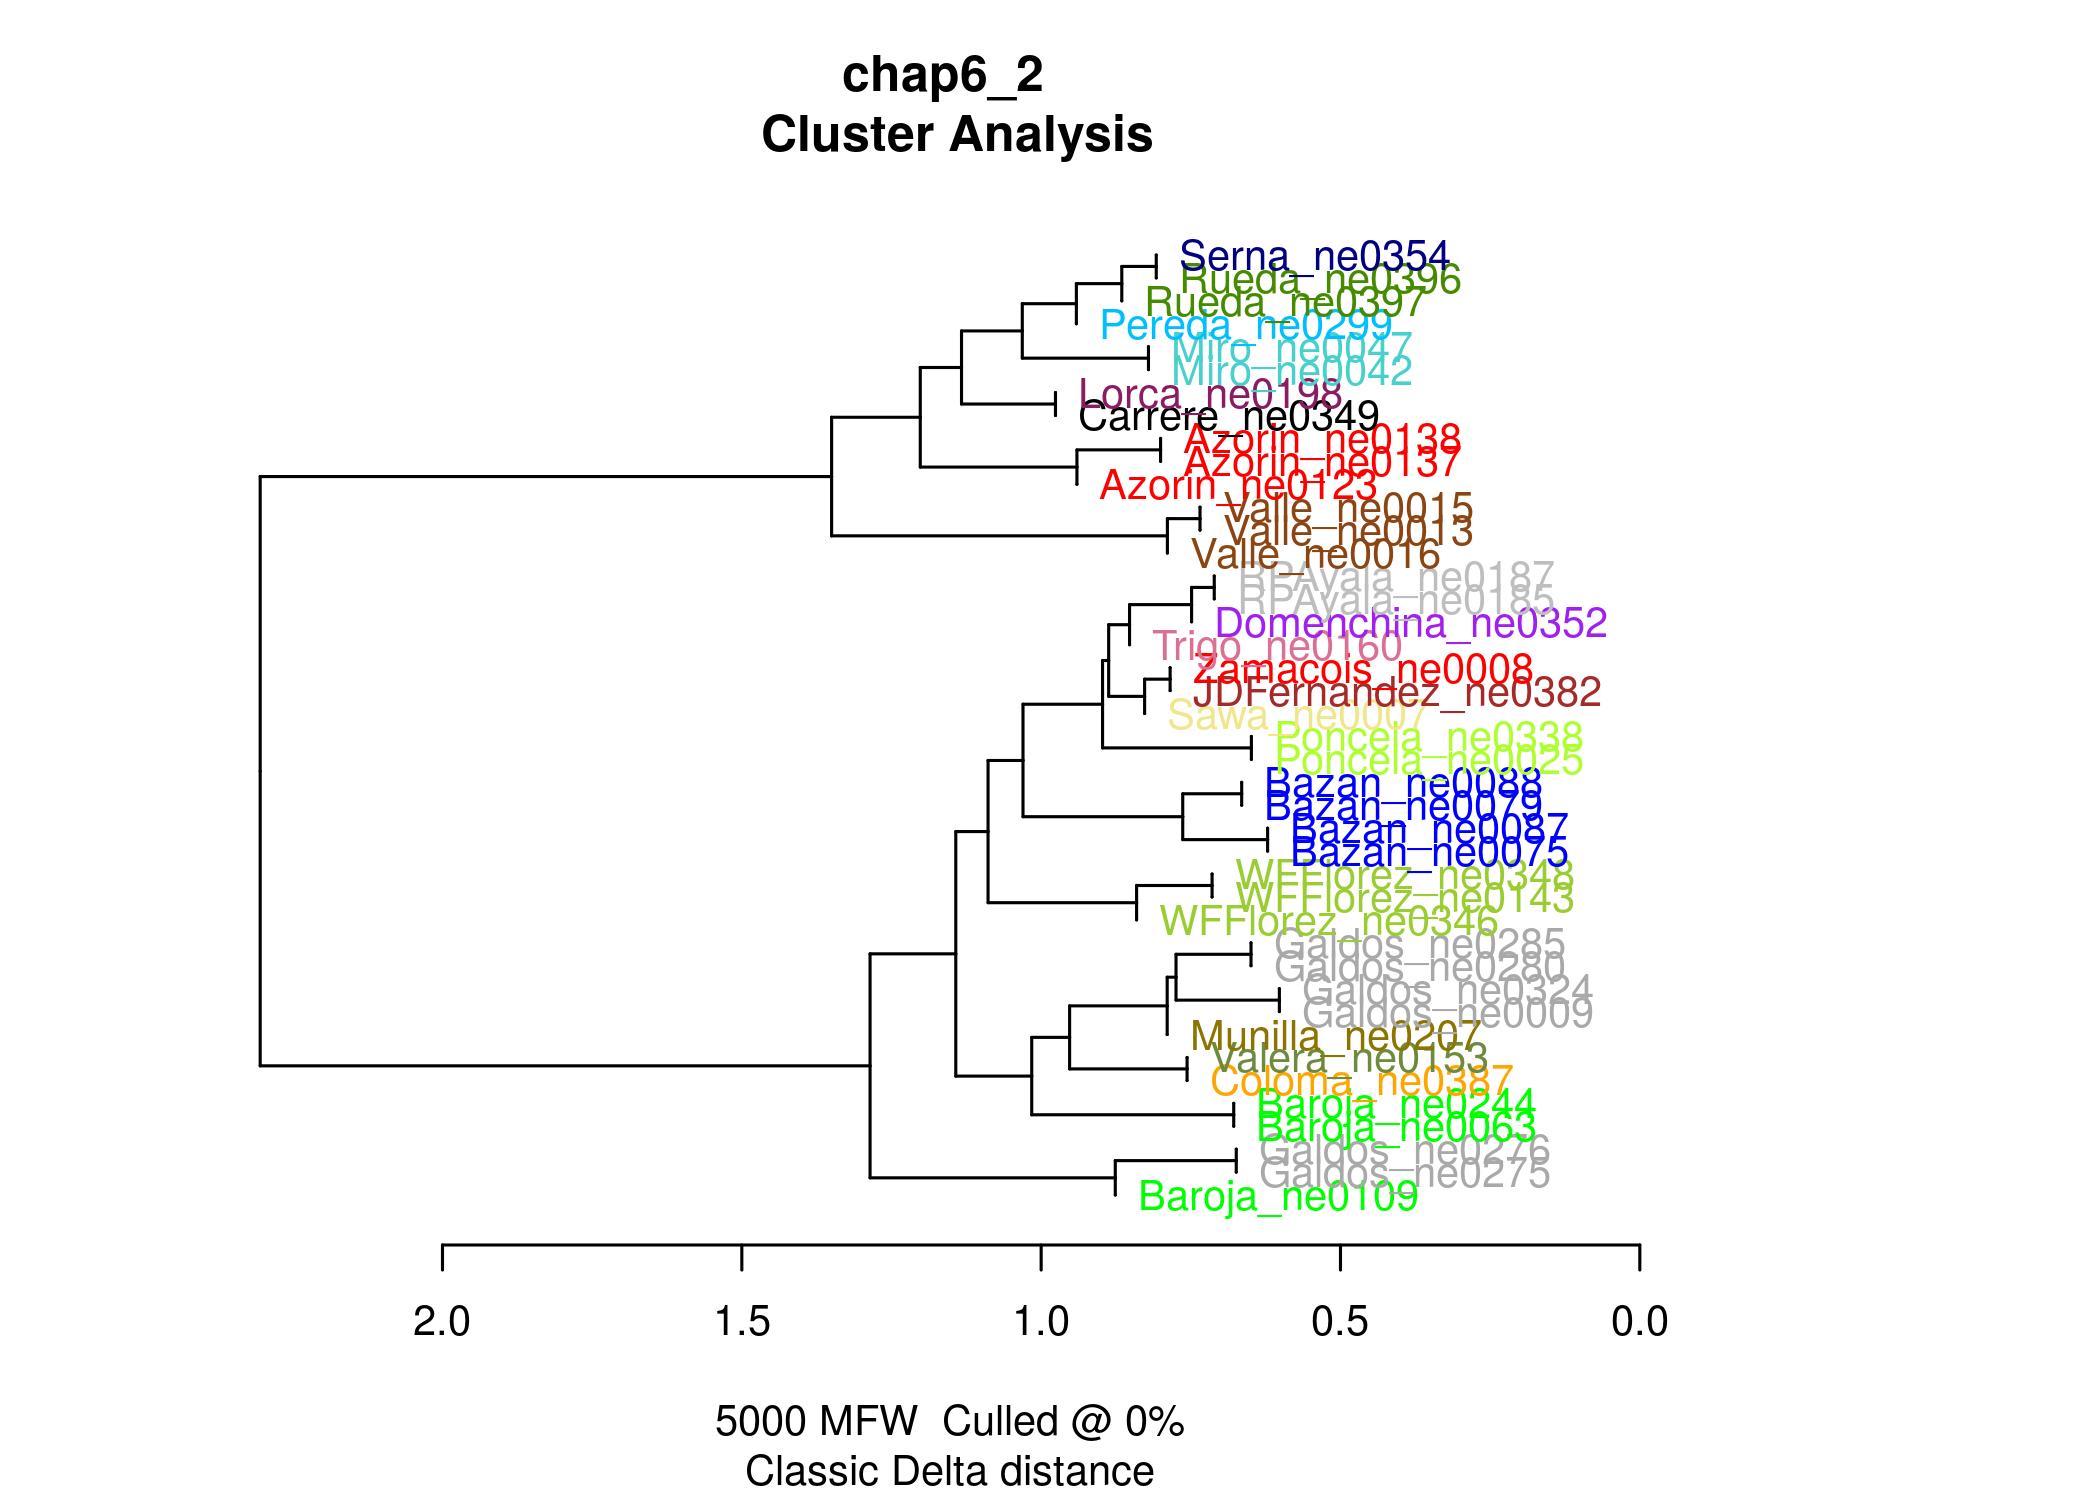

In [46]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= wdir+ "visualisations/author.name.png")


In [47]:
call_stylo.calculate_delta(wdir,distance_measure = "dist.delta", wsdir="subgenre.cligs.important/", height =5)

Stylo version:  [1] ‘0.6.9’



R[write to console]: using current directory...

R[write to console]: Performing no sampling (using entire text as sample)


R[write to console]: loading adventure_ne0143.txt	...

R[write to console]: loading adventure_ne0244.txt	...

R[write to console]: loading adventure_ne0285.txt	...

R[write to console]: loading autobiographical_ne0042.txt	...

R[write to console]: loading autobiographical_ne0047.txt	...

R[write to console]: loading autobiographical_ne0123.txt	...

R[write to console]: loading bildungsroman_ne0009.txt	...

R[write to console]: loading bildungsroman_ne0063.txt	...

R[write to console]: loading bildungsroman_ne0075.txt	...

R[write to console]: loading comedy_ne0025.txt	...

R[write to console]: loading comedy_ne0338.txt	...

R[write to console]: loading comedy_ne0346.txt	...

R[write to console]: loading dialogue_ne0109.txt	...

R[write to console]: loading dialogue_ne0275.txt	...

R[write to console]: loading dialogue_ne0276.txt	...

R[write to console]: loading 

adventure_ne0143  adventure_ne0244  adventure_ne0285  \
adventure_ne0143                 0.000000          0.820887          0.840110   
adventure_ne0244                 0.820887          0.000000          0.748984   
adventure_ne0285                 0.840110          0.748984          0.000000   
autobiographical_ne0042          0.946547          0.897745          0.930596   
autobiographical_ne0047          1.019076          0.950144          0.975674   
autobiographical_ne0123          0.984630          0.939621          1.001211   
bildungsroman_ne0009             0.847359          0.778865          0.710644   
bildungsroman_ne0063             0.847421          0.678331          0.825109   
bildungsroman_ne0075             0.829240          0.784395          0.760017   
comedy_ne0025                    0.767548          0.789457          0.784880   
comedy_ne0338                    0.816492          0.812756          0.769564   
comedy_ne0346                    0.818589          0.925214          0.956875   
dialogue_ne0109                  0.947712          0.911027          0.974514   
dialogue_ne0275                  0.946736          0.958174          0.884349   
dialogue_ne0276                  0.903105          0.874651          0.786679   
erotic_ne0007                    0.880485          0.884193          0.867785   
erotic_ne0008                    0.845518          0.877989          0.833234   
erotic_ne0160                    0.899227          0.856449          0.854574   
fantastic_ne0153                 0.885722          0.846823          0.783385   
fantastic_ne0348                 0.714486          0.813305          0.795449   
fantastic_ne0354                 0.850929          0.793871          0.834107   
historical_ne0280                0.863445          0.780148          0.649456   
historical_ne0299                0.935491          0.930259          0.913012   
historical_ne0387                0.916904          0.849382          0.790378   
memoir_ne0013                    0.997006          0.952861          0.982358   
memoir_ne0015                    1.016808          0.976478          1.004874   
memoir_ne0016                    0.974733          0.930356          0.921943   
naturalist_ne0088                0.842254          0.866035          0.819168   
naturalist_ne0207                0.842805          0.810227          0.767777   
naturalist_ne0352                0.858200          0.870270          0.830043   
philosophical_ne0137             0.995961          0.979580          0.997037   
philosophical_ne0138             0.964513          0.958392          0.985813   
philosophical_ne0187             0.818890          0.788924          0.744427   
realist_ne0087                   0.841751          0.810141          0.777801   
realist_ne0198                   1.103897          1.045264          1.117517   
realist_ne0324                   0.847914          0.810751          0.745432   
sentimental_ne0079               0.835009          0.813522          0.789799   
sentimental_ne0185               0.829826          0.803913          0.770811   
sentimental_ne0397               0.998704          0.959747          0.961512   
social_ne0349                    1.079505          1.047083          1.065455   
social_ne0382                    0.815128          0.798741          0.813188   
social_ne0396                    0.857709          0.845745          0.814517   

                         autobiographical_ne0042  autobiographical_ne0047  \
adventure_ne0143                        0.946547                 1.019076   
adventure_ne0244                        0.897745                 0.950144   
adventure_ne0285                        0.930596                 0.975674   
autobiographical_ne0042                 0.000000                 0.820745   
autobiographical_ne0047                 0.820745                 0.000000   
autobiographical_ne0123                 0.938378                 0.966034   
bi

In [48]:
copyfile(wdir+"chap6_2_CA_5000_MFWs_Culled_0__Classic Delta__001.png", wdir+"visualisations/subgenre.cligs.important.png")

'/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_2/visualisations/subgenre.cligs.important.png'

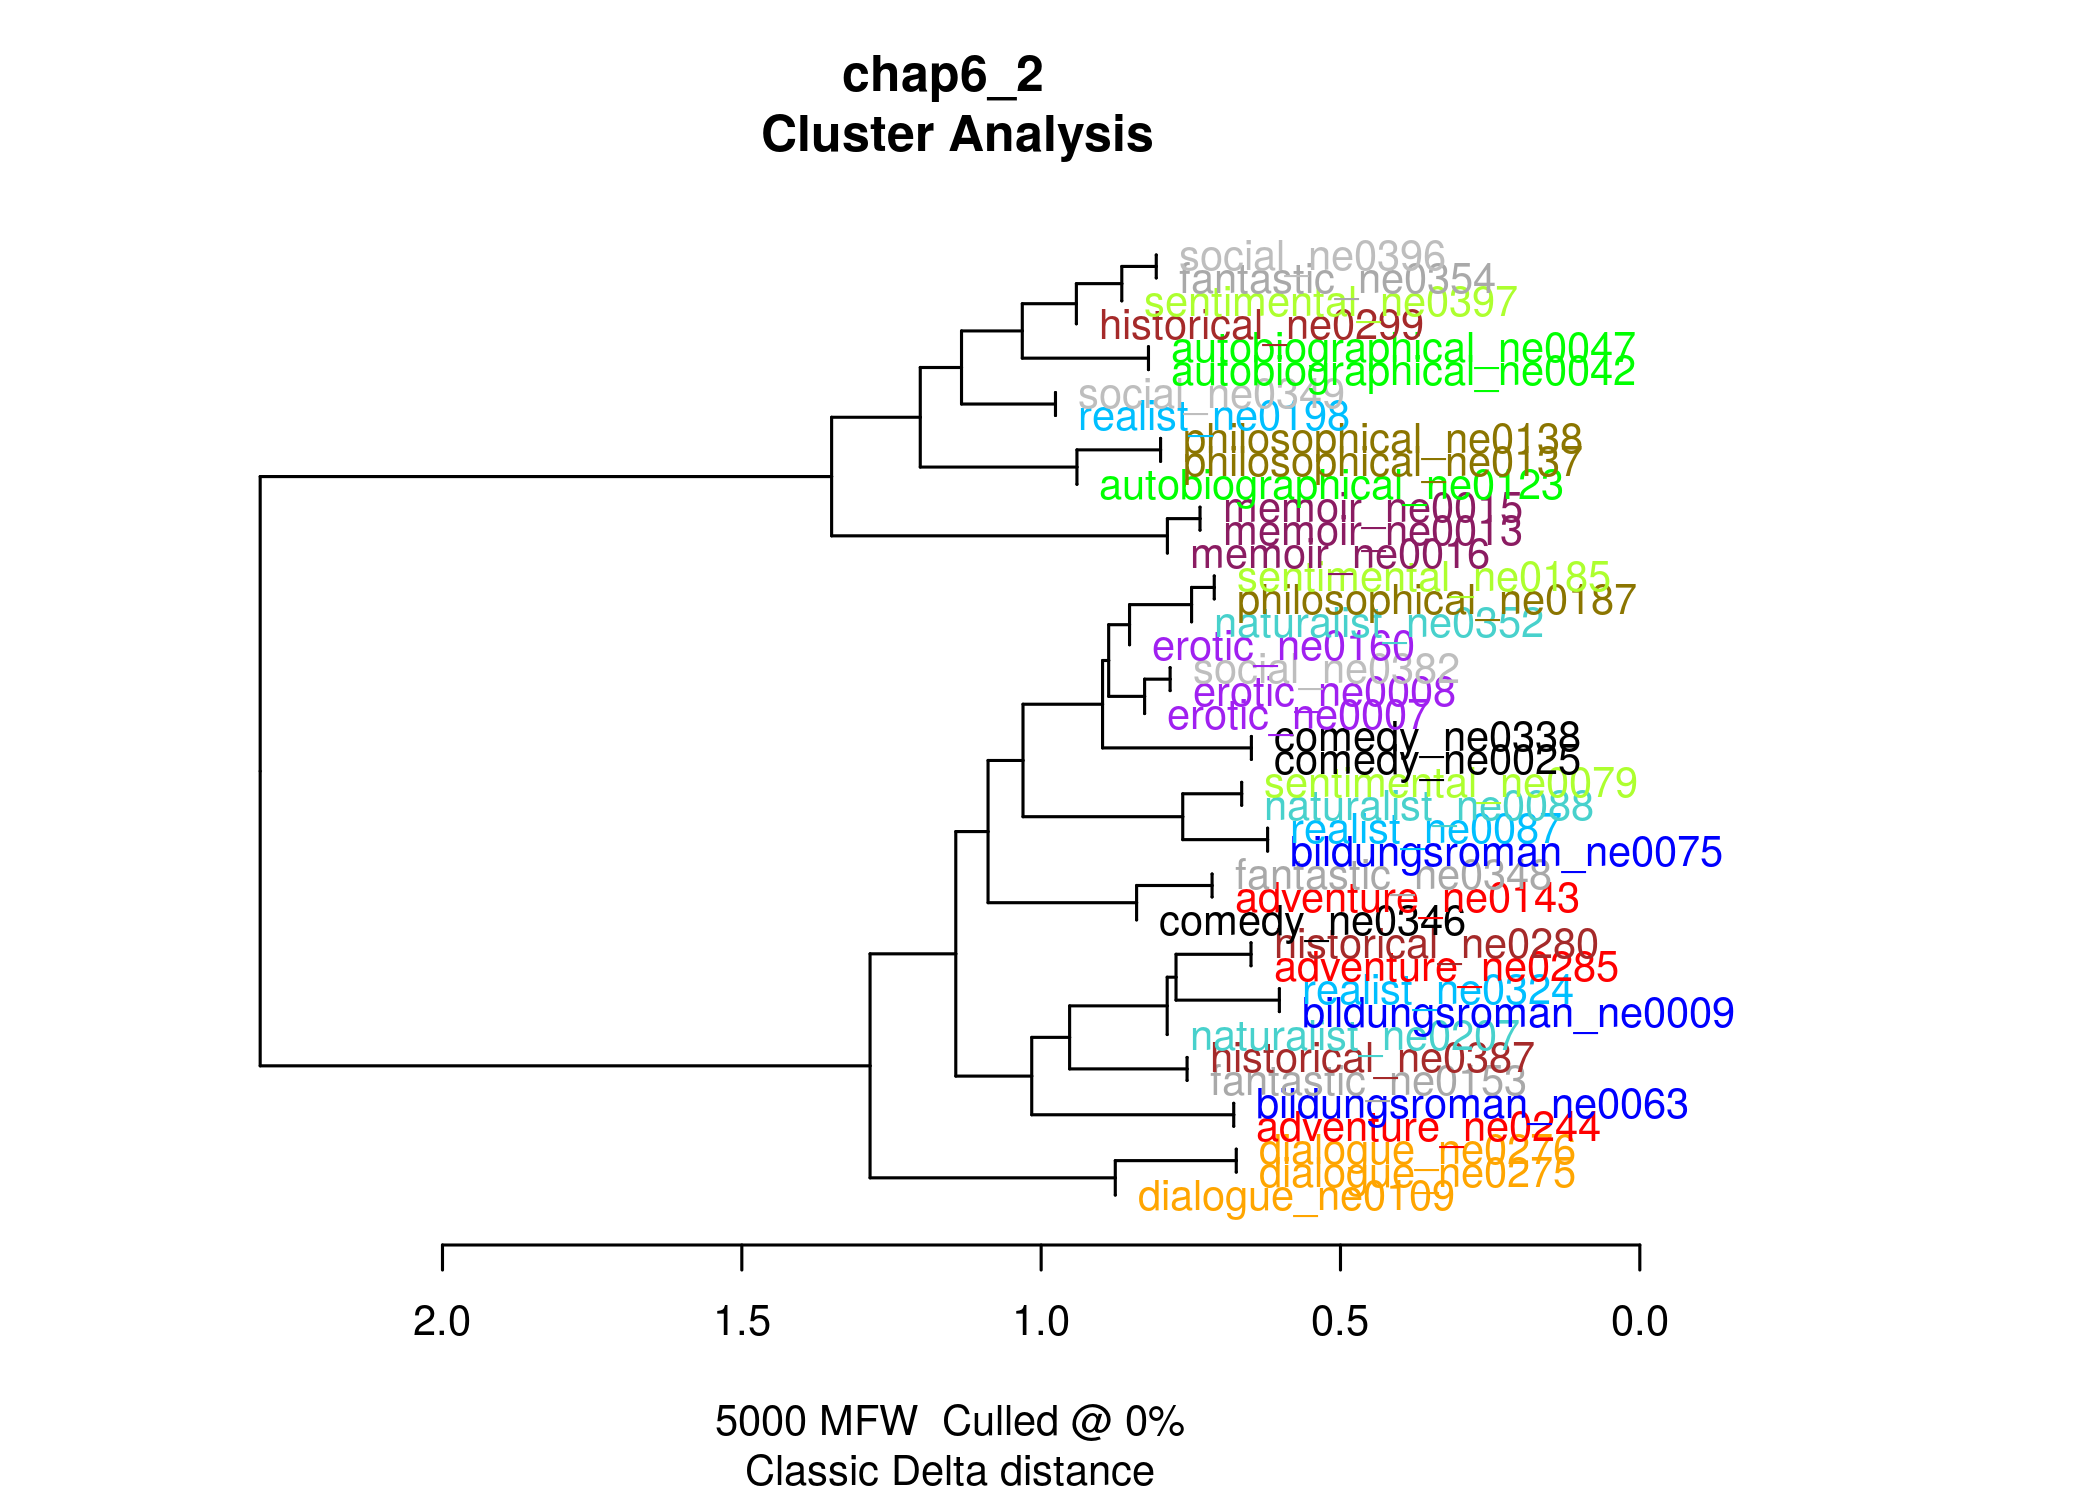

In [49]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= wdir+ "visualisations/subgenre.cligs.important.png")


Since the process is deterministic, even when I run it twice, the result is the same, with the only difference that I am using different labels for coloring the branches.

# 6.2.3. The Authorial Cue Problem when Clustering Literary Works

Amount of subgenres:

In [38]:
len(set(new_metadata_df["subgenre.cligs.important"]))

15

Amount of authors:

In [39]:
len(set(new_metadata_df["author.name"]))

72

Amount of decades:

In [40]:
len(set(new_metadata_df["decade"]))

6

First run for clustering:

In [ ]:
max_MFFs = [10, 50, 100, 500, 1000, 2000, 3000, 5000, 7000]

results_df = cluster.evaluate_cluster(wdir, rel_tokens_df, new_metadata_df, text_representations = ["raw","log","log10-zscores","tfidf-zscores"], 
        ns_clusters = [2,6,10,15,20,30,40,50,60,72], max_MFFs = max_MFFs, methods = ["KMeans","SpectralClustering","AgglomerativeClustering", ],
        sampling_times=10,  under_sample_method = "None", ground_truths = ["decade","author.name","subgenre.cligs.important", "subgenre.random"]
           )
results_df.rename(columns={'evaluation': 'ARI'}, inplace=True)
results_df.sort_values(by="ARI",ascending=False,inplace=True)
results_df.to_csv(wdir+"first_results_clustering.csv",sep="\t")

In [77]:
results_df = pd.read_csv(wdir+"first_results_clustering.csv", sep="\t",index_col=0)

In [78]:
results_df

ground_truth       ARI text_representation  \
20101               author.name  0.758581                 log   
20117               author.name  0.758581                 log   
20093               author.name  0.758581                 log   
20109               author.name  0.758581                 log   
20089               author.name  0.758581                 log   
20081               author.name  0.758581                 log   
20105               author.name  0.758581                 log   
20113               author.name  0.758581                 log   
20097               author.name  0.758581                 log   
20085               author.name  0.758581                 log   
17741               author.name  0.753918                 log   
17745               author.name  0.753918                 log   
17761               author.name  0.753918                 log   
17777               author.name  0.753918                 log   
17753               author.name  0.753918                 log   
17749               author.name  0.753918                 log   
17757               author.name  0.753918                 log   
17769               author.name  0.753918                 log   
17773               author.name  0.753918                 log   
17765               author.name  0.753918                 log   
21273               author.name  0.744890                 log   
21301               author.name  0.744890                 log   
21293               author.name  0.744890                 log   
21309               author.name  0.744890                 log   
21305               author.name  0.744890                 log   
21297               author.name  0.744890                 log   
21289               author.name  0.744890                 log   
21285               author.name  0.744890                 log   
21281               author.name  0.744890                 log   
21277               author.name  0.744890                 log   
...                         ...       ...                 ...   
42042  subgenre.cligs.important -0.019412       tfidf-zscores   
18434  subgenre.cligs.important -0.019651                 log   
31407           subgenre.random -0.019727       log10-zscores   
31606  subgenre.cligs.important -0.019756       log10-zscores   
41823           subgenre.random -0.019781       tfidf-zscores   
18482  subgenre.cligs.important -0.019829                 log   
41695           subgenre.random -0.019837       tfidf-zscores   
39451           subgenre.random -0.020044       tfidf-zscores   
29146  subgenre.cligs.important -0.020177       log10-zscores   
40678  subgenre.cligs.important -0.020243       tfidf-zscores   
20963           subgenre.random -0.020748                 log   
31538  subgenre.cligs.important -0.020856       log10-zscores   
31446  subgenre.cligs.important -0.021250       log10-zscores   
41426  subgenre.cligs.important -0.021259       tfidf-zscores   
31451           subgenre.random -0.021508       log10-zscores   
42078  subgenre.cligs.important -0.021624       tfidf-zscores   
20790  subgenre.cligs.important -0.021909                 log   
19575           subgenre.random -0.022012                 log   
31570  subgenre.cligs.important -0.022023       log10-zscores   
31398  subgenre.cligs.important -0.022328       log10-zscores   
41514  subgenre.cligs.important -0.022375       tfidf-zscores   
30214  subgenre.cligs.important -0.022518       log10-zscores   
20787           subgenre.random -0.022670                 log   
27991           subgenre.random -0.023249       log10-zscores   
31462  subgenre.cligs.important -0.023514       log10-zscores   
18518  subgenre.cligs.important -0.023580                 log   
28046  subgenre.cligs.important -0.023712       log10-zscores   
31555           subgenre.random -0.024124       log10-zscores   
20799           subgenre.random -0.028258                 log   
41586  subgenre.cligs.important -0.029115       tfidf-

In [79]:
results_df["ground_truth"] = results_df["ground_truth"].replace({'subgenre.random': "random.category",})

Results evaluating the different types of labels:

In [80]:
results_df

ground_truth       ARI text_representation  \
20101               author.name  0.758581                 log   
20117               author.name  0.758581                 log   
20093               author.name  0.758581                 log   
20109               author.name  0.758581                 log   
20089               author.name  0.758581                 log   
20081               author.name  0.758581                 log   
20105               author.name  0.758581                 log   
20113               author.name  0.758581                 log   
20097               author.name  0.758581                 log   
20085               author.name  0.758581                 log   
17741               author.name  0.753918                 log   
17745               author.name  0.753918                 log   
17761               author.name  0.753918                 log   
17777               author.name  0.753918                 log   
17753               author.name  0.753918                 log   
17749               author.name  0.753918                 log   
17757               author.name  0.753918                 log   
17769               author.name  0.753918                 log   
17773               author.name  0.753918                 log   
17765               author.name  0.753918                 log   
21273               author.name  0.744890                 log   
21301               author.name  0.744890                 log   
21293               author.name  0.744890                 log   
21309               author.name  0.744890                 log   
21305               author.name  0.744890                 log   
21297               author.name  0.744890                 log   
21289               author.name  0.744890                 log   
21285               author.name  0.744890                 log   
21281               author.name  0.744890                 log   
21277               author.name  0.744890                 log   
...                         ...       ...                 ...   
42042  subgenre.cligs.important -0.019412       tfidf-zscores   
18434  subgenre.cligs.important -0.019651                 log   
31407           random.category -0.019727       log10-zscores   
31606  subgenre.cligs.important -0.019756       log10-zscores   
41823           random.category -0.019781       tfidf-zscores   
18482  subgenre.cligs.important -0.019829                 log   
41695           random.category -0.019837       tfidf-zscores   
39451           random.category -0.020044       tfidf-zscores   
29146  subgenre.cligs.important -0.020177       log10-zscores   
40678  subgenre.cligs.important -0.020243       tfidf-zscores   
20963           random.category -0.020748                 log   
31538  subgenre.cligs.important -0.020856       log10-zscores   
31446  subgenre.cligs.important -0.021250       log10-zscores   
41426  subgenre.cligs.important -0.021259       tfidf-zscores   
31451           random.category -0.021508       log10-zscores   
42078  subgenre.cligs.important -0.021624       tfidf-zscores   
20790  subgenre.cligs.important -0.021909                 log   
19575           random.category -0.022012                 log   
31570  subgenre.cligs.important -0.022023       log10-zscores   
31398  subgenre.cligs.important -0.022328       log10-zscores   
41514  subgenre.cligs.important -0.022375       tfidf-zscores   
30214  subgenre.cligs.important -0.022518       log10-zscores   
20787           random.category -0.022670                 log   
27991           random.category -0.023249       log10-zscores   
31462  subgenre.cligs.important -0.023514       log10-zscores   
18518  subgenre.cligs.important -0.023580                 log   
28046  subgenre.cligs.important -0.023712       log10-zscores   
31555           random.category -0.024124       log10-zscores   
20799           random.category -0.028258                 log   
41586  subgenre.cligs.important -0.029115       tfidf-

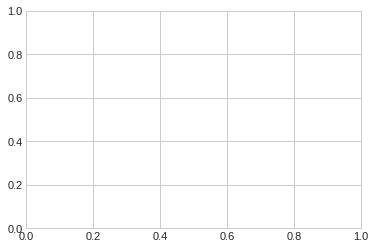

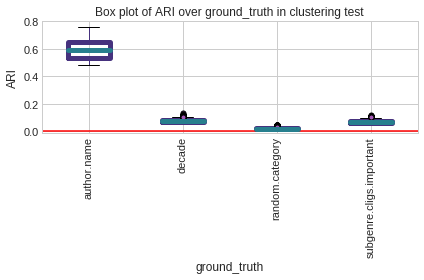

In [82]:
describe_data.boxplots(results_df.groupby("ground_truth").head(1000), "ARI", "ground_truth",
                       wdir, "clustering test", rotation = 90,
                       figsize = [6,4], baseline=0, ylim=(-0.01,0.8))


In [51]:
results_df.groupby("ground_truth").head(1000).groupby("ground_truth").median()

ARI  n_clusters   MFW  sample_size
ground_truth                                                     
author.name               0.591756          50  2000          352
decade                    0.076256          10  1000          352
random.category           0.019230          15  2000          352
subgenre.cligs.important  0.068597          20  1000          352

Run using authorial zscores and clustering:

In [52]:
authorial_zscores_df.head()

,         .        de        la         y       que        el  \
ne0001 -0.489042 -0.177729 -0.121206  0.382103 -0.129804 -0.168273  0.535672   
ne0002  0.888498 -0.027454 -0.005887  0.220116  0.348500  0.112199 -0.289196   
ne0003  1.300173 -0.244045 -0.263195 -0.096366  0.808184  0.620720  0.338460   
ne0004  1.325602 -0.196400  0.012532  0.083347  0.170642 -0.000174  0.011717   
ne0005  0.733598  0.014416  0.122485 -0.289764  0.243749  0.109491 -0.292743   

              en         a        no    ...      candelaria  inspirado  \
ne0001  0.034330 -0.387939 -0.241100    ...       -0.025621  -0.067252   
ne0002  0.139128  0.094216  0.038811    ...        0.053300  -0.032444   
ne0003 -0.012138  0.053556  0.337742    ...       -0.091068  -0.131377   
ne0004  0.113691  0.045366  0.112908    ...       -0.028867   0.256070   
ne0005 -0.061221 -0.334259  0.627934    ...       -0.091068   0.047010   

        lectores  recibiendo  inmovilidad    paraje  tradicional   huracán  \
ne0001 -0.062418    0.094641    -0.060014 -0.051367    -0.070591  0.205834   
ne0002 -0.120141    0.015258    -0.051348 -0.036029    -0.081775  0.007310   
ne0003 -0.017235   -0.096694     0.068887 -0.036029    -0.081775  0.250741   
ne0004  0.035537   -0.096694     0.071214 -0.036029    -0.081775 -0.083164   
ne0005 -0.120141   -0.096694    -0.051348 -0.036029    -0.081775 -0.001573   

          vernos  sacristía  
ne0001 -0.077578   0.061942  
ne0002  0.018076   0.174808  
ne0003 -0.121183  -0.053489  
ne0004  0.225316   0.003641  
ne0005 -0.121183  -0.119508  

[5 rows x 10000 columns]

In [60]:
results_df = cluster.evaluate_cluster(wdir, authorial_zscores_df, new_metadata_df, text_representations = ["raw"], 
        ns_clusters = [2,6,10,20,30,40,50,60,72], max_MFFs = [5000], methods = ["KMeans"],
        sampling_times=10,  under_sample_method = "None", ground_truths = ["author.name","decade","subgenre.cligs.important","subgenre.random"]
           )
results_df


textual representation:  raw
Columns that are empty:  []
5000
KMeans
2
6
10
20
30
40
50
60
72
results_author.name-decade-subgenre.cligs.important-subgenre.random_KMeans_5000_raw


ground_truth  evaluation text_representation  method  \
109                    decade    0.040989                 raw  KMeans   
197                    decade    0.029559                 raw  KMeans   
251           subgenre.random    0.027277                 raw  KMeans   
157                    decade    0.025422                 raw  KMeans   
46   subgenre.cligs.important    0.024539                 raw  KMeans   
347           subgenre.random    0.022171                 raw  KMeans   
311           subgenre.random    0.020740                 raw  KMeans   
323           subgenre.random    0.020586                 raw  KMeans   
22   subgenre.cligs.important    0.020507                 raw  KMeans   
231           subgenre.random    0.018571                 raw  KMeans   
175           subgenre.random    0.018031                 raw  KMeans   
227           subgenre.random    0.017513                 raw  KMeans   
303           subgenre.random    0.017154                 raw  KMeans   
307           subgenre.random    0.014417                 raw  KMeans   
98   subgenre.cligs.important    0.014297                 raw  KMeans   
239           subgenre.random    0.014233                 raw  KMeans   
315           subgenre.random    0.014136                 raw  KMeans   
279           subgenre.random    0.013830                 raw  KMeans   
97                     decade    0.013816                 raw  KMeans   
243           subgenre.random    0.013741                 raw  KMeans   
199           subgenre.random    0.013732                 raw  KMeans   
45                     decade    0.013275                 raw  KMeans   
295           subgenre.random    0.012592                 raw  KMeans   
222  subgenre.cligs.important    0.012234                 raw  KMeans   
267           subgenre.random    0.012101                 raw  KMeans   
283           subgenre.random    0.011831                 raw  KMeans   
259           subgenre.random    0.011830                 raw  KMeans   
331           subgenre.random    0.011721                 raw  KMeans   
50   subgenre.cligs.important    0.011537                 raw  KMeans   
319           subgenre.random    0.011262                 raw  KMeans   
..                        ...         ...                 ...     ...   
234  subgenre.cligs.important   -0.004988                 raw  KMeans   
358  subgenre.cligs.important   -0.005033                 raw  KMeans   
130  subgenre.cligs.important   -0.005150                 raw  KMeans   
31            subgenre.random   -0.005497                 raw  KMeans   
112               author.name   -0.005601                 raw  KMeans   
357                    decade   -0.005809                 raw  KMeans   
306  subgenre.cligs.important   -0.005910                 raw  KMeans   
286  subgenre.cligs.important   -0.006434                 raw  KMeans   
174  subgenre.cligs.important   -0.007052                 raw  KMeans   
108               author.name   -0.007077                 raw  KMeans   
298  subgenre.cligs.important   -0.007089                 raw  KMeans   
99            subgenre.random   -0.007100                 raw  KMeans   
294  subgenre.cligs.important   -0.007532                 raw  KMeans   
326  subgenre.cligs.important   -0.007777                 raw  KMeans   
282  subgenre.cligs.important   -0.007887                 raw  KMeans   
258  subgenre.cligs.important   -0.008042                 raw  KMeans   
354  subgenre.cligs.important   -0.008370                 raw  KMeans   
23            subgenre.random   -0.008809                 raw  KMeans   
210  subgenre.cligs.important   -0.008905                 raw  KMeans   
334  subgenre.cligs.important   -0.009016                 raw  KMeans   
246  subgenre.cligs.important   -0.009331                 raw  KMeans   
274  subgenre.cligs.important   -0.009358                 raw  KMeans   
318  subgenre.cligs.important   -0.009358                 raw  KMeans   
33

In [53]:
results_df = pd.read_csv(wdir+"results_author.name-decade-subgenre.cligs.important-subgenre.random_KMeans_5000_raw.csv", sep="\t",index_col=0)

In [54]:
results_df["ground_truth"] = results_df["ground_truth"].replace({'subgenre.random': "random.category",})

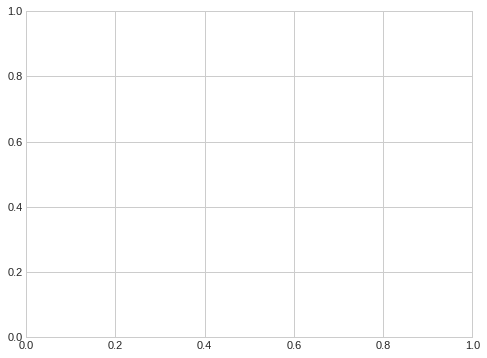

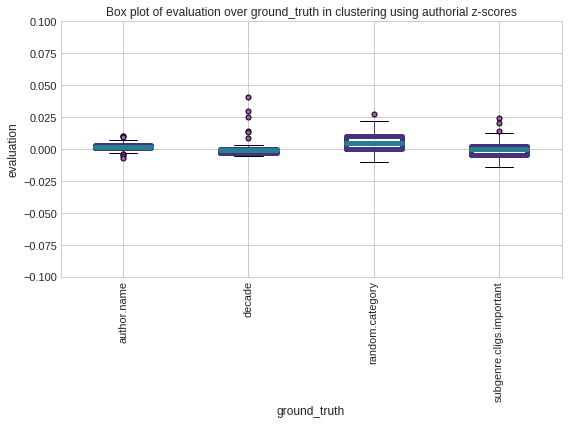

In [55]:
describe_data.boxplots(results_df.groupby("ground_truth").head(100), "evaluation", "ground_truth",
                       wdir, "clustering using authorial z-scores", rotation = 90, figsize = [6,4], ylim = (-0.1,0.1))


The results of using authorial zscores are around the baseline.


Second try of clustering, asking only for binary division of the corpus:

In [ ]:
max_MFFs = [10, 50, 100, 500, 1000, 2000, 3000, 5000, 7000]
results_df = cluster.evaluate_cluster(wdir, rel_tokens_df, new_metadata_df, text_representations = ["raw","log","log10-zscores","tfidf-zscores"], 
        ns_clusters = [2], max_MFFs = max_MFFs, methods = ["KMeans","SpectralClustering","AgglomerativeClustering", ],
        sampling_times=10,  under_sample_method = "None", ground_truths = semantic_subgenres_lt+["decade","author.name","subgenre.cligs.important", "subgenre.random"]
           )
results_df

In [56]:
results_df = pd.read_csv(wdir+"results_2019518134515.csv", sep="\t",index_col=0)

In [58]:
results_df["ground_truth"] = results_df["ground_truth"].replace({'subgenre.random': "random.category",})

In [59]:
results_df.rename(columns={'evaluation': 'ARI'}, inplace=True)
results_df.sort_values(by="ARI",ascending=False,inplace=True)

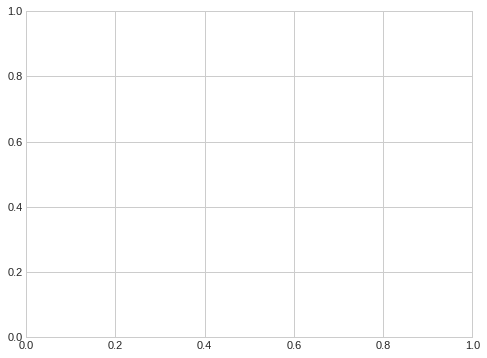

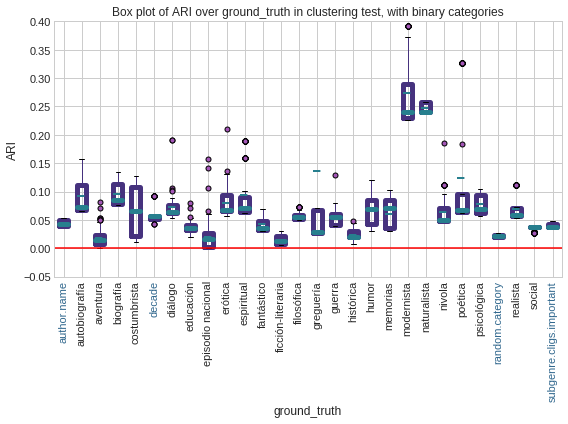

In [62]:
describe_data.boxplots(results_df.groupby(["ground_truth"]).head(100), "ARI", "ground_truth",
                       wdir, "clustering test, with binary categories",
                       ylim = (-0.05, 0.4), rotation = 90, figsize = [8,6], baseline=0,
                      color_label_position=[0,5,-4,-1])


In [64]:
results_df.groupby("ground_truth").head(100).groupby("ground_truth").median().sort_values(by="ARI")

ARI  n_clusters   MFW  sample_size
ground_truth                                                     
ficción-literaria         0.012651           2  2000          352
aventura                  0.014715           2  1000          352
episodio nacional         0.015989           2  1000          352
histórica                 0.019108           2  3000          352
subgenre.random           0.021818           2  5000          352
greguería                 0.028334           2  3000          352
educación                 0.035154           2   100          352
fantástico                0.035469           2  2000          352
social                    0.036862           2  1000          352
subgenre.cligs.important  0.037424           2  5000          352
author.name               0.043545           2  1000          352
nivola                    0.049452           2  2000          352
filosófica                0.055524           2  2000          352
guerra                    0.055818           2   500          352
decade                    0.056262           2   300          352
realista                  0.059586           2  1000          352
diálogo                   0.064131           2  1000          352
costumbrista              0.066368           2   300          352
poética                   0.067245           2  2000          352
erótica                   0.067434           2  1500          352
humor                     0.068856           2  2000          352
psicológica               0.069121           2  3000          352
espiritual                0.071475           2  2000          352
memorias                  0.071662           2  3000          352
autobiografía             0.072237           2  2000          352
biografía                 0.085060           2  2000          352
naturalista               0.239463           2  3000          352
modernista                0.239885           2  2000          352

Asking for only two clusters, the results correlate in a much stronger manner with the binary subgenre labels and not so much with authorial information or decade.

# 6.2.4. Evaluation of Parameters of Clustering with Linguistic Features

Evaluation of binary clusters:

In [38]:
methods_lt = ["KMeans","SpectralClustering","AgglomerativeClustering"]

In [39]:
max_MFFs = [10, 50, 100, 500, 1000, 2000, 3000, 5000, 7000]

In [ ]:
i = 0
for feature_combination_st, feature_combination_df in features_dict.items():
    print(feature_combination_st)
    
    if feature_combination_st == "authorial-zscores":
        text_representations = ["raw"]
    else:
        text_representations = ["raw","log","zscores","binary","tfidf","log10-zscores","tfidf-zscores"]
        
    results_df = cluster.evaluate_cluster(wdir, feature_combination_df, new_metadata_df, text_representations = text_representations, 
        ns_clusters = [2], max_MFFs = max_MFFs, methods = methods_lt,
        sampling_times=10,  under_sample_method = "None", ground_truths = semantic_subgenres_lt+["decade","author.name","subgenre.cligs.important", "subgenre.random"]
           )

    results_df["feature-combination"] = feature_combination_st
    
    if i == 0:
        total_results_df = results_df.copy()
    else:
        total_results_df = pd.concat([total_results_df, results_df])

    i += 1

total_results_df.rename(columns={'evaluation': 'ARI'}, inplace=True)
total_results_df.sort_values(by="ARI",ascending=False,inplace=True)
results_file_date = str(datetime.datetime.now().year)+str(datetime.datetime.now().month)+str(datetime.datetime.now().day)+str(datetime.datetime.now().hour)+str(datetime.datetime.now().minute)+str(datetime.datetime.now().second)

total_results_df.to_csv(wdir+"several_corpora_results"+results_file_date+".csv")


In [63]:
total_results_df = pd.read_csv(wdir+"several_corpora_results201951816235.csv", sep=",",index_col=0)

total_results_df.rename(columns={'feature-combination': 'feature_combination'}, inplace=True)
total_results_df.loc[total_results_df["text_representation"] =="raw","text_representation"] = "relative"
total_results_df.shape

(262444, 9)

In [65]:
total_results_df["ground_truth"] = total_results_df["ground_truth"].replace({'subgenre.random': "random.category",})


In [66]:
total_results_df.groupby(["text_representation","method","MFW","feature_combination"]).head(1)

ground_truth       ARI text_representation  \
45287          greguería  1.000000       tfidf-zscores   
7235           greguería  1.000000            relative   
37048            diálogo  0.866936               tfidf   
36992            diálogo  0.866936               tfidf   
35984            diálogo  0.866936               tfidf   
36264            diálogo  0.866936               tfidf   
8775           greguería  0.796318                 log   
25267          greguería  0.796318              binary   
37524            diálogo  0.788720               tfidf   
36712            diálogo  0.788720               tfidf   
9748             diálogo  0.700555                 log   
8768             diálogo  0.700555                 log   
3504             diálogo  0.579776            relative   
20810  episodio nacional  0.564928             zscores   
43098  episodio nacional  0.564928       log10-zscores   
21538  episodio nacional  0.544959             zscores   
49958  episodio nacional  0.544959       tfidf-zscores   
44610  episodio nacional  0.540202       log10-zscores   
43966  episodio nacional  0.540202       log10-zscores   
42286  episodio nacional  0.540202       log10-zscores   
43742  episodio nacional  0.540202       log10-zscores   
5156             diálogo  0.535396            relative   
19970  episodio nacional  0.519978             zscores   
20418  episodio nacional  0.519978             zscores   
50322  episodio nacional  0.519978       tfidf-zscores   
21398  episodio nacional  0.519978             zscores   
22210  episodio nacional  0.519978             zscores   
31394  episodio nacional  0.514652               tfidf   
7900             diálogo  0.474610                 log   
42930  episodio nacional  0.403480       log10-zscores   
...                  ...       ...                 ...   
18205          educación  0.000000             zscores   
29098  episodio nacional  0.000000              binary   
20054  episodio nacional  0.000000             zscores   
40047            erótica  0.000000       log10-zscores   
40987  ficción-literaria  0.000000       log10-zscores   
17622         filosófica  0.000000             zscores   
18664         modernista  0.000000             zscores   
23355       costumbrista  0.000000              binary   
42470             social  0.000000       log10-zscores   
44102          biografía  0.000000       log10-zscores   
19293           aventura  0.000000             zscores   
22499           memorias  0.000000              binary   
41651           memorias  0.000000       log10-zscores   
20093        naturalista  0.000000             zscores   
20993           realista  0.000000             zscores   
21951    random.category  0.000000             zscores   
24082          biografía  0.000000              binary   
43418             nivola  0.000000       log10-zscores   
41423          greguería  0.000000       log10-zscores   
12751          greguería  0.000000                 log   
18773          histórica  0.000000             zscores   
12170             nivola  0.000000                 log   
29474             nivola  0.000000              binary   
48737        naturalista  0.000000       tfidf-zscores   
28515          greguería  0.000000              binary   
41038             nivola  0.000000       log10-zscores   
27564             guerra  0.000000              binary   
11827          greguería  0.000000                 log   
26941          educación  0.000000              binary   
40194              humor  0.000000       log10-zscores   

                        method  n_clusters   MFW method_evaluation  \
45287       SpectralClustering           2    10               ARI   
7235        SpectralClustering           2  7000               ARI   
37048       SpectralClustering           2  7000               ARI   
36992                   KMeans           2  7000               ARI   
35984                   KMeans           2  5000               AR

In [67]:
total_results_df

ground_truth       ARI text_representation                   method  \
45287    greguería  1.000000       tfidf-zscores       SpectralClustering   
7235     greguería  1.000000            relative       SpectralClustering   
7179     greguería  1.000000            relative       SpectralClustering   
7263     greguería  1.000000            relative       SpectralClustering   
7151     greguería  1.000000            relative       SpectralClustering   
7095     greguería  1.000000            relative       SpectralClustering   
7039     greguería  1.000000            relative       SpectralClustering   
7123     greguería  1.000000            relative       SpectralClustering   
7207     greguería  1.000000            relative       SpectralClustering   
7011     greguería  1.000000            relative       SpectralClustering   
7067     greguería  1.000000            relative       SpectralClustering   
45259    greguería  1.000000       tfidf-zscores       SpectralClustering   
45231    greguería  1.000000       tfidf-zscores       SpectralClustering   
45343    greguería  1.000000       tfidf-zscores       SpectralClustering   
45175    greguería  1.000000       tfidf-zscores       SpectralClustering   
45427    greguería  1.000000       tfidf-zscores       SpectralClustering   
45399    greguería  1.000000       tfidf-zscores       SpectralClustering   
45315    greguería  1.000000       tfidf-zscores       SpectralClustering   
45371    greguería  1.000000       tfidf-zscores       SpectralClustering   
45203    greguería  1.000000       tfidf-zscores       SpectralClustering   
37048      diálogo  0.866936               tfidf       SpectralClustering   
36992      diálogo  0.866936               tfidf                   KMeans   
35984      diálogo  0.866936               tfidf                   KMeans   
36264      diálogo  0.866936               tfidf       SpectralClustering   
36908      diálogo  0.866936               tfidf                   KMeans   
36796      diálogo  0.866936               tfidf                   KMeans   
35900      diálogo  0.866936               tfidf                   KMeans   
36432      diálogo  0.866936               tfidf       SpectralClustering   
36124      diálogo  0.866936               tfidf                   KMeans   
37020      diálogo  0.866936               tfidf       SpectralClustering   
...            ...       ...                 ...                      ...   
4817      aventura -0.094803            relative  AgglomerativeClustering   
7449      aventura -0.094803            relative  AgglomerativeClustering   
4873      aventura -0.094803            relative  AgglomerativeClustering   
7337      aventura -0.094803            relative  AgglomerativeClustering   
7505      aventura -0.094803            relative  AgglomerativeClustering   
5601      aventura -0.094803            relative  AgglomerativeClustering   
5825      aventura -0.094803            relative  AgglomerativeClustering   
5853      aventura -0.094803            relative  AgglomerativeClustering   
5769      aventura -0.094803            relative  AgglomerativeClustering   
5629      aventura -0.094803            relative  AgglomerativeClustering   
7309      aventura -0.094803            relative  AgglomerativeClustering   
5685      aventura -0.094803            relative  AgglomerativeClustering   
7477      aventura -0.094803            relative  AgglomerativeClustering   
4985      aventura -0.094803            relative  AgglomerativeClustering   
5741      aventura -0.094803            relative  AgglomerativeClustering   
6469      aventura -0.094803            relative  AgglomerativeClustering   
4929      aventura -0.094803            relative  AgglomerativeClustering   
4957      aventura -0.094803            relative  AgglomerativeClustering   
5657      aventura -0.094803            relative  AgglomerativeClustering   
6665      aventura -0.094803            relative  AgglomerativeClustering   
66

Results for the different labels:

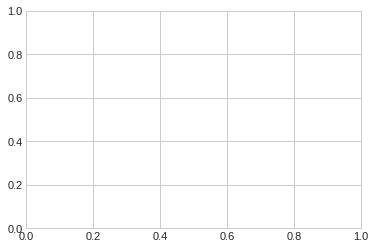

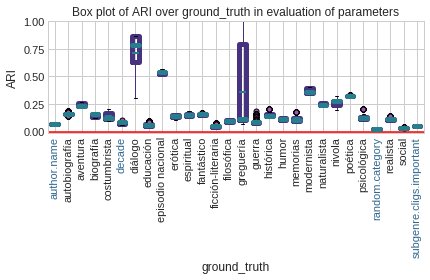

In [75]:
describe_data.boxplots(total_results_df.groupby("ground_truth").head(100), "ARI", "ground_truth",
                       wdir, "evaluation of parameters", rotation = 90, figsize = [8,6], 
                       color_label_position=[0,5,-4,-1], baseline=0, ylim=(-0.01,1))


In [76]:
total_results_df.groupby("ground_truth").head(100).groupby("ground_truth").median().sort_values(by="ARI")

ARI  n_clusters   MFW  sample_size
ground_truth                                                     
random.category           0.024836           2   100          352
social                    0.036862           2  2000          352
ficción-literaria         0.046239           2  1000          352
subgenre.cligs.important  0.051479           2  5000          352
educación                 0.055325           2   750          352
author.name               0.069557           2  2500          352
guerra                    0.082883           2  2000          352
decade                    0.083829           2  3000          352
filosófica                0.093092           2    30          352
memorias                  0.105290           2   300          352
realista                  0.110838           2  5000          352
humor                     0.112711           2    10          352
greguería                 0.113983           2    50          352
psicológica               0.118728           2   500          352
costumbrista              0.120903           2   100          352
erótica                   0.141633           2  2000          352
histórica                 0.145518           2   500          352
espiritual                0.146158           2  1000          352
autobiografía             0.155887           2  3000          352
fantástico                0.156614           2  5000          352
biografía                 0.157391           2  3000          352
aventura                  0.234397           2   100          352
naturalista               0.239463           2  3000          352
nivola                    0.275275           2    10          352
poética                   0.326327           2   100          352
modernista                0.361069           2  3000          352
episodio nacional         0.540202           2  5000          352
diálogo                   0.788720           2  5000          352

Is the size of the subgenres having an effect on the results?

In [45]:
total_results_df["proportion_instances"] = 0
for ground_truth in list(set(total_results_df["ground_truth"].tolist())):
    proportion = new_metadata_df.loc[new_metadata_df[ground_truth] == 1].shape[0]
    total_results_df.loc[total_results_df["ground_truth"] == ground_truth, "proportion_instances"] = proportion

In [46]:
total_results_df

ground_truth       ARI text_representation                   method  \
45287    greguería  1.000000       tfidf-zscores       SpectralClustering   
7235     greguería  1.000000            relative       SpectralClustering   
7179     greguería  1.000000            relative       SpectralClustering   
7263     greguería  1.000000            relative       SpectralClustering   
7151     greguería  1.000000            relative       SpectralClustering   
7095     greguería  1.000000            relative       SpectralClustering   
7039     greguería  1.000000            relative       SpectralClustering   
7123     greguería  1.000000            relative       SpectralClustering   
7207     greguería  1.000000            relative       SpectralClustering   
7011     greguería  1.000000            relative       SpectralClustering   
7067     greguería  1.000000            relative       SpectralClustering   
45259    greguería  1.000000       tfidf-zscores       SpectralClustering   
45231    greguería  1.000000       tfidf-zscores       SpectralClustering   
45343    greguería  1.000000       tfidf-zscores       SpectralClustering   
45175    greguería  1.000000       tfidf-zscores       SpectralClustering   
45427    greguería  1.000000       tfidf-zscores       SpectralClustering   
45399    greguería  1.000000       tfidf-zscores       SpectralClustering   
45315    greguería  1.000000       tfidf-zscores       SpectralClustering   
45371    greguería  1.000000       tfidf-zscores       SpectralClustering   
45203    greguería  1.000000       tfidf-zscores       SpectralClustering   
37048      diálogo  0.866936               tfidf       SpectralClustering   
36992      diálogo  0.866936               tfidf                   KMeans   
35984      diálogo  0.866936               tfidf                   KMeans   
36264      diálogo  0.866936               tfidf       SpectralClustering   
36908      diálogo  0.866936               tfidf                   KMeans   
36796      diálogo  0.866936               tfidf                   KMeans   
35900      diálogo  0.866936               tfidf                   KMeans   
36432      diálogo  0.866936               tfidf       SpectralClustering   
36124      diálogo  0.866936               tfidf                   KMeans   
37020      diálogo  0.866936               tfidf       SpectralClustering   
...            ...       ...                 ...                      ...   
4817      aventura -0.094803            relative  AgglomerativeClustering   
7449      aventura -0.094803            relative  AgglomerativeClustering   
4873      aventura -0.094803            relative  AgglomerativeClustering   
7337      aventura -0.094803            relative  AgglomerativeClustering   
7505      aventura -0.094803            relative  AgglomerativeClustering   
5601      aventura -0.094803            relative  AgglomerativeClustering   
5825      aventura -0.094803            relative  AgglomerativeClustering   
5853      aventura -0.094803            relative  AgglomerativeClustering   
5769      aventura -0.094803            relative  AgglomerativeClustering   
5629      aventura -0.094803            relative  AgglomerativeClustering   
7309      aventura -0.094803            relative  AgglomerativeClustering   
5685      aventura -0.094803            relative  AgglomerativeClustering   
7477      aventura -0.094803            relative  AgglomerativeClustering   
4985      aventura -0.094803            relative  AgglomerativeClustering   
5741      aventura -0.094803            relative  AgglomerativeClustering   
6469      aventura -0.094803            relative  AgglomerativeClustering   
4929      aventura -0.094803            relative  AgglomerativeClustering   
4957      aventura -0.094803            relative  AgglomerativeClustering   
5657      aventura -0.094803            relative  AgglomerativeClustering   
6665      aventura -0.094803            relative  AgglomerativeClustering   
66

In [47]:
stats.pearsonr(
        total_results_df.loc[~total_results_df["ground_truth"].isin(['author.name','subgenre.cligs.important','subgenre.random',"decade"])].groupby(["ground_truth"]).head(100)["proportion_instances"],
        total_results_df.loc[~total_results_df["ground_truth"].isin(['author.name','subgenre.cligs.important','subgenre.random',"decade"])].groupby(["ground_truth"]).head(100)["ARI"]
)



(-0.4064673805571404, 3.7116596496791074e-96)

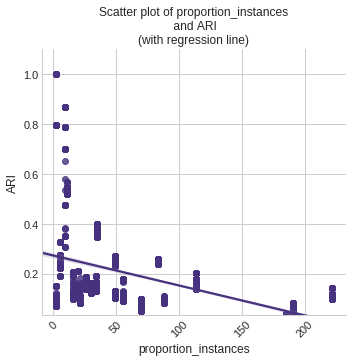

In [48]:
describe_data.describe_corpus_scatter(total_results_df.loc[~total_results_df["ground_truth"].isin(['author.name','subgenre.cligs.important','subgenre.random',"decade"])].groupby(["ground_truth"]).head(100), wdir, "proportion_instances", "ARI",  "clustering")

The cluster reproduce rather small subgenres than greater ones.

Evaluation of the combination of features:

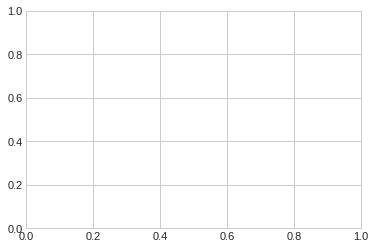

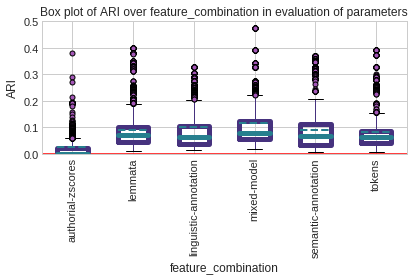

In [49]:
describe_data.boxplots(total_results_df.groupby(["feature_combination","ground_truth"]).head(100), "ARI", "feature_combination",
                       wdir, "evaluation of parameters", rotation = 90, figsize = [6,4],baseline=0, ylim=(0,0.5))


In [50]:
total_results_df.groupby(["feature_combination","ground_truth"]).head(100).groupby("feature_combination").median().sort_values(by="ARI")

ARI  n_clusters   MFW  sample_size  \
feature_combination                                              
authorial-zscores      0.000982           2  1000          352   
tokens                 0.062887           2  2000          352   
linguistic-annotation  0.063420           2   500          352   
semantic-annotation    0.068328           2   500          352   
lemmata                0.069655           2   500          352   
mixed-model            0.078806           2  1000          352   

                       proportion_instances  
feature_combination                          
authorial-zscores                        25  
tokens                                   25  
linguistic-annotation                    25  
semantic-annotation                      25  
lemmata                                  25  
mixed-model                              25

In [51]:
st_tests.test_differences_columns(total_results_df.groupby(["feature_combination","ground_truth"]).head(100), "feature_combination", "ARI", equal_var=False).round(3).sort_values(by="pvalue")

value1                 value2  pvalue significance
0       authorial-zscores                lemmata   0.000          ***
1       authorial-zscores  linguistic-annotation   0.000          ***
2       authorial-zscores            mixed-model   0.000          ***
3       authorial-zscores    semantic-annotation   0.000          ***
4       authorial-zscores                 tokens   0.000          ***
5                 lemmata  linguistic-annotation   0.000          ***
6                 lemmata            mixed-model   0.000          ***
9   linguistic-annotation            mixed-model   0.000          ***
10  linguistic-annotation    semantic-annotation   0.000          ***
11  linguistic-annotation                 tokens   0.000          ***
12            mixed-model    semantic-annotation   0.000          ***
13            mixed-model                 tokens   0.000          ***
14    semantic-annotation                 tokens   0.000          ***
8                 lemmata                 tokens   0.005           **
7                 lemmata    semantic-annotation   0.094

Evaluation of the transformations:

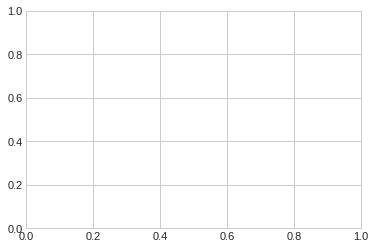

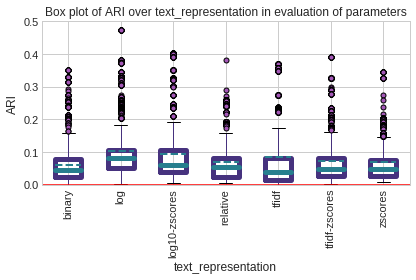

In [52]:
describe_data.boxplots(total_results_df.groupby(["text_representation","ground_truth"]).head(100), "ARI", "text_representation",
                       wdir, "evaluation of parameters", rotation = 90, figsize = [6,4],baseline=0, ylim=(0,0.5))


In [53]:
total_results_df.groupby(["text_representation","ground_truth"]).head(100).groupby("text_representation").median().sort_values(by="ARI")

ARI  n_clusters   MFW  sample_size  \
text_representation                                            
tfidf                0.037603           2   500          352   
binary               0.043088           2  2000          352   
zscores              0.048092           2  1000          352   
tfidf-zscores        0.048104           2   100          352   
relative             0.054965           2   500          352   
log10-zscores        0.060851           2  1000          352   
log                  0.080982           2  1000          352   

                     proportion_instances  
text_representation                        
tfidf                                  25  
binary                                 25  
zscores                                25  
tfidf-zscores                          25  
relative                               25  
log10-zscores                          25  
log                                    25

In [54]:
st_tests.test_differences_columns(total_results_df.groupby(["text_representation","ground_truth"]).head(100), "text_representation", "ARI", equal_var=False).round(3).sort_values(by="pvalue")

value1         value2  pvalue significance
0          binary            log   0.000          ***
18          tfidf  tfidf-zscores   0.000          ***
15       relative          tfidf   0.000          ***
14  log10-zscores        zscores   0.000          ***
13  log10-zscores  tfidf-zscores   0.000          ***
11  log10-zscores       relative   0.000          ***
19          tfidf        zscores   0.000          ***
9             log  tfidf-zscores   0.000          ***
10            log        zscores   0.000          ***
7             log       relative   0.000          ***
6             log  log10-zscores   0.000          ***
5          binary        zscores   0.000          ***
4          binary  tfidf-zscores   0.000          ***
3          binary          tfidf   0.000          ***
2          binary       relative   0.000          ***
1          binary  log10-zscores   0.000          ***
8             log          tfidf   0.000          ***
12  log10-zscores          tfidf   0.008           **
20  tfidf-zscores        zscores   0.108             
16       relative  tfidf-zscores   0.257             
17       relative        zscores   0.608

Evaluation of the algorithms:

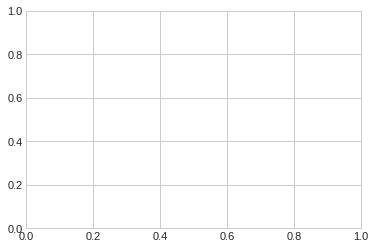

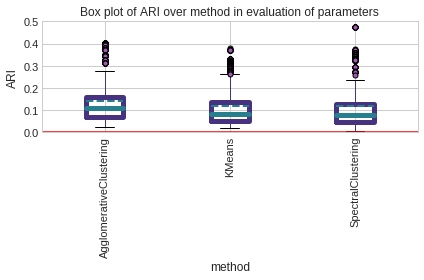

In [55]:
describe_data.boxplots(total_results_df.groupby(["method","ground_truth"]).head(100), "ARI", "method",
                       wdir, "evaluation of parameters", rotation = 90, figsize = [6,4],baseline=0, ylim=(0,0.5))


In [56]:
total_results_df.groupby(["method","ground_truth"]).head(100).groupby("method").median().sort_values(by="ARI")

ARI  n_clusters   MFW  sample_size  \
method                                                             
SpectralClustering       0.080716           2   500          352   
KMeans                   0.082323           2   500          352   
AgglomerativeClustering  0.109216           2  1000          352   

                         proportion_instances  
method                                         
SpectralClustering                         25  
KMeans                                     25  
AgglomerativeClustering                    25

In [57]:
st_tests.test_differences_columns(total_results_df.groupby(["method","ground_truth"]).head(100), "method", "ARI", equal_var=False).round(3).sort_values(by="pvalue")

value1              value2  pvalue significance
0  AgglomerativeClustering              KMeans    0.00          ***
1  AgglomerativeClustering  SpectralClustering    0.00          ***
2                   KMeans  SpectralClustering    0.47

Evaluation of the MFWs:

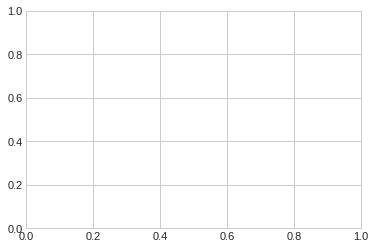

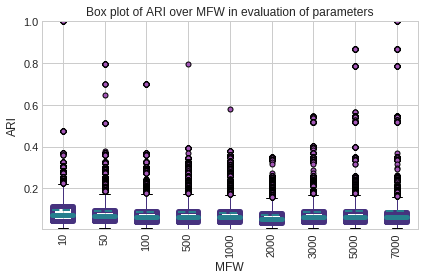

In [58]:
describe_data.boxplots(total_results_df.groupby(["MFW","ground_truth"]).head(100), "ARI", "MFW",
                       wdir, "evaluation of parameters", rotation = 90, figsize = [6,4],baseline=0)


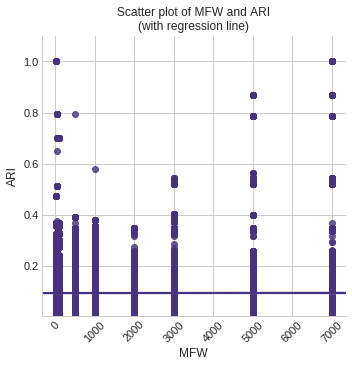

In [59]:
describe_data.describe_corpus_scatter(total_results_df.loc[~total_results_df["ground_truth"].isin(['author.name','subgenre.cligs.important','subgenre.random',"decade"])].groupby(["ground_truth","MFW"]).head(100), wdir, "MFW", "ARI",  "clustering")

In [60]:
stats.pearsonr(
        total_results_df.loc[~total_results_df["ground_truth"].isin(['author.name','subgenre.cligs.important','subgenre.random',"decade"])].groupby(["ground_truth","MFW"]).head(100)["MFW"],
        total_results_df.loc[~total_results_df["ground_truth"].isin(['author.name','subgenre.cligs.important','subgenre.random',"decade"])].groupby(["ground_truth","MFW"]).head(100)["ARI"]
)


(0.0016618844427784625, 0.8070510152545229)

In [61]:
total_results_df.groupby(["MFW","ground_truth"]).head(100).groupby("MFW").median().sort_values(by="ARI")

ARI  n_clusters  sample_size  proportion_instances
MFW                                                          
2000  0.055282           2          352                    25
5000  0.061187           2          352                    25
7000  0.061207           2          352                    25
1000  0.061595           2          352                    25
500   0.061678           2          352                    25
100   0.063647           2          352                    25
3000  0.063884           2          352                    25
50    0.068743           2          352                    25
10    0.070587           2          352                    25

In [62]:
st_tests.test_differences_columns(total_results_df.groupby(["MFW","ground_truth"]).head(100), "MFW", "ARI", equal_var=False).round(3).sort_values(by="pvalue")

value1  value2  pvalue significance
17     100    2000   0.000          ***
26    1000    2000   0.000          ***
30    2000    3000   0.000          ***
31    2000    5000   0.000          ***
32    2000    7000   0.000          ***
22     500    2000   0.000          ***
10      50    1000   0.000          ***
11      50    2000   0.000          ***
5       10    3000   0.000          ***
4       10    2000   0.000          ***
3       10    1000   0.000          ***
2       10     500   0.000          ***
1       10     100   0.000          ***
9       50     500   0.001           **
29    1000    7000   0.001          ***
8       50     100   0.002           **
6       10    5000   0.009           **
28    1000    5000   0.009           **
27    1000    3000   0.023            *
25     500    7000   0.028            *
12      50    3000   0.029            *
20     100    7000   0.042            *
7       10    7000   0.091             
16     100    1000   0.116             
0       10      50   0.133             
21     500    1000   0.136             
24     500    5000   0.147             
34    3000    7000   0.169             
19     100    5000   0.194             
13      50    5000   0.196             
23     500    3000   0.362             
18     100    3000   0.453             
35    5000    7000   0.474             
33    3000    5000   0.533             
14      50    7000   0.660             
15     100     500   0.887

In [63]:
total_results_df

ground_truth       ARI text_representation                   method  \
45287    greguería  1.000000       tfidf-zscores       SpectralClustering   
7235     greguería  1.000000            relative       SpectralClustering   
7179     greguería  1.000000            relative       SpectralClustering   
7263     greguería  1.000000            relative       SpectralClustering   
7151     greguería  1.000000            relative       SpectralClustering   
7095     greguería  1.000000            relative       SpectralClustering   
7039     greguería  1.000000            relative       SpectralClustering   
7123     greguería  1.000000            relative       SpectralClustering   
7207     greguería  1.000000            relative       SpectralClustering   
7011     greguería  1.000000            relative       SpectralClustering   
7067     greguería  1.000000            relative       SpectralClustering   
45259    greguería  1.000000       tfidf-zscores       SpectralClustering   
45231    greguería  1.000000       tfidf-zscores       SpectralClustering   
45343    greguería  1.000000       tfidf-zscores       SpectralClustering   
45175    greguería  1.000000       tfidf-zscores       SpectralClustering   
45427    greguería  1.000000       tfidf-zscores       SpectralClustering   
45399    greguería  1.000000       tfidf-zscores       SpectralClustering   
45315    greguería  1.000000       tfidf-zscores       SpectralClustering   
45371    greguería  1.000000       tfidf-zscores       SpectralClustering   
45203    greguería  1.000000       tfidf-zscores       SpectralClustering   
37048      diálogo  0.866936               tfidf       SpectralClustering   
36992      diálogo  0.866936               tfidf                   KMeans   
35984      diálogo  0.866936               tfidf                   KMeans   
36264      diálogo  0.866936               tfidf       SpectralClustering   
36908      diálogo  0.866936               tfidf                   KMeans   
36796      diálogo  0.866936               tfidf                   KMeans   
35900      diálogo  0.866936               tfidf                   KMeans   
36432      diálogo  0.866936               tfidf       SpectralClustering   
36124      diálogo  0.866936               tfidf                   KMeans   
37020      diálogo  0.866936               tfidf       SpectralClustering   
...            ...       ...                 ...                      ...   
4817      aventura -0.094803            relative  AgglomerativeClustering   
7449      aventura -0.094803            relative  AgglomerativeClustering   
4873      aventura -0.094803            relative  AgglomerativeClustering   
7337      aventura -0.094803            relative  AgglomerativeClustering   
7505      aventura -0.094803            relative  AgglomerativeClustering   
5601      aventura -0.094803            relative  AgglomerativeClustering   
5825      aventura -0.094803            relative  AgglomerativeClustering   
5853      aventura -0.094803            relative  AgglomerativeClustering   
5769      aventura -0.094803            relative  AgglomerativeClustering   
5629      aventura -0.094803            relative  AgglomerativeClustering   
7309      aventura -0.094803            relative  AgglomerativeClustering   
5685      aventura -0.094803            relative  AgglomerativeClustering   
7477      aventura -0.094803            relative  AgglomerativeClustering   
4985      aventura -0.094803            relative  AgglomerativeClustering   
5741      aventura -0.094803            relative  AgglomerativeClustering   
6469      aventura -0.094803            relative  AgglomerativeClustering   
4929      aventura -0.094803            relative  AgglomerativeClustering   
4957      aventura -0.094803            relative  AgglomerativeClustering   
5657      aventura -0.094803            relative  AgglomerativeClustering   
6665      aventura -0.094803            relative  AgglomerativeClustering   
66

More detailed evaluation of the parameters in combination:

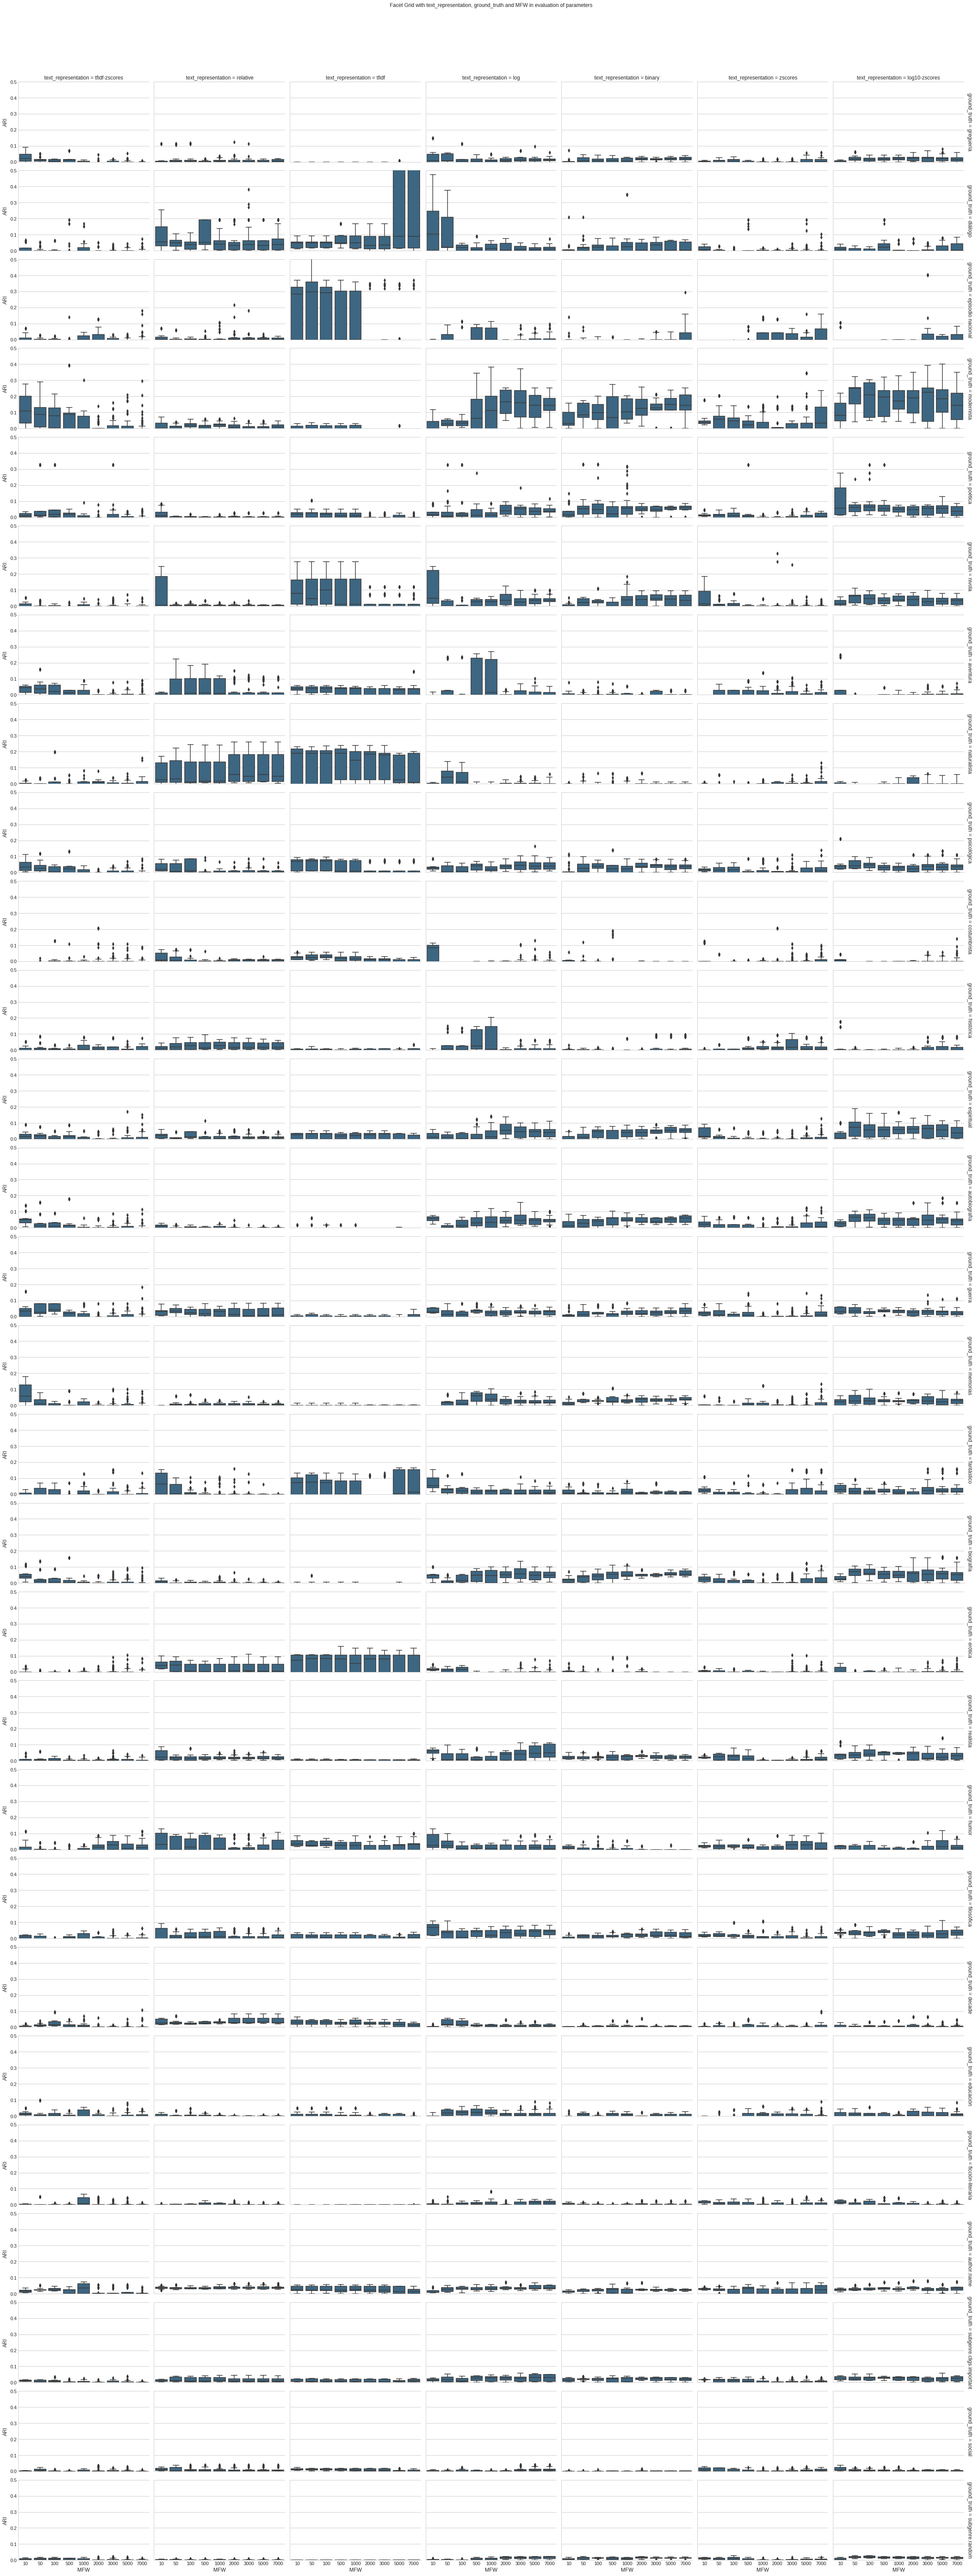

In [64]:
import seaborn as sns
describe_data.facetGrid(total_results_df.groupby(["ground_truth","text_representation","MFW"]).head(100),
                        "ARI", "text_representation", "ground_truth","MFW",
                        wdir, "evaluation of parameters",type_=sns.boxplot,ylim=(0,0.5)
                       )

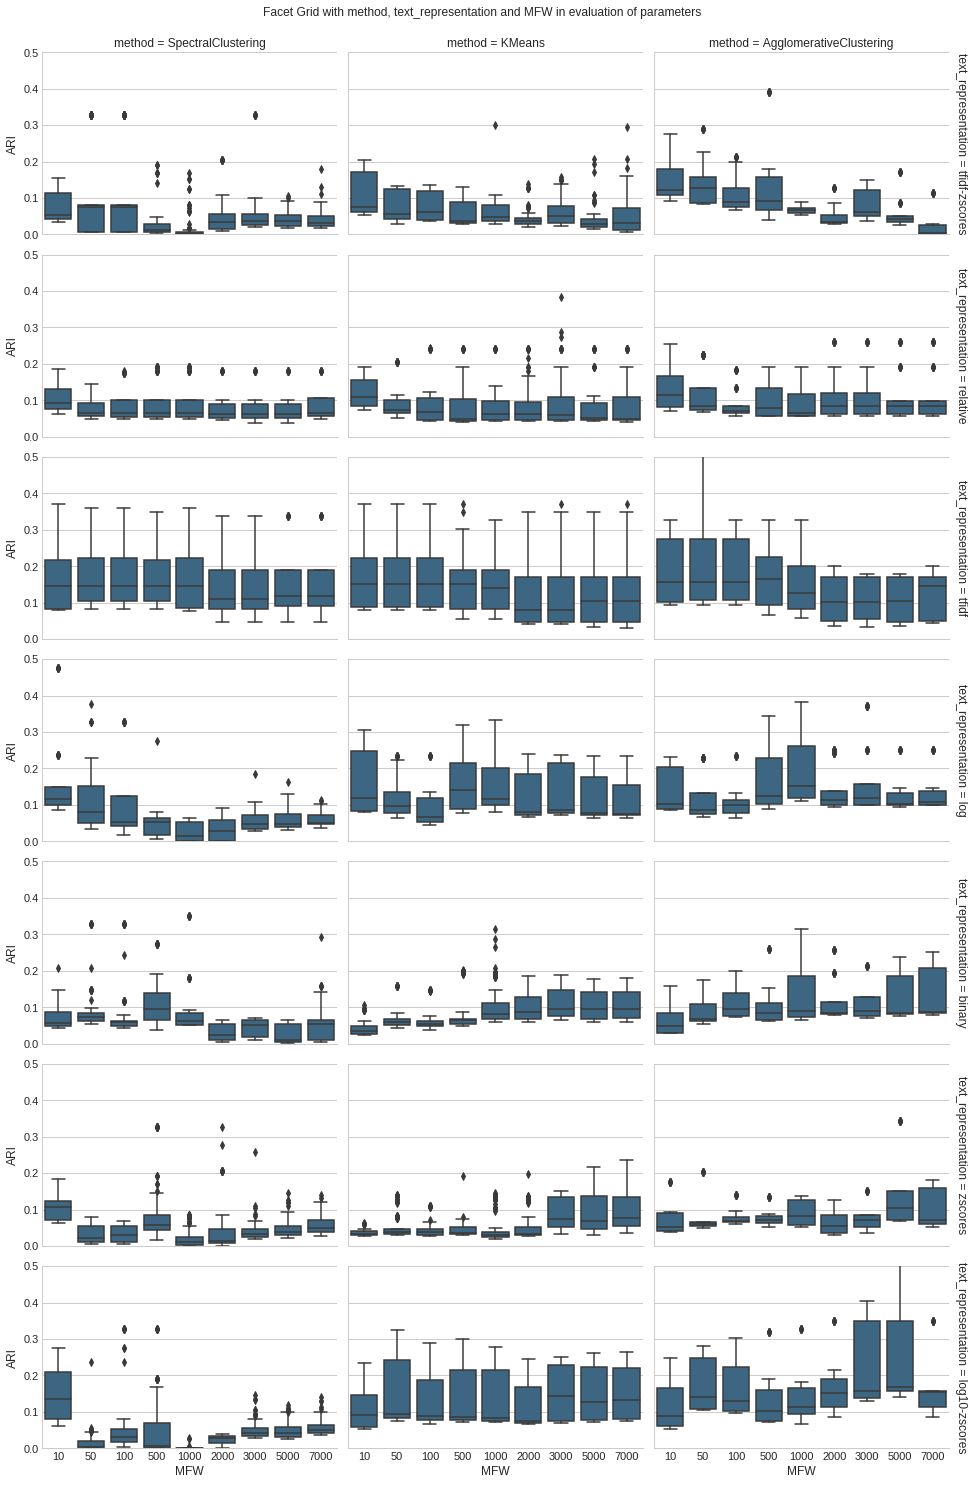

In [65]:
import seaborn as sns
describe_data.facetGrid(total_results_df.groupby(["method","text_representation","MFW"]).head(100),
                        "ARI", "method", "text_representation", "MFW",
                        wdir, "evaluation of parameters",type_=sns.boxplot,ylim=(0,0.5)
                       )


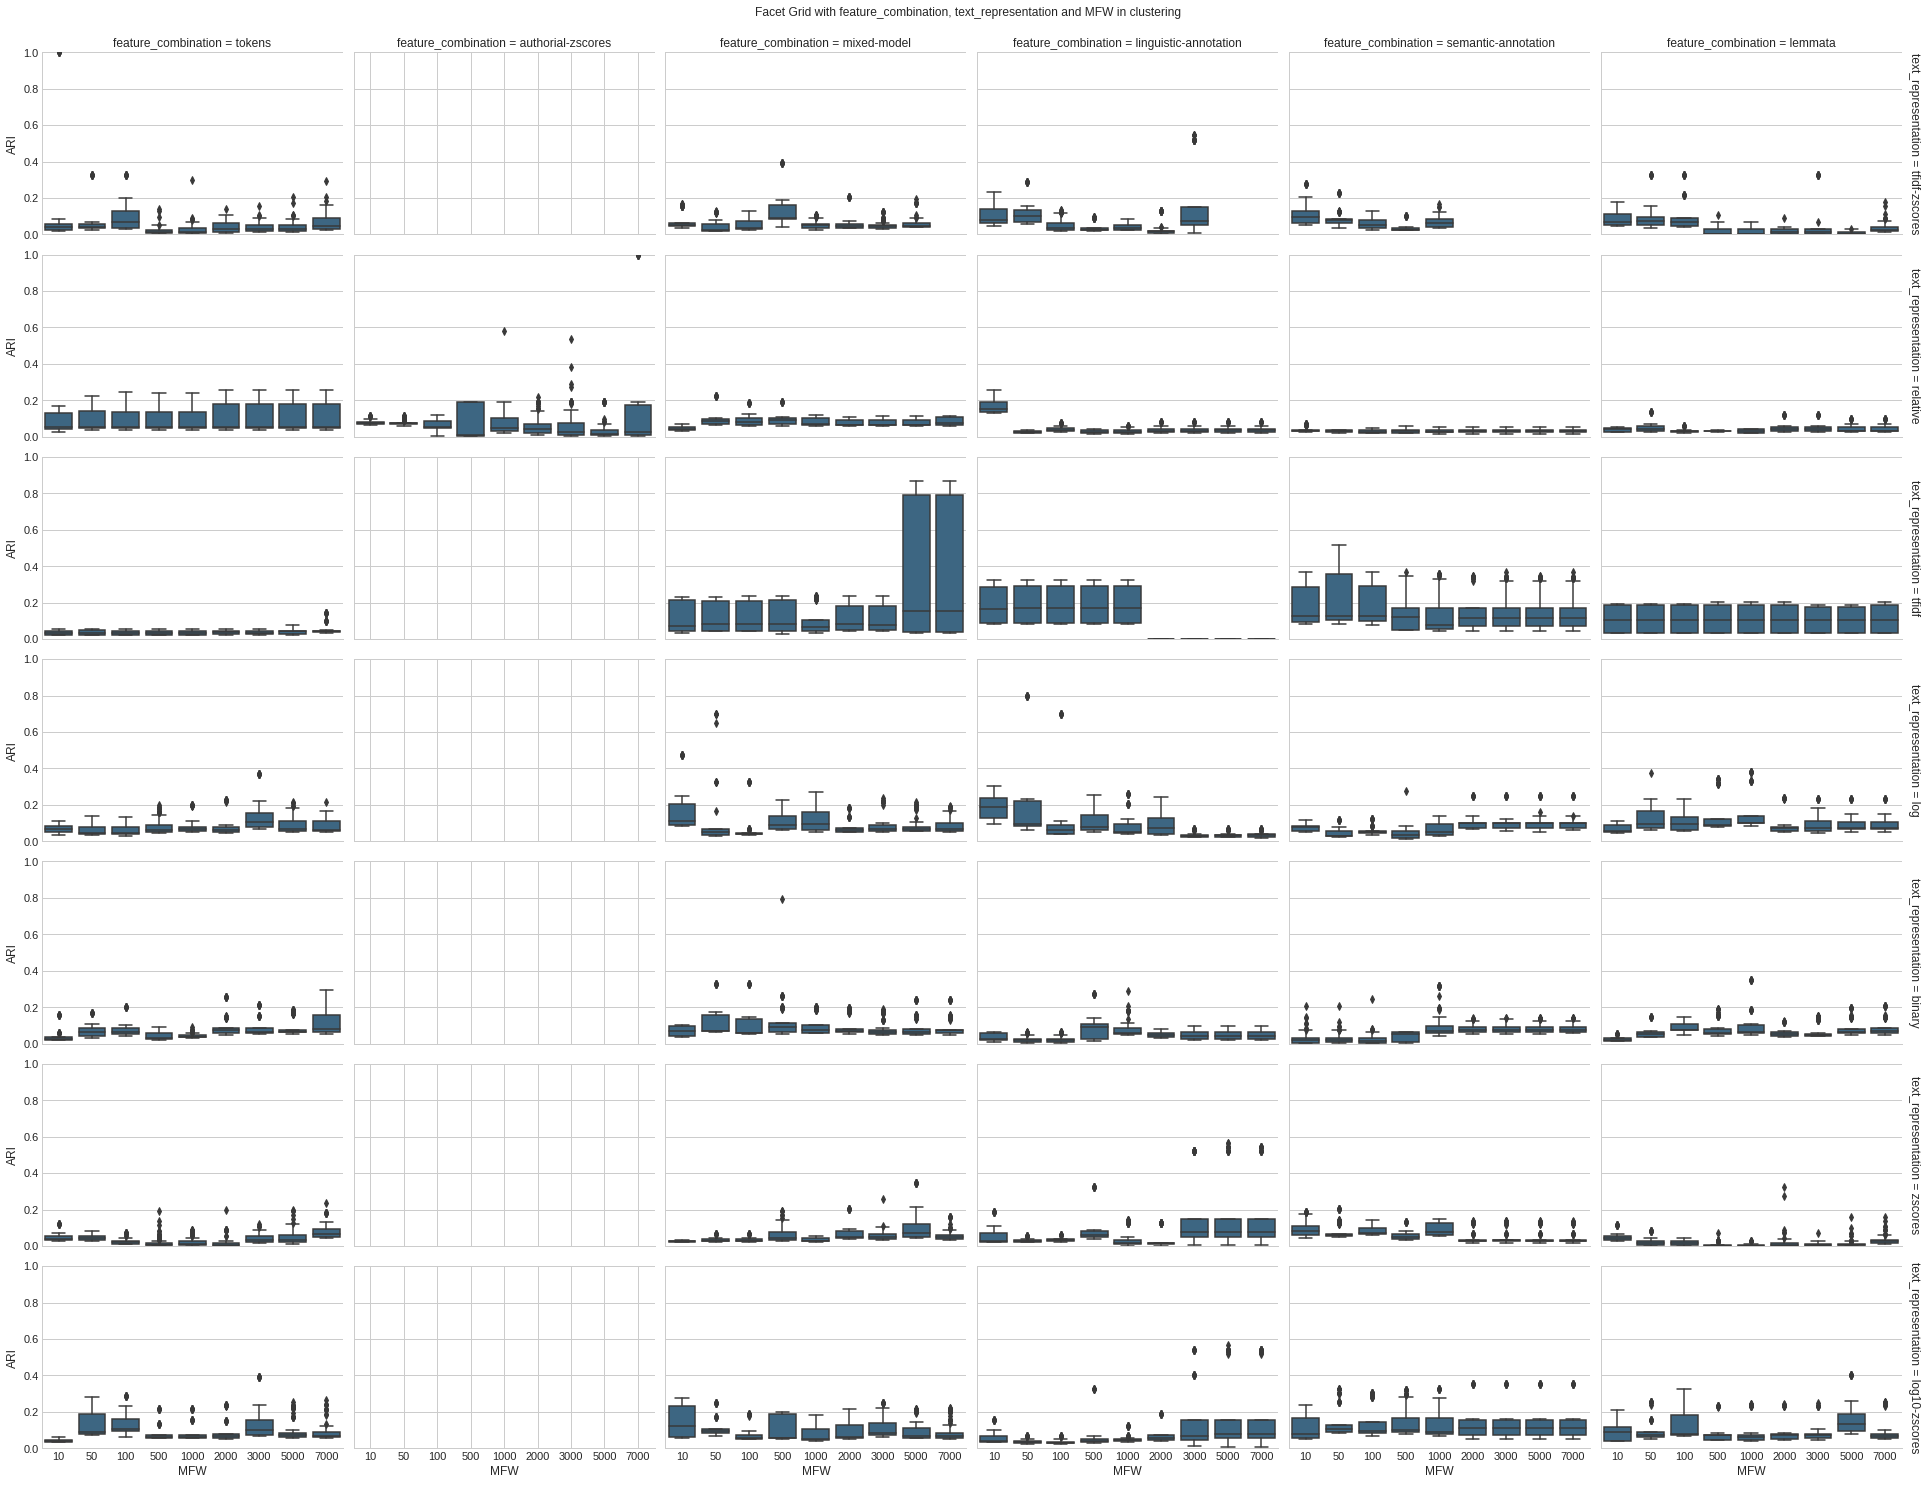

In [68]:
import seaborn as sns
describe_data.facetGrid(total_results_df.groupby(["feature_combination","text_representation","MFW"]).head(100),
                        "ARI", "feature_combination", "text_representation", "MFW",
                        wdir, "clustering",type_=sns.boxplot
                       )


In [69]:
total_results_df.groupby(["method","text_representation","MFW","feature_combination"]).median().sort_values(by="ARI", ascending=False)

ARI  \
method                  text_representation MFW  feature_combination             
KMeans                  log10-zscores       2000 tokens               0.030324   
                        log                 2000 tokens               0.029293   
                        log10-zscores       3000 tokens               0.029287   
AgglomerativeClustering log10-zscores       100  lemmata              0.028535   
KMeans                  log10-zscores       5000 tokens               0.028482   
                                            500  lemmata              0.027803   
                        log                 3000 mixed-model          0.027775   
                        log10-zscores       50   tokens               0.027699   
                                            1000 tokens               0.027528   
                        log                 2000 lemmata              0.026873   
                                            3000 tokens               0.026847   
                        log10-zscores       7000 tokens               0.026724   
                        log                 5000 mixed-model          0.026723   
                        log10-zscores       500  tokens               0.026545   
                                            1000 lemmata              0.026409   
AgglomerativeClustering binary              1000 mixed-model          0.026390   
                        zscores             50   semantic-annotation  0.025930   
KMeans                  log10-zscores       2000 lemmata              0.025897   
                        log                 3000 lemmata              0.025816   
                                            5000 lemmata              0.025816   
                                            7000 lemmata              0.025816   
AgglomerativeClustering binary              5000 tokens               0.025422   
                                            1000 lemmata              0.025227   
                        log10-zscores       500  mixed-model          0.025188   
KMeans                  log10-zscores       1000 semantic-annotation  0.024793   
                        log                 1000 tokens               0.024695   
                                            7000 tokens               0.024602   
                        log10-zscores       500  semantic-annotation  0.024491   
AgglomerativeClustering binary              2000 mixed-model          0.024403   
KMeans                  log10-zscores       5000 lemmata              0.024162   
...                                                                        ...   
AgglomerativeClustering tfidf-zscores       7000 tokens              -0.014806   
SpectralClustering      tfidf-zscores       10   lemmata             -0.014806   
KMeans                  relative            50   tokens              -0.015544   
SpectralClustering      relative            7000 tokens              -0.015779   
                                            5000 tokens              -0.015779   
                                            3000 tokens              -0.015779   
                                            2000 tokens              -0.015779   
                                            500  tokens              -0.015779   
                                            1000 tokens              -0.015779   
AgglomerativeClustering tfidf               3000 mixed-model         -0.015822   
                                            2000 mixed-model         -0.015822   
KMeans                  relative            7000 tokens              -0.017018   
                                            5000 tokens              -0.017018   
                                            500  tokens              -0.017018   
                                            1000 tokens              -0.017018   
                                            2000 tokens              -0.017018   
                                            3000 tokens  

# 6.2.5. Comparison of Clusters and Evaluation with Metadata

In [70]:
try:
    rel_tags_ling_pos_diff_mw_ord_ent_df["—@form_punctuation@pos"] =  rel_tags_ling_pos_diff_mw_ord_ent_df["—@form_punctuation@pos"] +rel_tags_ling_pos_diff_mw_ord_ent_df['-@form_punctuation@pos'] 
    del rel_tags_ling_pos_diff_mw_ord_ent_df['-@form_punctuation@pos']
except:
    pass

Run with the best parameters:

In [135]:
clustering_results_df, parameters_results_df = cluster.create_clusters(wdir, rel_tags_ling_pos_diff_mw_ord_ent_df,
                    methods = ["KMeans","SpectralClustering","AgglomerativeClustering"], 
                    max_MFFs = [10,50,100,500,1000,2000,3000,5000],
                    text_representations = ["log","tfidf","log10-zscores","tfidf-zscores"], ns_clusters = [2],
                    sampling_times = 10, 
                   )

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
10
        ,@form_punctuation@pos  comma@type  de@form_adposition@pos  \
ne0001               -2.743326   -2.743326               -2.952572   
ne0002               -2.348509   -2.348509               -2.938798   
ne0003               -2.299546   -2.299546               -3.009623   
ne0004               -2.292291   -2.292291               -2.972701   
ne0005               -2.387787   -2.387787               -2.918561   

        .@form_punctuation@pos  period@type     am.ss  el@form_determiner@pos  \
ne0001               -2.951143    -2.951143 -3.259871               -3.057258   
ne0002               -3.295312    -3.295312 -3.417452               -3.445124   
ne0003               -3.233394    -3.233394 -3.291475               -3.329998   
ne0004               -3.164177    -3.164177 -3.297939               -3.362305   
ne0005               -3.186364    -3.186364 -3.137399               -3.466097   

        imperfect@tense  y@form_

SpectralClustering
2
AgglomerativeClustering
2
1000
        ,@form_punctuation@pos  comma@type  de@form_adposition@pos  \
ne0001               -2.743326   -2.743326               -2.952572   
ne0002               -2.348509   -2.348509               -2.938798   
ne0003               -2.299546   -2.299546               -3.009623   
ne0004               -2.292291   -2.292291               -2.972701   
ne0005               -2.387787   -2.387787               -2.918561   

        .@form_punctuation@pos  period@type     am.ss  el@form_determiner@pos  \
ne0001               -2.951143    -2.951143 -3.259871               -3.057258   
ne0002               -3.295312    -3.295312 -3.417452               -3.445124   
ne0003               -3.233394    -3.233394 -3.291475               -3.329998   
ne0004               -3.164177    -3.164177 -3.297939               -3.362305   
ne0005               -3.186364    -3.186364 -3.137399               -3.466097   

        imperfect@tense  y@form_conjunct

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:248: RuntimeWarning: overflow encountered in multiply
  distances *= -2
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:250: RuntimeWarning: invalid value encountered in add
  distances += YY
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:248: RuntimeWarning: overflow encountered in multiply
  distances *= -2
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:248: RuntimeWarning: overflow encountered in multiply
  distances *= 

problem with  log SpectralClustering 1
problem with  log SpectralClustering 1


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/pyth

problem with  log SpectralClustering 1
problem with  log SpectralClustering 1
problem with  log SpectralClustering 1
problem with  log SpectralClustering 1
problem with  log SpectralClustering 1


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:250: RuntimeWarning: invalid value encountered in add
  distances += YY
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:250: RuntimeWarning: invalid value encountered in add
  distances += YY
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value enc

AgglomerativeClustering
2
3000
        ,@form_punctuation@pos  comma@type  de@form_adposition@pos  \
ne0001               -2.743326   -2.743326               -2.952572   
ne0002               -2.348509   -2.348509               -2.938798   
ne0003               -2.299546   -2.299546               -3.009623   
ne0004               -2.292291   -2.292291               -2.972701   
ne0005               -2.387787   -2.387787               -2.918561   

        .@form_punctuation@pos  period@type     am.ss  el@form_determiner@pos  \
ne0001               -2.951143    -2.951143 -3.259871               -3.057258   
ne0002               -3.295312    -3.295312 -3.417452               -3.445124   
ne0003               -3.233394    -3.233394 -3.291475               -3.329998   
ne0004               -3.164177    -3.164177 -3.297939               -3.362305   
ne0005               -3.186364    -3.186364 -3.137399               -3.466097   

        imperfect@tense  y@form_conjunction@pos  la@form_dete

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:444: RuntimeWarning: overflow encountered in square
  max_iter=max_iter, verbose=verbose)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:444: RuntimeWarning: invalid value encountered in subtract
  max_iter=max_iter, verbose=verbose)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered i

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/pyth

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/pyth

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/pyth

AgglomerativeClustering
2
5000
        ,@form_punctuation@pos  comma@type  de@form_adposition@pos  \
ne0001               -2.743326   -2.743326               -2.952572   
ne0002               -2.348509   -2.348509               -2.938798   
ne0003               -2.299546   -2.299546               -3.009623   
ne0004               -2.292291   -2.292291               -2.972701   
ne0005               -2.387787   -2.387787               -2.918561   

        .@form_punctuation@pos  period@type     am.ss  el@form_determiner@pos  \
ne0001               -2.951143    -2.951143 -3.259871               -3.057258   
ne0002               -3.295312    -3.295312 -3.417452               -3.445124   
ne0003               -3.233394    -3.233394 -3.291475               -3.329998   
ne0004               -3.164177    -3.164177 -3.297939               -3.362305   
ne0005               -3.186364    -3.186364 -3.137399               -3.466097   

        imperfect@tense  y@form_conjunction@pos  la@form_dete

SpectralClustering
2
AgglomerativeClustering
2
500
        ...@form_punctuation@pos  etc@type    am.pds  usted@form_pronoun@pos  \
ne0001                  0.000007  0.000002  0.000399                0.000164   
ne0002                  0.005463  0.001693  0.000227                0.000241   
ne0003                  0.003965  0.001227  0.000226                0.000267   
ne0004                  0.003719  0.001150  0.000229                0.000312   
ne0005                  0.005130  0.001585  0.000098                0.000076   

        fue@form_verb@pos  »@form_punctuation@pos  «@form_punctuation@pos  \
ne0001           0.000104                0.000122                0.000049   
ne0002           0.000139                0.000176                0.000174   
ne0003           0.000134                0.000032                0.000039   
ne0004           0.000098                0.000191                0.000182   
ne0005           0.000137                0.000204                0.000169   

     

SpectralClustering
2
AgglomerativeClustering
2
3000
        ...@form_punctuation@pos  etc@type    am.pds  usted@form_pronoun@pos  \
ne0001                  0.000007  0.000002  0.000399                0.000164   
ne0002                  0.005463  0.001693  0.000227                0.000241   
ne0003                  0.003965  0.001227  0.000226                0.000267   
ne0004                  0.003719  0.001150  0.000229                0.000312   
ne0005                  0.005130  0.001585  0.000098                0.000076   

        fue@form_verb@pos  »@form_punctuation@pos  «@form_punctuation@pos  \
ne0001           0.000104                0.000122                0.000049   
ne0002           0.000139                0.000176                0.000174   
ne0003           0.000134                0.000032                0.000039   
ne0004           0.000098                0.000191                0.000182   
ne0005           0.000137                0.000204                0.000169   

    

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:184: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10-zscores
Columns that are empty:  []
10
        ...@form_punctuation@pos  etc@type  dio@form_verb@pos  \
ne0001                 -1.017515 -1.411964           0.553155   
ne0002                  0.916966  0.939323           0.923232   
ne0003                  0.824878  0.826791           0.742435   
ne0004                  0.806443  0.804320           0.507407   
ne0005                  0.898914  0.916177           0.325815   

        fue@form_verb@pos  ésta@form_pronoun@pos  serio@form_adjective@pos  \
ne0001           0.470640               0.999173                  0.719089   
ne0002           0.627130              -0.924038                 -0.873154   
ne0003           0.606318              -1.575240                 -0.136739   
ne0004           0.443152              -1.575240                  0.736381   
ne0005           0.620090              -1.575240                 -0.512137   

        parar@form_verb@pos  sintió@form_verb@pos  meter@form_verb@pos

SpectralClustering
2
AgglomerativeClustering
2
500
        ...@form_punctuation@pos  etc@type  dio@form_verb@pos  \
ne0001                 -1.017515 -1.411964           0.553155   
ne0002                  0.916966  0.939323           0.923232   
ne0003                  0.824878  0.826791           0.742435   
ne0004                  0.806443  0.804320           0.507407   
ne0005                  0.898914  0.916177           0.325815   

        fue@form_verb@pos  ésta@form_pronoun@pos  serio@form_adjective@pos  \
ne0001           0.470640               0.999173                  0.719089   
ne0002           0.627130              -0.924038                 -0.873154   
ne0003           0.606318              -1.575240                 -0.136739   
ne0004           0.443152              -1.575240                  0.736381   
ne0005           0.620090              -1.575240                 -0.512137   

        parar@form_verb@pos  sintió@form_verb@pos  meter@form_verb@pos  \
ne0001         

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:248: RuntimeWarning: overflow encountered in multiply
  distances *= -2
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:444: RuntimeWarning: overflow encountered in square
  max_iter=max_iter, verbose=verbose)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in a

problem with  log10-zscores SpectralClustering 1
problem with  log10-zscores SpectralClustering 1
problem with  log10-zscores SpectralClustering 1
problem with  log10-zscores SpectralClustering 1
problem with  log10-zscores SpectralClustering 1
problem with  log10-zscores SpectralClustering 1
AgglomerativeClustering
2
1000
        ...@form_punctuation@pos  etc@type  dio@form_verb@pos  \
ne0001                 -1.017515 -1.411964           0.553155   
ne0002                  0.916966  0.939323           0.923232   
ne0003                  0.824878  0.826791           0.742435   
ne0004                  0.806443  0.804320           0.507407   
ne0005                  0.898914  0.916177           0.325815   

        fue@form_verb@pos  ésta@form_pronoun@pos  serio@form_adjective@pos  \
ne0001           0.470640               0.999173                  0.719089   
ne0002           0.627130              -0.924038                 -0.873154   
ne0003           0.606318              -1.575240  

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:444: RuntimeWarning: overflow encountered in square
  max_iter=max_iter, verbose=verbose)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:444: RuntimeWarning: invalid value encountered in subtract
  max_iter=max_iter, verbose=verbose)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered i

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/pyth

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/pyth

AgglomerativeClustering
2
2000
        ...@form_punctuation@pos  etc@type  dio@form_verb@pos  \
ne0001                 -1.017515 -1.411964           0.553155   
ne0002                  0.916966  0.939323           0.923232   
ne0003                  0.824878  0.826791           0.742435   
ne0004                  0.806443  0.804320           0.507407   
ne0005                  0.898914  0.916177           0.325815   

        fue@form_verb@pos  ésta@form_pronoun@pos  serio@form_adjective@pos  \
ne0001           0.470640               0.999173                  0.719089   
ne0002           0.627130              -0.924038                 -0.873154   
ne0003           0.606318              -1.575240                 -0.136739   
ne0004           0.443152              -1.575240                  0.736381   
ne0005           0.620090              -1.575240                 -0.512137   

        parar@form_verb@pos  sintió@form_verb@pos  meter@form_verb@pos  \
ne0001            -1.651456        

SpectralClustering
2
AgglomerativeClustering
2
textual representation:  tfidf-zscores
Columns that are empty:  ['2@person', 'ademán@mariax', 'adjetivo@mariax', 'aduana@mariax', 'afectación@mariax', 'afición@mariax', 'alfombra@mariax', '0@ord_ent', 'mi@form_determiner@pos', 'él@form_pronoun@pos', '1@ord_ent', 'antipatía@mariax', 'muy@form_adverb@pos', 'apartar@mariax', 'ni@form_conjunction@pos', 'apresar@mariax', 'ser@form_verb@pos', 'aprovisionar@mariax', 'arbitrario@mariax', 'bien@form_adverb@pos', 'nos@form_pronoun@pos', 'este@form_determiner@pos', 'todo@form_determiner@pos', 'ojos@form_noun@pos', 'asustar@mariax', 'atravesar@mariax', 'eso@form_pronoun@pos', 'avión@mariax', 'así@form_adverb@pos', 'noche@form_noun@pos', 'blando@mariax', 'gran@form_adjective@pos', 'allí@form_adverb@pos', 'cómo@form_pronoun@pos', 'decir@form_verb@pos', 'bruto@mariax', 'vez@form_noun@pos', 'bulla@mariax', 'los@form_pronoun@pos', 'iba@form_verb@pos', 'calificar@mariax', 'veces@form_noun@pos', 'cosas@form_

SpectralClustering
2
AgglomerativeClustering
2
500
         am.divs  future@tense  noun.plant@wnlex  canal@mariax  húmedo@mariax  \
ne0001  0.046499      0.292275         -0.309001      0.557314       0.276357   
ne0002  0.408045      0.189158          0.452611      0.369093       0.760411   
ne0003  0.227107      0.108483          0.651736      0.535310       0.187570   
ne0004  0.254335     -0.139247          0.814950      0.834073       0.787813   
ne0005  0.312872     -0.201972          0.514121      0.767318       0.691099   

        baño@mariax  soldado@mariax  pájaro@mariax  deslucir@mariax  \
ne0001     0.488604       -0.074672      -2.170460        -1.301858   
ne0002     0.430498        0.598014       0.616152         0.514776   
ne0003     0.234313        0.144110       0.349225         0.806530   
ne0004     0.798857        0.644135       0.848399         1.093492   
ne0005     0.872267        0.061381       0.716126         0.051964   

        me@form_pronoun@pos       .

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:444: RuntimeWarning: overflow encountered in square
  max_iter=max_iter, verbose=verbose)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:444: RuntimeWarning: invalid value encountered in subtract
  max_iter=max_iter, verbose=verbose)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered i

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/pyth

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/pyth

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/pyth

AgglomerativeClustering
2
2000
         am.divs  future@tense  noun.plant@wnlex  canal@mariax  húmedo@mariax  \
ne0001  0.046499      0.292275         -0.309001      0.557314       0.276357   
ne0002  0.408045      0.189158          0.452611      0.369093       0.760411   
ne0003  0.227107      0.108483          0.651736      0.535310       0.187570   
ne0004  0.254335     -0.139247          0.814950      0.834073       0.787813   
ne0005  0.312872     -0.201972          0.514121      0.767318       0.691099   

        baño@mariax  soldado@mariax  pájaro@mariax  deslucir@mariax  \
ne0001     0.488604       -0.074672      -2.170460        -1.301858   
ne0002     0.430498        0.598014       0.616152         0.514776   
ne0003     0.234313        0.144110       0.349225         0.806530   
ne0004     0.798857        0.644135       0.848399         1.093492   
ne0005     0.872267        0.061381       0.716126         0.051964   

        me@form_pronoun@pos     ...      cortijadas@for

SpectralClustering
2
AgglomerativeClustering
2
(352, 941)
(352, 7011)


In [136]:
clustering_results_df.head()

cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  cluster_5  \
ne0001          0          0          1          1          0          0   
ne0002          0          0          1          1          0          0   
ne0003          0          0          1          1          0          0   
ne0004          0          0          1          1          0          0   
ne0005          0          0          1          1          0          0   

        cluster_6  cluster_7  cluster_8  cluster_9     ...       cluster_950  \
ne0001          0          0          0          0     ...                 0   
ne0002          0          0          0          0     ...                 0   
ne0003          0          0          0          0     ...                 0   
ne0004          0          0          0          0     ...                 0   
ne0005          0          0          0          0     ...                 0   

        cluster_951  cluster_952  cluster_953  cluster_954  cluster_955  \
ne0001            0            0            0            0            0   
ne0002            0            0            0            0            0   
ne0003            0            0            0            0            0   
ne0004            0            0            0            0            0   
ne0005            0            0            0            0            0   

        cluster_956  cluster_957  cluster_958  cluster_959  
ne0001            0            0            0            0  
ne0002            0            0            0            0  
ne0003            0            0            0            0  
ne0004            0            0            0            0  
ne0005            0            0            0            0  

[5 rows x 941 columns]

In [137]:
parameters_results_df

cluster_0 cluster_1 cluster_2 cluster_3 cluster_4 cluster_5 cluster_6  \
0       log       log       log       log       log       log       log   
1        10        10        10        10        10        10        10   
2    KMeans    KMeans    KMeans    KMeans    KMeans    KMeans    KMeans   
3         2         2         2         2         2         2         2   
4         0         1         2         3         4         5         6   

  cluster_7 cluster_8 cluster_9           ...             \
0       log       log       log           ...              
1        10        10        10           ...              
2    KMeans    KMeans    KMeans           ...              
3         2         2         2           ...              
4         7         8         9           ...              

               cluster_950              cluster_951              cluster_952  \
0            tfidf-zscores            tfidf-zscores            tfidf-zscores   
1                     5000                     5000                     5000   
2  AgglomerativeClustering  AgglomerativeClustering  AgglomerativeClustering   
3                        2                        2                        2   
4                        0                        1                        2   

               cluster_953              cluster_954              cluster_955  \
0            tfidf-zscores            tfidf-zscores            tfidf-zscores   
1                     5000                     5000                     5000   
2  AgglomerativeClustering  AgglomerativeClustering  AgglomerativeClustering   
3                        2                        2                        2   
4                        3                        4                        5   

               cluster_956              cluster_957              cluster_958  \
0            tfidf-zscores            tfidf-zscores            tfidf-zscores   
1                     5000                     5000                     5000   
2  AgglomerativeClustering  AgglomerativeClustering  AgglomerativeClustering   
3                        2                        2                        2   
4                        6                        7                        8   

               cluster_959  
0            tfidf-zscores  
1                     5000  
2  AgglomerativeClustering  
3                        2  
4                        9  

[5 rows x 941 columns]

In [138]:
clustering_results_df.T

ne0001  ne0002  ne0003  ne0004  ne0005  ne0006  ne0007  ne0008  \
cluster_0         0       0       0       0       0       0       0       0   
cluster_1         0       0       0       0       0       0       0       0   
cluster_2         1       1       1       1       1       1       1       1   
cluster_3         1       1       1       1       1       1       1       1   
cluster_4         0       0       0       0       0       0       0       0   
cluster_5         0       0       0       0       0       0       0       0   
cluster_6         0       0       0       0       0       0       0       0   
cluster_7         0       0       0       0       0       0       0       0   
cluster_8         0       0       0       0       0       0       0       0   
cluster_9         0       0       0       0       0       0       0       0   
cluster_10        0       0       0       0       0       0       0       0   
cluster_11        0       0       0       0       0       0       0       0   
cluster_12        0       0       0       0       0       0       0       0   
cluster_13        0       0       0       0       0       0       0       0   
cluster_14        0       0       0       0       0       0       0       0   
cluster_15        0       0       0       0       0       0       0       0   
cluster_16        0       0       0       0       0       0       0       0   
cluster_17        0       0       0       0       0       0       0       0   
cluster_18        0       0       0       0       0       0       0       0   
cluster_19        0       0       0       0       0       0       0       0   
cluster_20        0       0       0       0       0       0       0       0   
cluster_21        0       0       0       0       0       0       0       0   
cluster_22        0       0       0       0       0       0       0       0   
cluster_23        0       0       0       0       0       0       0       0   
cluster_24        0       0       0       0       0       0       0       0   
cluster_25        0       0       0       0       0       0       0       0   
cluster_26        0       0       0       0       0       0       0       0   
cluster_27        0       0       0       0       0       0       0       0   
cluster_28        0       0       0       0       0       0       0       0   
cluster_29        0       0       0       0       0       0       0       0   
cluster_30        1       1       1       1       1       1       1       1   
cluster_31        0       0       0       0       0       0       0       0   
cluster_32        1       1       1       1       1       1       1       1   
cluster_33        0       0       0       0       0       0       0       0   
cluster_34        1       1       1       1       1       1       1       1   
cluster_35        1       1       1       1       1       1       1       1   
cluster_36        0       0       0       0       0       0       0       0   
cluster_37        0       0       0       0       0       0       0       0   
cluster_38        0       0       0       0       0       0       0       0   
cluster_39        1       1       1       1       1       1       1       1   
cluster_40        0       0       0       0       0       0       0       0   
cluster_41        0       0       0       0       0       0       0       0   
cluster_42        0       0       0       0       0       0       0       0   
cluster_43        1       1       1       1       1       1       1       1   
cluster_44        0       0       0       0       0       0       0       0   
cluster_45        0       0       0       0       0       0       0       0   
cluster_46        0       0       0       0       0       0       0       0   
cluster_47        0       0       0       0       0       0       0       0   
cluster_48        0       0       0       0       0       0       0       0   
cluster_49        0       0       0       0       0       0    

In [139]:
clustering_results_df.to_csv(wdir+"clustering_results.csv",sep="\t")

In [140]:
parameters_results_df.to_csv(wdir+"parameters_result.csv",sep="\t")

In [38]:
parameters_results_df = pd.read_csv(wdir+"parameters_result.csv",sep="\t", index_col=0)

In [39]:
clustering_results_df = pd.read_csv(wdir+"clustering_results.csv",sep="\t", index_col=0)
clustering_results_df = clustering_results_df.loc[:, (clustering_results_df != 0).any(axis=0)]
clustering_results_df.shape


(352, 910)

Dendrogram of the clusters: how many competing structures are there?

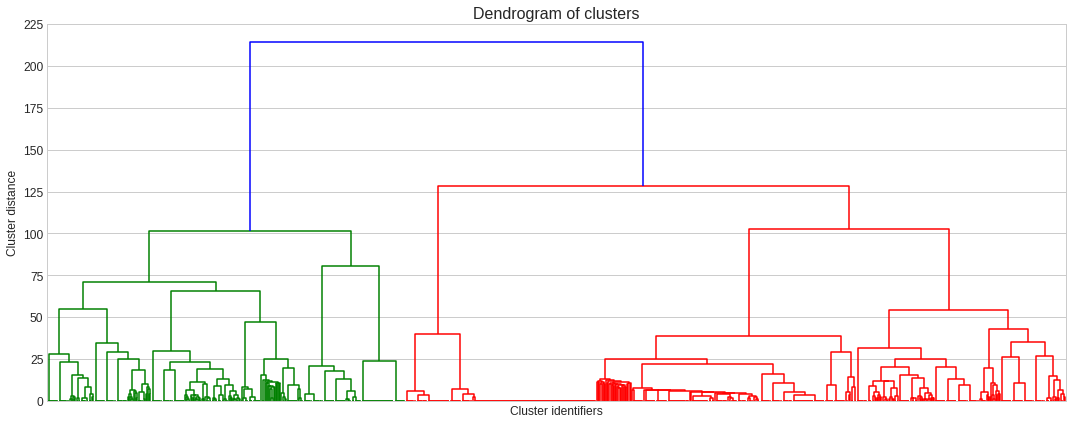

In [40]:
describe_data.plot_ward_dendrogram(clustering_results_df.T, wdir, show_labels = False, title = "Dendrogram of clusters", figsize = (15,6))

## Deciding Number of Clusters

### Two Clusters

In [41]:
clustering_of_clusters_results_df, clustering_of_clusters_parameters_results_df = cluster.create_clusters(wdir,
                  clustering_results_df.T, methods = ["AgglomerativeClustering"], 
                    max_MFFs = [5],
                    text_representations = ["raw"], ns_clusters = [2],
                    sampling_times = 1, 
                   )

textual representation:  raw
Columns that are empty:  []
5
           ne0404  ne0403  ne0121  ne0122  ne0123
cluster_0       1       0       1       1       0
cluster_1       1       0       1       1       0
cluster_2       0       1       0       0       1
cluster_3       0       1       0       0       1
cluster_4       1       0       1       1       0
AgglomerativeClustering
2
(910, 1)
(910, 352)


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [42]:
clustering_of_clusters_results_df.head()

cluster_0
cluster_0          1
cluster_1          1
cluster_2          0
cluster_3          0
cluster_4          1

Sizes of the two major clusters:

In [43]:
meta_cluster_0 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 0].index.tolist()
len(meta_cluster_0)


602

In [44]:
meta_cluster_1 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 1].index.tolist()
len(meta_cluster_1)

308

In [45]:
comparison_clusters_meta_cluster_0_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_0], new_metadata_df)

print(comparison_clusters_meta_cluster_0_result_df.shape)

cluster              cluster_50
mean                  0.0826604
median                0.0265957
std                    0.174005
max ARI author         0.168283
max ARI decade        0.0687698
max ARI subgenres      0.574199
opt-score-median      -0.243822
opt-score-mean        -0.187757
Name: 24, dtype: object
(602, 9)


In [46]:
comparison_clusters_meta_cluster_0_result_df.head(12)

cluster      mean    median       std  max ARI author  \
24    cluster_50  0.082660  0.026596  0.174005        0.168283   
25    cluster_51  0.082660  0.026596  0.174005        0.168283   
26    cluster_52  0.082660  0.026596  0.174005        0.168283   
27    cluster_53  0.082660  0.026596  0.174005        0.168283   
28    cluster_54  0.082660  0.026596  0.174005        0.168283   
29    cluster_55  0.082660  0.026596  0.174005        0.168283   
30    cluster_56  0.082660  0.026596  0.174005        0.168283   
31    cluster_57  0.082660  0.026596  0.174005        0.168283   
32    cluster_58  0.082660  0.026596  0.174005        0.168283   
33    cluster_59  0.082660  0.026596  0.174005        0.168283   
433  cluster_674  0.016771  0.024546  0.020369        0.102441   
296  cluster_450  0.083169  0.021368  0.231405        0.155042   

     max ARI decade  max ARI subgenres  opt-score-median  opt-score-mean  
24         0.068770           0.574199         -0.243822       -0.187757  
25         0.068770           0.574199         -0.243822       -0.187757  
26         0.068770           0.574199         -0.243822       -0.187757  
27         0.068770           0.574199         -0.243822       -0.187757  
28         0.068770           0.574199         -0.243822       -0.187757  
29         0.068770           0.574199         -0.243822       -0.187757  
30         0.068770           0.574199         -0.243822       -0.187757  
31         0.068770           0.574199         -0.243822       -0.187757  
32         0.068770           0.574199         -0.243822       -0.187757  
33         0.068770           0.574199         -0.243822       -0.187757  
433        0.066052           0.077583         -0.057480       -0.065255  
296        0.029839           0.866936         -0.329238       -0.267437

Similarity of the first clusters of the meta-cluster 0:

In [47]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(clustering_results_df["cluster_50"], clustering_results_df["cluster_51"])

1.0

The cluster with the highest median within the meta-cluster 1:

In [48]:
comparison_clusters_meta_cluster_1_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_1], new_metadata_df)
comparison_clusters_meta_cluster_1_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_1_result_df.shape)
comparison_clusters_meta_cluster_1_result_df.head()

cluster              cluster_217
mean                    0.226203
median                  0.143753
std                     0.295985
max ARI author          0.199497
max ARI decade         0.0652882
max ARI subgenres       0.204751
opt-score-median       -0.012759
opt-score-mean          0.069691
Name: 76, dtype: object
(308, 9)


cluster      mean    median       std  max ARI author  max ARI decade  \
76  cluster_217  0.226203  0.143753  0.295985        0.199497        0.065288   
69  cluster_181  0.222996  0.137785  0.293179        0.182465        0.055395   
73  cluster_213  0.225569  0.136756  0.297933        0.184069        0.067313   
75  cluster_215  0.224097  0.134900  0.297217        0.207655        0.062940   
72  cluster_211  0.223226  0.133635  0.294152        0.173216        0.059531   

    max ARI subgenres  opt-score-median  opt-score-mean  
76           0.204751         -0.012759        0.069691  
69           0.204751         -0.009752        0.075459  
73           0.187828         -0.009647        0.079166  
75           0.213665         -0.026520        0.062677  
72           0.175879         -0.002574        0.087017

In [50]:
adjusted_rand_score(clustering_results_df["cluster_217"], clustering_results_df["cluster_181"])

0.9047803618287454

Definition of the two clusters that will be analyzed:

In [49]:
best_cluster_metacluster_0 = "cluster_50"

best_cluster_metacluster_1 = "cluster_217"

print(best_cluster_metacluster_0, best_cluster_metacluster_1)

cluster_50 cluster_217


Sizes of both clusters:

In [51]:
clustering_results_df[best_cluster_metacluster_0].sum()

11

In [52]:
clustering_results_df[best_cluster_metacluster_1].sum()

87

Are these two clusters similar?

In [53]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_0], clustering_results_df[best_cluster_metacluster_1])

0.04708068342837122

Which parameters were used to obtain these clusters?

In [55]:
print(best_cluster_metacluster_0,best_cluster_metacluster_1)

cluster_50 cluster_217


In [57]:
parameters_results_df[[best_cluster_metacluster_0,best_cluster_metacluster_1]]

cluster_50 cluster_217
0                      log         log
1                       50        5000
2  AgglomerativeClustering      KMeans
3                        2           2
4                        0           7

### Three Clusters

In [47]:
clustering_of_clusters_results_df, clustering_of_clusters_parameters_results_df = cluster.create_clusters(wdir,
                  clustering_results_df.T, methods = ["AgglomerativeClustering"], 
                    max_MFFs = [5],
                    text_representations = ["raw"], ns_clusters = [3],
                    sampling_times = 1, 
                   )

textual representation:  raw
Columns that are empty:  []
5
           ne0404  ne0403  ne0121  ne0122  ne0123
cluster_0       1       0       1       1       0
cluster_1       1       0       1       1       0
cluster_2       0       1       0       0       1
cluster_3       0       1       0       0       1
cluster_4       1       0       1       1       0
AgglomerativeClustering
3
(910, 1)
(910, 352)


In [48]:
clustering_of_clusters_results_df.head()

cluster_0
cluster_0          1
cluster_1          1
cluster_2          0
cluster_3          0
cluster_4          1

In [49]:
meta_cluster_0 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 0].index.tolist()
len(meta_cluster_0)

232

In [50]:
meta_cluster_1 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 1].index.tolist()
len(meta_cluster_1)

308

In [51]:
meta_cluster_2 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 2].index.tolist()
len(meta_cluster_2)

370

In [52]:
comparison_clusters_meta_cluster_0_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_0], new_metadata_df)
print(comparison_clusters_meta_cluster_0_result_df.shape)

cluster              cluster_726
mean                    0.205147
median                  0.245849
std                     0.200773
max ARI author          0.184069
max ARI decade           0.09456
max ARI subgenres       0.158643
opt-score-median        0.100092
opt-score-mean         0.0593899
Name: 158, dtype: object
(232, 9)


In [53]:
comparison_clusters_meta_cluster_0_result_df.head(12)

cluster      mean    median       std  max ARI author  \
158  cluster_726  0.205147  0.245849  0.200773        0.184069   
159  cluster_729  0.205147  0.245849  0.200773        0.184069   
156  cluster_722  0.204653  0.240541  0.200583        0.180386   
157  cluster_724  0.204653  0.240541  0.200583        0.180386   
230  cluster_938  0.204597  0.231342  0.170925        0.058676   
228  cluster_935  0.196759  0.230861  0.167493        0.142186   
199  cluster_841  0.208177  0.214070  0.198630        0.062513   
201  cluster_845  0.208177  0.214070  0.198630        0.062513   
202  cluster_846  0.208177  0.214070  0.198630        0.062513   
203  cluster_847  0.208177  0.214070  0.198630        0.062513   
204  cluster_849  0.208177  0.214070  0.198630        0.062513   
46   cluster_187  0.312119  0.213447  0.299836        0.198027   

     max ARI decade  max ARI subgenres  opt-score-median  opt-score-mean  
158        0.094560           0.158643          0.100092        0.059390  
159        0.094560           0.158643          0.100092        0.059390  
156        0.101908           0.169244          0.090028        0.054140  
157        0.101908           0.169244          0.090028        0.054140  
230        0.035231           0.077166          0.174318        0.147572  
228        0.100004           0.170679          0.093238        0.059136  
199        0.060050           0.107585          0.137354        0.131461  
201        0.060050           0.107585          0.137354        0.131461  
202        0.060050           0.107585          0.137354        0.131461  
203        0.060050           0.107585          0.137354        0.131461  
204        0.060050           0.107585          0.137354        0.131461  
46         0.066164           0.222899          0.051083        0.149755

In [55]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(clustering_results_df["cluster_726"], clustering_results_df["cluster_729"])

1.0

In [56]:
comparison_clusters_meta_cluster_1_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_1], new_metadata_df)
comparison_clusters_meta_cluster_1_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_1_result_df.shape)
comparison_clusters_meta_cluster_1_result_df.head()


cluster              cluster_217
mean                    0.226203
median                  0.143753
std                     0.295985
max ARI author          0.199497
max ARI decade         0.0652882
max ARI subgenres       0.204751
opt-score-median       -0.012759
opt-score-mean          0.069691
Name: 76, dtype: object
(308, 9)


cluster      mean    median       std  max ARI author  max ARI decade  \
76  cluster_217  0.226203  0.143753  0.295985        0.199497        0.065288   
69  cluster_181  0.222996  0.137785  0.293179        0.182465        0.055395   
73  cluster_213  0.225569  0.136756  0.297933        0.184069        0.067313   
75  cluster_215  0.224097  0.134900  0.297217        0.207655        0.062940   
72  cluster_211  0.223226  0.133635  0.294152        0.173216        0.059531   

    max ARI subgenres  opt-score-median  opt-score-mean  
76           0.204751         -0.012759        0.069691  
69           0.204751         -0.009752        0.075459  
73           0.187828         -0.009647        0.079166  
75           0.213665         -0.026520        0.062677  
72           0.175879         -0.002574        0.087017

In [57]:
adjusted_rand_score(clustering_results_df["cluster_217"], clustering_results_df["cluster_181"])

0.9047803618287454

In [58]:
comparison_clusters_meta_cluster_2_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_2], new_metadata_df)
comparison_clusters_meta_cluster_2_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_2_result_df.shape)


cluster              cluster_380
mean                    0.333308
median                 0.0621804
std                      0.37708
max ARI author          0.311744
max ARI decade          0.238084
max ARI subgenres       0.206718
opt-score-median       -0.190001
opt-score-mean         0.0811263
Name: 177, dtype: object
(370, 9)


In [59]:
comparison_clusters_meta_cluster_2_result_df.head()


cluster      mean   median      std  max ARI author  max ARI decade  \
177  cluster_380  0.333308  0.06218  0.37708        0.311744        0.238084   
178  cluster_381  0.333308  0.06218  0.37708        0.311744        0.238084   
179  cluster_382  0.333308  0.06218  0.37708        0.311744        0.238084   
180  cluster_383  0.333308  0.06218  0.37708        0.311744        0.238084   
181  cluster_384  0.333308  0.06218  0.37708        0.311744        0.238084   

     max ARI subgenres  opt-score-median  opt-score-mean  
177           0.206718         -0.190001        0.081126  
178           0.206718         -0.190001        0.081126  
179           0.206718         -0.190001        0.081126  
180           0.206718         -0.190001        0.081126  
181           0.206718         -0.190001        0.081126

In [60]:
adjusted_rand_score(clustering_results_df["cluster_380"], clustering_results_df["cluster_381"])


1.0

In [61]:
best_cluster_metacluster_0 = "cluster_726"
best_cluster_metacluster_1 = "cluster_217"
best_cluster_metacluster_2 = "cluster_380"


In [62]:
print(best_cluster_metacluster_0, best_cluster_metacluster_1, best_cluster_metacluster_2)


cluster_726 cluster_217 cluster_380


In [63]:
clustering_results_df[best_cluster_metacluster_0].sum()

261

In [64]:
clustering_results_df[best_cluster_metacluster_1].sum()

87

In [65]:
clustering_results_df[best_cluster_metacluster_2].sum()

49

In [66]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_0], clustering_results_df[best_cluster_metacluster_1])

0.33585762169517597

In [67]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_0], clustering_results_df[best_cluster_metacluster_2])

-0.04011702453660724

In [68]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_1], clustering_results_df[best_cluster_metacluster_2])

-0.061740825426912296

In [69]:
parameters_results_df[[best_cluster_metacluster_0,best_cluster_metacluster_1, best_cluster_metacluster_2]]

cluster_726 cluster_217              cluster_380
0  tfidf-zscores         log                    tfidf
1             10        5000                     1000
2         KMeans      KMeans  AgglomerativeClustering
3              2           2                        2
4              6           7                        0

### Four Clusters

In [71]:
clustering_of_clusters_results_df, clustering_of_clusters_parameters_results_df = cluster.create_clusters(wdir,
                  clustering_results_df.T, methods = ["AgglomerativeClustering"], 
                    max_MFFs = [5],
                    text_representations = ["raw"], ns_clusters = [4],
                    sampling_times = 1, 
                   )


textual representation:  raw
Columns that are empty:  []
5
           ne0404  ne0403  ne0121  ne0122  ne0123
cluster_0       1       0       1       1       0
cluster_1       1       0       1       1       0
cluster_2       0       1       0       0       1
cluster_3       0       1       0       0       1
cluster_4       1       0       1       1       0
AgglomerativeClustering
4
(910, 1)
(910, 352)


In [72]:
clustering_of_clusters_results_df.head()

cluster_0
cluster_0          0
cluster_1          0
cluster_2          3
cluster_3          3
cluster_4          0

In [73]:
meta_cluster_0 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 0].index.tolist()
len(meta_cluster_0)


308

In [74]:
meta_cluster_1 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 1].index.tolist()
len(meta_cluster_1)


113

In [75]:
meta_cluster_2 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 2].index.tolist()
len(meta_cluster_2)


370

In [76]:
meta_cluster_3 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 3].index.tolist()
len(meta_cluster_3)


119

In [77]:
comparison_clusters_meta_cluster_0_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_0], new_metadata_df)
print(comparison_clusters_meta_cluster_0_result_df.shape)


cluster              cluster_217
mean                    0.226203
median                  0.143753
std                     0.295985
max ARI author          0.199497
max ARI decade         0.0652882
max ARI subgenres       0.204751
opt-score-median       -0.012759
opt-score-mean          0.069691
Name: 76, dtype: object
(308, 9)


In [78]:
comparison_clusters_meta_cluster_0_result_df.head(12)


cluster      mean    median       std  max ARI author  \
76   cluster_217  0.226203  0.143753  0.295985        0.199497   
69   cluster_181  0.222996  0.137785  0.293179        0.182465   
73   cluster_213  0.225569  0.136756  0.297933        0.184069   
75   cluster_215  0.224097  0.134900  0.297217        0.207655   
72   cluster_211  0.223226  0.133635  0.294152        0.173216   
74   cluster_214  0.224141  0.130353  0.297869        0.185110   
77   cluster_219  0.224141  0.130353  0.297869        0.185110   
156  cluster_510  0.205422  0.127839  0.265970        0.188835   
157  cluster_512  0.205422  0.127839  0.265970        0.188835   
292  cluster_939  0.149801  0.125303  0.170495        0.075800   
70   cluster_183  0.219295  0.123732  0.290756        0.190095   
298  cluster_950  0.157946  0.123680  0.214241        0.204354   

     max ARI decade  max ARI subgenres  opt-score-median  opt-score-mean  
76         0.065288           0.204751         -0.012759        0.069691  
69         0.055395           0.204751         -0.009752        0.075459  
73         0.067313           0.187828         -0.009647        0.079166  
75         0.062940           0.213665         -0.026520        0.062677  
72         0.059531           0.175879         -0.002574        0.087017  
74         0.054075           0.172030         -0.006719        0.087069  
77         0.054075           0.172030         -0.006719        0.087069  
156        0.065859           0.190296         -0.020491        0.057092  
157        0.065859           0.190296         -0.020491        0.057092  
292        0.046889           0.091579          0.053880        0.078378  
70         0.062940           0.213665         -0.031835        0.063729  
298        0.086296           0.164525         -0.028045        0.006220

In [80]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(clustering_results_df["cluster_217"], clustering_results_df["cluster_181"])


0.9047803618287454

In [81]:
comparison_clusters_meta_cluster_1_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_1], new_metadata_df)
comparison_clusters_meta_cluster_1_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_1_result_df.shape)
comparison_clusters_meta_cluster_1_result_df.head()


cluster              cluster_726
mean                    0.247471
median                  0.259423
std                     0.250216
max ARI author          0.184069
max ARI decade           0.09456
max ARI subgenres       0.158643
opt-score-median        0.113666
opt-score-mean          0.101714
Name: 49, dtype: object
(113, 9)


cluster      mean    median       std  max ARI author  \
49   cluster_726  0.247471  0.259423  0.250216        0.184069   
50   cluster_729  0.247471  0.259423  0.250216        0.184069   
47   cluster_722  0.249832  0.253688  0.249990        0.180386   
48   cluster_724  0.249832  0.253688  0.249990        0.180386   
111  cluster_938  0.233108  0.241870  0.193621        0.058676   

     max ARI decade  max ARI subgenres  opt-score-median  opt-score-mean  
49         0.094560           0.158643          0.113666        0.101714  
50         0.094560           0.158643          0.113666        0.101714  
47         0.101908           0.169244          0.103175        0.099319  
48         0.101908           0.169244          0.103175        0.099319  
111        0.035231           0.077166          0.184845        0.176084

In [83]:
adjusted_rand_score(clustering_results_df["cluster_726"], clustering_results_df["cluster_729"])


1.0

In [84]:
comparison_clusters_meta_cluster_2_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_2], new_metadata_df)
comparison_clusters_meta_cluster_2_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_2_result_df.shape)


cluster              cluster_380
mean                    0.333308
median                 0.0621804
std                      0.37708
max ARI author          0.311744
max ARI decade          0.238084
max ARI subgenres       0.206718
opt-score-median       -0.190001
opt-score-mean         0.0811263
Name: 177, dtype: object
(370, 9)


In [85]:
comparison_clusters_meta_cluster_2_result_df.head()


cluster      mean   median      std  max ARI author  max ARI decade  \
177  cluster_380  0.333308  0.06218  0.37708        0.311744        0.238084   
178  cluster_381  0.333308  0.06218  0.37708        0.311744        0.238084   
179  cluster_382  0.333308  0.06218  0.37708        0.311744        0.238084   
180  cluster_383  0.333308  0.06218  0.37708        0.311744        0.238084   
181  cluster_384  0.333308  0.06218  0.37708        0.311744        0.238084   

     max ARI subgenres  opt-score-median  opt-score-mean  
177           0.206718         -0.190001        0.081126  
178           0.206718         -0.190001        0.081126  
179           0.206718         -0.190001        0.081126  
180           0.206718         -0.190001        0.081126  
181           0.206718         -0.190001        0.081126

In [86]:
adjusted_rand_score(clustering_results_df["cluster_380"], clustering_results_df["cluster_381"])


1.0

In [87]:
comparison_clusters_meta_cluster_3_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_3], new_metadata_df)
comparison_clusters_meta_cluster_3_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_3_result_df.shape)
comparison_clusters_meta_cluster_3_result_df.head()


cluster              cluster_665
mean                     0.47803
median                   0.70132
std                     0.342824
max ARI author          0.207655
max ARI decade         0.0735487
max ARI subgenres       0.197595
opt-score-median         0.54172
opt-score-mean           0.31843
Name: 81, dtype: object
(119, 9)


cluster      mean    median       std  max ARI author  max ARI decade  \
81  cluster_665  0.478030  0.701320  0.342824        0.207655        0.073549   
37  cluster_590  0.497811  0.700629  0.350924        0.234571        0.057768   
38  cluster_591  0.497811  0.700629  0.350924        0.234571        0.057768   
39  cluster_592  0.497811  0.700629  0.350924        0.234571        0.057768   
40  cluster_593  0.497811  0.700629  0.350924        0.234571        0.057768   

    max ARI subgenres  opt-score-median  opt-score-mean  
81           0.197595          0.541720        0.318430  
37           0.190146          0.539801        0.336982  
38           0.190146          0.539801        0.336982  
39           0.190146          0.539801        0.336982  
40           0.190146          0.539801        0.336982

In [88]:
adjusted_rand_score(clustering_results_df["cluster_665"], clustering_results_df["cluster_590"])


0.7463064737749519

In [89]:
best_cluster_metacluster_0 = "cluster_217"

best_cluster_metacluster_1 = "cluster_726"
best_cluster_metacluster_2 = "cluster_380"
best_cluster_metacluster_3 = "cluster_665"


In [91]:

print(best_cluster_metacluster_0, best_cluster_metacluster_1, best_cluster_metacluster_2, best_cluster_metacluster_3)


cluster_217 cluster_726 cluster_380 cluster_665


In [92]:

clustering_results_df[best_cluster_metacluster_0].sum()


87

In [93]:

clustering_results_df[best_cluster_metacluster_1].sum()


261

In [94]:

clustering_results_df[best_cluster_metacluster_2].sum()


49

In [95]:

clustering_results_df[best_cluster_metacluster_3].sum()


85

In [96]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_0], clustering_results_df[best_cluster_metacluster_1])


0.33585762169517597

In [98]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_0], clustering_results_df[best_cluster_metacluster_2])


-0.061740825426912296

In [99]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_0], clustering_results_df[best_cluster_metacluster_3])


0.79132468403286

In [100]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_1], clustering_results_df[best_cluster_metacluster_2])


-0.04011702453660724

In [101]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_1], clustering_results_df[best_cluster_metacluster_3])


0.30470580074174436

In [103]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_2], clustering_results_df[best_cluster_metacluster_3])


-0.06153435285715748

In [104]:
parameters_results_df[[best_cluster_metacluster_0,best_cluster_metacluster_1, best_cluster_metacluster_2, best_cluster_metacluster_3]]

cluster_217    cluster_726              cluster_380    cluster_665
0         log  tfidf-zscores                    tfidf  log10-zscores
1        5000             10                     1000           3000
2      KMeans         KMeans  AgglomerativeClustering         KMeans
3           2              2                        2              2
4           7              6                        0              5

### Five Clusters?

In [ ]:
clustering_of_clusters_results_df, clustering_of_clusters_parameters_results_df = cluster.create_clusters(wdir,
                  clustering_results_df.T, methods = ["AgglomerativeClustering"], 
                    max_MFFs = [5],
                    text_representations = ["raw"], ns_clusters = [4],
                    sampling_times = 1, 
                   )

clustering_of_clusters_results_df.head()


meta_cluster_0 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 0].index.tolist()
len(meta_cluster_0)

meta_cluster_1 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 1].index.tolist()
len(meta_cluster_1)

meta_cluster_2 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 2].index.tolist()
len(meta_cluster_2)

meta_cluster_3 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 3].index.tolist()
len(meta_cluster_3)

meta_cluster_4 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 4].index.tolist()
len(meta_cluster_4)

comparison_clusters_meta_cluster_0_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_0], new_metadata_df)
print(comparison_clusters_meta_cluster_0_result_df.shape)

comparison_clusters_meta_cluster_0_result_df.head(12)

from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(clustering_results_df["cluster_50"], clustering_results_df["cluster_729"])

comparison_clusters_meta_cluster_1_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_1], new_metadata_df)
comparison_clusters_meta_cluster_1_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_1_result_df.shape)
comparison_clusters_meta_cluster_1_result_df.head()

adjusted_rand_score(clustering_results_df["cluster_217"], clustering_results_df["cluster_181"])

comparison_clusters_meta_cluster_2_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_2], new_metadata_df)
comparison_clusters_meta_cluster_2_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_2_result_df.shape)

comparison_clusters_meta_cluster_2_result_df.head()

adjusted_rand_score(clustering_results_df["cluster_380"], clustering_results_df["cluster_381"])

comparison_clusters_meta_cluster_3_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_3], new_metadata_df)
comparison_clusters_meta_cluster_3_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_3_result_df.shape)
comparison_clusters_meta_cluster_3_result_df.head()

adjusted_rand_score(clustering_results_df["cluster_665"], clustering_results_df["cluster_590"])

comparison_clusters_meta_cluster_4_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_4], new_metadata_df)
comparison_clusters_meta_cluster_4_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_4_result_df.shape)
comparison_clusters_meta_cluster_4_result_df.head()

adjusted_rand_score(clustering_results_df["cluster_726"], clustering_results_df["cluster_729"])

best_cluster_metacluster_0 = "cluster_726"

best_cluster_metacluster_1 = "cluster_217"
best_cluster_metacluster_2 = "cluster_380"
best_cluster_metacluster_3 = ""
best_cluster_metacluster_4 = ""

print(best_cluster_metacluster_0, best_cluster_metacluster_1, best_cluster_metacluster_2, best_cluster_metacluster_3, best_cluster_metacluster_4)

clustering_results_df[best_cluster_metacluster_0].sum()

clustering_results_df[best_cluster_metacluster_1].sum()

clustering_results_df[best_cluster_metacluster_2].sum()

clustering_results_df[best_cluster_metacluster_3].sum()

clustering_results_df[best_cluster_metacluster_4].sum()

adjusted_rand_score(clustering_results_df[best_cluster_metacluster_0], clustering_results_df[best_cluster_metacluster_1])
...

parameters_results_df[[best_cluster_metacluster_0,best_cluster_metacluster_1, best_cluster_metacluster_2]]

## Decision: Two Clusters

In [105]:
clustering_of_clusters_results_df, clustering_of_clusters_parameters_results_df = cluster.create_clusters(wdir,
                  clustering_results_df.T, methods = ["AgglomerativeClustering"], 
                    max_MFFs = [5],
                    text_representations = ["raw"], ns_clusters = [2],
                    sampling_times = 1, 
                   )

textual representation:  raw
Columns that are empty:  []
5
           ne0404  ne0403  ne0121  ne0122  ne0123
cluster_0       1       0       1       1       0
cluster_1       1       0       1       1       0
cluster_2       0       1       0       0       1
cluster_3       0       1       0       0       1
cluster_4       1       0       1       1       0
AgglomerativeClustering
2
(910, 1)
(910, 352)


In [106]:
clustering_of_clusters_results_df.head()

cluster_0
cluster_0          1
cluster_1          1
cluster_2          0
cluster_3          0
cluster_4          1

Sizes of the two major clusters:

In [107]:
meta_cluster_0 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 0].index.tolist()
len(meta_cluster_0)


602

In [108]:
meta_cluster_1 = clustering_of_clusters_results_df.loc[clustering_of_clusters_results_df["cluster_0"]== 1].index.tolist()
len(meta_cluster_1)

308

In [109]:
comparison_clusters_meta_cluster_0_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_0], new_metadata_df)

print(comparison_clusters_meta_cluster_0_result_df.shape)

cluster              cluster_50
mean                  0.0826604
median                0.0265957
std                    0.174005
max ARI author         0.168283
max ARI decade        0.0687698
max ARI subgenres      0.574199
opt-score-median      -0.243822
opt-score-mean        -0.187757
Name: 24, dtype: object
(602, 9)


In [110]:
comparison_clusters_meta_cluster_0_result_df.head(12)

cluster      mean    median       std  max ARI author  \
24    cluster_50  0.082660  0.026596  0.174005        0.168283   
25    cluster_51  0.082660  0.026596  0.174005        0.168283   
26    cluster_52  0.082660  0.026596  0.174005        0.168283   
27    cluster_53  0.082660  0.026596  0.174005        0.168283   
28    cluster_54  0.082660  0.026596  0.174005        0.168283   
29    cluster_55  0.082660  0.026596  0.174005        0.168283   
30    cluster_56  0.082660  0.026596  0.174005        0.168283   
31    cluster_57  0.082660  0.026596  0.174005        0.168283   
32    cluster_58  0.082660  0.026596  0.174005        0.168283   
33    cluster_59  0.082660  0.026596  0.174005        0.168283   
433  cluster_674  0.016771  0.024546  0.020369        0.102441   
296  cluster_450  0.083169  0.021368  0.231405        0.155042   

     max ARI decade  max ARI subgenres  opt-score-median  opt-score-mean  
24         0.068770           0.574199         -0.243822       -0.187757  
25         0.068770           0.574199         -0.243822       -0.187757  
26         0.068770           0.574199         -0.243822       -0.187757  
27         0.068770           0.574199         -0.243822       -0.187757  
28         0.068770           0.574199         -0.243822       -0.187757  
29         0.068770           0.574199         -0.243822       -0.187757  
30         0.068770           0.574199         -0.243822       -0.187757  
31         0.068770           0.574199         -0.243822       -0.187757  
32         0.068770           0.574199         -0.243822       -0.187757  
33         0.068770           0.574199         -0.243822       -0.187757  
433        0.066052           0.077583         -0.057480       -0.065255  
296        0.029839           0.866936         -0.329238       -0.267437

Similarity of the first clusters of the meta-cluster 0:

In [111]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(clustering_results_df["cluster_50"], clustering_results_df["cluster_51"])

1.0

The cluster with the highest median within the meta-cluster 1:

In [112]:
comparison_clusters_meta_cluster_1_result_df = cluster.compare_clusters_and_evaluate_with_metadata(clustering_results_df[meta_cluster_1], new_metadata_df)
comparison_clusters_meta_cluster_1_result_df.sort_values(by=["median","cluster"],inplace=True,ascending=[False,True])
print(comparison_clusters_meta_cluster_1_result_df.shape)
comparison_clusters_meta_cluster_1_result_df.head()

cluster              cluster_217
mean                    0.226203
median                  0.143753
std                     0.295985
max ARI author          0.199497
max ARI decade         0.0652882
max ARI subgenres       0.204751
opt-score-median       -0.012759
opt-score-mean          0.069691
Name: 76, dtype: object
(308, 9)


cluster      mean    median       std  max ARI author  max ARI decade  \
76  cluster_217  0.226203  0.143753  0.295985        0.199497        0.065288   
69  cluster_181  0.222996  0.137785  0.293179        0.182465        0.055395   
73  cluster_213  0.225569  0.136756  0.297933        0.184069        0.067313   
75  cluster_215  0.224097  0.134900  0.297217        0.207655        0.062940   
72  cluster_211  0.223226  0.133635  0.294152        0.173216        0.059531   

    max ARI subgenres  opt-score-median  opt-score-mean  
76           0.204751         -0.012759        0.069691  
69           0.204751         -0.009752        0.075459  
73           0.187828         -0.009647        0.079166  
75           0.213665         -0.026520        0.062677  
72           0.175879         -0.002574        0.087017

In [113]:
adjusted_rand_score(clustering_results_df["cluster_217"], clustering_results_df["cluster_181"])

0.9047803618287454

Definition of the two clusters that will be analyzed:

In [120]:
best_cluster_metacluster_0 = "cluster_50"

best_cluster_metacluster_1 = "cluster_217"


print(best_cluster_metacluster_0, best_cluster_metacluster_1)

cluster_50 cluster_217


Sizes of both clusters:

In [121]:
clustering_results_df[best_cluster_metacluster_0].sum()

11

In [122]:
clustering_results_df[best_cluster_metacluster_1].sum()

87

Are these two clusters similar?

In [123]:
adjusted_rand_score(clustering_results_df[best_cluster_metacluster_0], clustering_results_df[best_cluster_metacluster_1])

0.04708068342837122

Which parameters were used to obtain these clusters?

In [125]:
print(best_cluster_metacluster_0,best_cluster_metacluster_1)

cluster_50 cluster_217


In [126]:
parameters_results_df[[best_cluster_metacluster_0,best_cluster_metacluster_1]]

cluster_50 cluster_217
0                      log         log
1                       50        5000
2  AgglomerativeClustering      KMeans
3                        2           2
4                        0           7

Integration of these two clusters in the metadata:

In [127]:
new_metadata_df[best_cluster_metacluster_0] = clustering_results_df[best_cluster_metacluster_0]
new_metadata_df[best_cluster_metacluster_1] = clustering_results_df[best_cluster_metacluster_1]



In [128]:
new_metadata_df.head()

idno author.name         title  year supergenre   genre  \
ne0001  ne0001      Baroja     Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos  Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos       Nazarin  1895  narrative  novela   
ne0004  ne0004      Galdos         Halma  1895  narrative  novela   
ne0005  ne0005      Galdos      Tristana  1892  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  \
ne0001                  realist          Spain   36912891.0   XX842743   
ne0002                  realist          Spain   71395987.0  XX1014802   
ne0003                  realist          Spain   71395987.0  XX1014802   
ne0004                  realist          Spain   71395987.0  XX1014802   
ne0005            bildungsroman          Spain   71395987.0  XX1014802   

           ...     authorText.relation_ordinal litHist.brow_ordinal  \
ne0001     ...                               0                  NaN   
ne0002     ...                               0                  NaN   
ne0003     ...                               0                  0.0   
ne0004     ...                               0                  NaN   
ne0005     ...                               0                  NaN   

       setting.type_ordinal time.period_ordinal protagonist.age_ordinal  \
ne0001                  1.0                 3.0                     3.0   
ne0002                  3.0                 3.0                     2.0   
ne0003                  3.0                 3.0                     2.0   
ne0004                  3.0                 3.0                     2.0   
ne0005                  3.0                 3.0                     1.0   

       protagonist.socLevel_ordinal end_ordinal representation_ordinal  \
ne0001                          2.0         4.0                      2   
ne0002                          0.0         0.0                      2   
ne0003                          0.0         4.0                      2   
ne0004                          2.0         4.0                      2   
ne0005                          0.0         3.0                      2   

       cluster_50 cluster_217  
ne0001          0           0  
ne0002          0           0  
ne0003          0           0  
ne0004          0           0  
ne0005          0           0  

[5 rows x 214 columns]

In [129]:
rel_new_metadata_df = new_metadata_df.copy()
linguistic_features_raw_lt = [ 'am.chars', 'am.divs', 'am.verses', 'am.sps', 'am.paragraphs', 'am.pds', 'am.numerals', 'am.puncts', 'am.blocks', 'am.chapters', 'am.shortStories', 'am.parts', 'am.sections', 'am.divisions', 'am.lg.poems', 'am.lg.stanzas', 'am.saids', 'am.narrative.ps', 'am.punctual.ss', 'len.abstract', 'am.fts', 'len.chapters.mean', 'len.chapters.std', 'len.chapters.median', 'len.chapters.iqr', 'am.conjunctions', 'am.determiners', 'am.nouns', 'am.verbs', 'am.adverbs', 'am.adjectives', 'am.adpositions', 'am.punctuations', 'am.pronouns', 'am.dates', 'am.numbers', 'am.interjections', 'am.ne.persons', 'am.ne.organizations', 'am.ne.locations', 'am.ne.others', 'am.ss', 'len.ss.mean', 'len.ss.std', 'len.ss.median', 'len.ss.iqr', 'am.ss.active.verbs.mean', 'am.ss.active.verbs.std', 'am.ss.active.verbs.median', 'am.ss.active.verbs.iqr', 'am.ws', 'am.ws.num.mean', 'am.ws.num.std', 'am.ws.num.median', 'am.ws.num.iqr', 'am.wnlex.noun.plants', 'am.wnlex.verb.communications', 'am.wnlex.noun.foods', 'am.wnlex.verb.possessions', 'am.wnlex.verb.cognitions', 'am.wnlex.noun.communications', 'am.wnlex.noun.states', 'am.wnlex.verb.statives', 'am.wnlex.noun.cognitions', 'am.wnlex.noun.times', 'am.wnlex.verb.bodys', 'am.wnlex.noun.persons', 'am.wnlex.adj.alls', 'am.wnlex.noun.quantitys', 'am.wnlex.noun.phenomenons', 'am.wnlex.verb.creations', 'am.wnlex.adj.perts', 'am.wnlex.adv.alls', 'am.wnlex.noun.processs', 'am.wnlex.noun.artifacts', 'am.wnlex.verb.perceptions', 'am.wnlex.noun.feelings', 'am.wnlex.verb.weathers', 'am.wnlex.noun.substances', 'am.wnlex.noun.shapes', 'am.wnlex.verb.competitions', 'am.wnlex.verb.motions', 'am.wnlex.noun.animals', 'am.wnlex.noun.acts', 'am.wnlex.noun.bodys', 'am.wnlex.noun.objects', 'am.wnlex.noun.motives', 'am.wnlex.verb.socials', 'am.wnlex.noun.groups', 'am.wnlex.verb.consumptions', 'am.wnlex.noun.possessions', 'am.wnlex.noun.Topss', 'am.wnlex.noun.relations', 'am.wnlex.noun.attributes', 'am.wnlex.verb.emotions', 'am.wnlex.noun.locations', 'am.wnlex.noun.events', 'am.wnlex.verb.contacts', 'am.wnlex.xxxs', 'am.wnlex.verb.changes']
for column in linguistic_features_raw_lt:
    rel_new_metadata_df[column] = rel_new_metadata_df[column] / rel_new_metadata_df["am.tokens"]

rel_new_metadata_df['0@ord_ent'] = rel_tags_ling_pos_diff_mw_ord_ent_df['0@ord_ent']
rel_new_metadata_df['1@ord_ent'] = rel_tags_ling_pos_diff_mw_ord_ent_df['1@ord_ent']
rel_new_metadata_df['2@ord_ent'] = rel_tags_ling_pos_diff_mw_ord_ent_df['2@ord_ent']


In [130]:
rel_new_metadata_df.head()

idno author.name         title  year supergenre   genre  \
ne0001  ne0001      Baroja     Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos  Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos       Nazarin  1895  narrative  novela   
ne0004  ne0004      Galdos         Halma  1895  narrative  novela   
ne0005  ne0005      Galdos      Tristana  1892  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  \
ne0001                  realist          Spain   36912891.0   XX842743   
ne0002                  realist          Spain   71395987.0  XX1014802   
ne0003                  realist          Spain   71395987.0  XX1014802   
ne0004                  realist          Spain   71395987.0  XX1014802   
ne0005            bildungsroman          Spain   71395987.0  XX1014802   

          ...    time.period_ordinal protagonist.age_ordinal  \
ne0001    ...                    3.0                     3.0   
ne0002    ...                    3.0                     2.0   
ne0003    ...                    3.0                     2.0   
ne0004    ...                    3.0                     2.0   
ne0005    ...                    3.0                     1.0   

       protagonist.socLevel_ordinal end_ordinal representation_ordinal  \
ne0001                          2.0         4.0                      2   
ne0002                          0.0         0.0                      2   
ne0003                          0.0         4.0                      2   
ne0004                          2.0         4.0                      2   
ne0005                          0.0         3.0                      2   

       cluster_50 cluster_217 0@ord_ent 1@ord_ent 2@ord_ent  
ne0001          0           0  0.002352  0.002053  0.001680  
ne0002          0           0  0.002852  0.001611  0.001253  
ne0003          0           0  0.002564  0.001962  0.001885  
ne0004          0           0  0.001500  0.001404  0.001377  
ne0005          0           0  0.002625  0.002188  0.001427  

[5 rows x 217 columns]

# 6.2.6. Exploration of Meta-Cluster 0: Cluster 50

Description of the best representative of the meta-cluster 0:

In [131]:
best_cluster_metacluster_0

'cluster_50'

In [132]:
clustering_results_df[best_cluster_metacluster_0].sum()

11

Association of this cluster with other already given labels:

In [133]:
metacluster_0_subgenres_results_df = cluster.compare_cluster_with_metadata(clustering_results_df[best_cluster_metacluster_0], new_metadata_df, semantic_subgenres_lt, get_dummies=False)
metacluster_0_subgenres_results_df.head()

class     score measure
4             diálogo  0.574199     ARI
19            poética  0.226585     ARI
6   episodio nacional  0.057686     ARI
5           educación  0.015113     ARI
9          fantástico  0.013128     ARI

Association of this cluster with author's names:

In [134]:
metacluster_0_author_results_df = cluster.compare_cluster_with_metadata(clustering_results_df[best_cluster_metacluster_0], new_metadata_df, "author.name", get_dummies=True)
metacluster_0_author_results_df.head(10)

class     score measure
29     Galdos  0.168283     ARI
5         Aub  0.157506     ARI
13  Benavente  0.157506     ARI
20     Chacel  0.157506     ARI
6       Azana  0.140860     ARI
38      Lorca  0.140860     ARI
44       Noel -0.005081     ARI
33      Hoyos -0.005081     ARI
32    Herrera -0.005081     ARI
31  Hernandez -0.005081     ARI

Association of this cluster with decades:

In [135]:
metacluster_0_author_results_df = cluster.compare_cluster_with_metadata(clustering_results_df[best_cluster_metacluster_0], new_metadata_df, "decade", get_dummies=True)
metacluster_0_author_results_df.head()

class     score measure
1   1890  0.068770     ARI
5   1930  0.038392     ARI
3   1910  0.000353     ARI
0   1880 -0.015850     ARI
2   1900 -0.021867     ARI

Comparison of the association between the subgenres and this cluster (on one side), and the author name (on the other side):

In [137]:
for subgenre in semantic_subgenres_lt+[best_cluster_metacluster_0]:
    print(subgenre, stats.chi2_contingency(pd.crosstab(new_metadata_df[subgenre], new_metadata_df["author.name"]))[1])

autobiografía 0.005717103088096608
aventura 7.1238772488370246e-06
biografía 0.013203846685647905
costumbrista 3.1418438533835703e-08
diálogo 0.9842638140492362
educación 0.44713361963514686
episodio nacional 0.00016877174787608917
erótica 2.445630272222022e-12
espiritual 0.7511234246531587
fantástico 0.18453923710800485
filosófica 4.507140384528338e-08
greguería 0.9990572485142338
guerra 0.007020599082809451
histórica 3.67289748238878e-07
humor 2.785693865855581e-08
memorias 0.44872497035140463
modernista 0.0018631377877741306
naturalista 0.002676016019870297
nivola 1.1409508487300102e-28
poética 1.0591571412346544e-26
psicológica 0.024103154226599467
realista 6.076696091587606e-09
social 0.005681612292375757
ficción-literaria 7.417601686440727e-12
cluster_50 3.3956266797852543e-07


The cluster_50 does show association with authorship, but this association is not stronger than many others.

Comparison of the association between the subgenres and this cluster (on one side), and decades (on the other side):

In [139]:
for subgenre in semantic_subgenres_lt+[best_cluster_metacluster_0]:
    print(subgenre, stats.chi2_contingency(pd.crosstab(new_metadata_df[subgenre], new_metadata_df["decade"]))[1])

autobiografía 0.2830491438321829
aventura 0.0003215365669531717
biografía 0.5852889143424722
costumbrista 2.0179243658129225e-06
diálogo 0.910250294279171
educación 0.6661726179173514
episodio nacional 0.16493805529970412
erótica 0.756489429870336
espiritual 0.11618205662102374
fantástico 0.16920163707271138
filosófica 0.00021678137894893306
greguería 0.5113874039746478
guerra 0.006411065900440055
histórica 0.028577878940356353
humor 2.2688820963387973e-05
memorias 0.5440328777752117
modernista 1.2318592222906496e-05
naturalista 2.8938653659826288e-19
nivola 0.7101284222127965
poética 0.29954655375013123
psicológica 0.01768252867955059
realista 2.3116482255620576e-16
social 0.7168417319735626
ficción-literaria 2.9565851767016557e-08
cluster_50 0.14067661403773393


The cluster_50 does show association with chronology, but this association is not stronger than many others.



Description of the cluster with statistical tendencies (median, std and mode):

In [140]:
comparison_best_cluster_metacluster_0_metadata_df = cluster.define_cluster_with_metadata(new_metadata_df, best_cluster_metacluster_0)

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:838: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))


In [141]:
comparison_best_cluster_metacluster_0_metadata_df

class      median         mean          std  \
0                            idno                                         
1                     author.name                                         
2                           title                                         
3                            year        1900      1909.55      18.2558   
4                      supergenre                                         
5                           genre                                         
6        subgenre.cligs.important                                         
7                  author.country                                         
8                     author.viaf  7.1396e+07  5.78483e+07  2.90661e+07   
9                      author.bne                                         
10                  author.gender                                         
11                     title.main                                         
12                     title.viaf                                         
13                      title.bne                                         
14               author.name.full                                         
15                       subtitle                                         
16                   availability                                         
17                 subgenre.cligs                                         
18                 genre.analyzed                                         
19            genre.analyzed.cert           0            0            0   
20                      date.file                                         
21                 digital.source                                         
22          digital.source.format                                         
23                 genre.subtitle                                         
24                       narrator                                         
25             protagonist.gender                                         
26                   setting.type                                         
27                           form                                         
28                    publication                                         
29            digital.source.idno                                         
..                            ...         ...          ...          ...   
184                       erótica           0            0            0   
185                    espiritual           0            0            0   
186                    fantástico           0    0.0909091     0.301511   
187                    filosófica           0     0.272727     0.467099   
188                     greguería           0            0            0   
189                        guerra           0            0            0   
190                     histórica           0     0.181818      0.40452   
191                         humor           0    0.0909091     0.301511   
192                      memorias           0    0.0909091     0.301511   
193                    modernista           0    0.0909091     0.301511   
194                   naturalista           0     0.181818      0.40452   
195                        nivola           0            0            0   
196                       poética           0     0.181818      0.40452   
197                   psicológica           0            0            0   
198                      realista           1     0.545455     0.522233   
199                        social           1     0.727273     0.467099   
200             ficción-literaria           1     0.545455     0.522233   
201               subgenre.random                                         
202       author.movement_ordinal           1            1      1.09545   
203    author.submovement_ordinal           4      2.90909      2.84445   
204   authorText.relation_ordinal           0     0.818182       1.4013   
205          litHist.brow_ordinal           2        

Authors that write in this cluster:

In [142]:
Counter(new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_0] == 1]["author.name"]).most_common(15)

[('Galdos', 5),
 ('Baroja', 1),
 ('Aub', 1),
 ('Azana', 1),
 ('Lorca', 1),
 ('Chacel', 1),
 ('Benavente', 1)]

Authors that did not write in this cluster:

In [143]:
Counter(new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_0] == 0]["author.name"]).most_common(15)

[('Baroja', 37),
 ('Galdos', 28),
 ('BlascoIbanez', 25),
 ('Miro', 19),
 ('Bazan', 19),
 ('Valdes', 18),
 ('Serna', 17),
 ('Valle', 13),
 ('WFFlorez', 10),
 ('Pereda', 10),
 ('RPAyala', 9),
 ('Azorin', 8),
 ('Trigo', 7),
 ('Lanza', 7),
 ('CEspina', 7)]

Texts in this cluster:

Test which metadata and linguistic annotation differentiate the texts of this cluster with the rest:

In [144]:
test_metadata_best_cluster_metacluster_0_df = cluster.test_cluster_with_metadata(rel_new_metadata_df,best_cluster_metacluster_0)


          idno author.name         title  year supergenre   genre  \
ne0001  ne0001      Baroja     Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos  Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos       Nazarin  1895  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  \
ne0001                  realist          Spain   36912891.0   XX842743   
ne0002                  realist          Spain   71395987.0  XX1014802   
ne0003                  realist          Spain   71395987.0  XX1014802   

          ...    time.period_ordinal protagonist.age_ordinal  \
ne0001    ...                    3.0                     3.0   
ne0002    ...                    3.0                     2.0   
ne0003    ...                    3.0                     2.0   

       protagonist.socLevel_ordinal end_ordinal representation_ordinal  \
ne0001                          2.0         4.0                      2   
ne0002               

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:838: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))


author.name.full
subtitle
availability
subgenre.cligs
genre.analyzed
genre.analyzed.cert
date.file
digital.source
digital.source.format
genre.subtitle
narrator
protagonist.gender
setting.type
form
publication
digital.source.idno
author.continent
authorText.group
authorText.subgroup
protagonist.name
protagonist.age
protagonist.socLevel
protagonist.profession
representation
setting.continent
setting.country
setting.settlement
setting.territory
text.movement
time.period
time.span
numeric
authorText.relation
end
time.year
keywords.cert
author.movement
author.submovement
author.date.birth
numeric
author.date.death
numeric
litHist.literaryQuality
litHist.brow
litHist.audience
author.litHist.pages
numeric
author.nonNovelGenre
litHist.pages
numeric
author.year.change
numeric
setting.settlement.represented.exist
numeric
setting.represented
MdLE
numeric
CoNSSA
numeric
CoNSSA.canon
numeric
HdLE
numeric
subgenre.lithist.MdLE
subgenre.lithist.HdLE
subgenre.edit.epublibre
subgenre.edit.amazon
subgen

In [145]:
pd.options.display.max_rows = 999
test_metadata_best_cluster_metacluster_0_df.loc[test_metadata_best_cluster_metacluster_0_df["p-value"]<0.05]



class       p-value  \
206                       cluster_50  2.819195e-78   
73                  subgenre.cluster  5.503148e-76   
24                          narrator  2.316053e-34   
27                              form  7.099513e-31   
175                          diálogo  1.614092e-28   
71             subgenre.subtitle.bne  5.025111e-22   
15                          subtitle  4.201991e-21   
6           subgenre.cligs.important  3.148820e-20   
72   subgenre.subtitle.first.edition  6.700204e-16   
23                    genre.subtitle  9.020036e-11   
78                            am.sps  1.581948e-09   
80                            am.pds  1.806894e-08   
90                          am.saids  2.023450e-08   
9                         author.bne  2.309563e-07   
14                  author.name.full  3.395627e-07   
1                        author.name  3.395627e-07   
190                          poética  1.946644e-06   
100                   am.determiners  1.169496e-05   
65             subgenre.lithist.MdLE  1.374889e-05   
105                   am.adpositions  7.164126e-05   
68              subgenre.edit.amazon  8.535897e-05   
154              am.wnlex.noun.bodys  9.208260e-05   
165          am.wnlex.noun.locations  4.231259e-04   
115                            am.ss  8.240221e-04   
127              am.wnlex.noun.foods  8.698806e-04   
152            am.wnlex.noun.animals  9.380665e-04   
13                         title.bne  1.305913e-03   
107                      am.pronouns  1.388238e-03   
129         am.wnlex.verb.cognitions  1.402796e-03   
167           am.wnlex.verb.contacts  1.417496e-03   
148         am.wnlex.noun.substances  1.447321e-03   
31                  authorText.group  1.556126e-03   
144          am.wnlex.noun.artifacts  2.010277e-03   
57              author.nonNovelGenre  2.246254e-03   
136            am.wnlex.noun.persons  2.582966e-03   
20                         date.file  2.598336e-03   
149             am.wnlex.noun.shapes  3.175379e-03   
125             am.wnlex.noun.plants  3.269452e-03   
169            am.wnlex.verb.changes  4.527738e-03   
132           am.wnlex.verb.statives  5.560809e-03   
133         am.wnlex.noun.cognitions  5.986312e-03   
161              am.wnlex.noun.Topss  6.041513e-03   
147           am.wnlex.verb.weathers  6.266931e-03   
155            am.wnlex.noun.objects  6.926381e-03   
28                       publication  6.977535e-03   
164           am.wnlex.verb.emotions  7.377844e-03   
109                       am.numbers  8.068597e-03   
210                        2@ord_ent  1.050122e-02   
74                         am.tokens  1.050122e-02   
151            am.wnlex.verb.motions  1.077720e-02   
103                       am.adverbs  1.134856e-02   
86                       am.sections  1.150634e-02   
93                      len.abstract  1.184508e-02   
208                        0@ord_ent  1.257254e-02   
158             am.wnlex.noun.groups  1.345213e-02   
108                         am.dates  1.537584e-02   
50                author.submovement  1.710124e-02   
156            am.wnlex.noun.motives  1.732405e-02   
134              am.wnlex.noun.times  1.739520e-02   
56              author.litHist.pages  1.763241e-02   
143           am.wnlex.noun.processs  1.871537e-02   
43                       time.period  1.918925e-02   
207                      cluster_217  2.007760e-02   
17                    subgenre.cligs  2.344592e-02   
87                      am.divisions  2.808347e-02   
209                        1@ord_ent  2.862675e-02   
44                         time.span  4.009053e-02   
104                    am.adjectives  4.627128e-02   

               median/mode-in-cluster_50  \
206                                    1   
73                 mono-diálogo,bucólica   
24                              dialogue   
27                              dialogue   
175                                    1   
71                                     0

In [146]:
test_metadata_best_cluster_metacluster_0_df.loc[(test_metadata_best_cluster_metacluster_0_df["p-value"]<0.05) & (test_metadata_best_cluster_metacluster_0_df["test"] == "Chi-square")].shape


(21, 5)

The fields that show a stronger difference are looked closer:

In [147]:
new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_0] == 1]["narrator"]

ne0109          dialogue
ne0129      autodiegetic
ne0181          dialogue
ne0200    heterodiegetic
ne0250          dialogue
ne0274          dialogue
ne0275          dialogue
ne0276          dialogue
ne0279        epistolary
ne0332      autodiegetic
ne0403        epistolary
Name: narrator, dtype: object

In [148]:
new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_0] == 1]["time.period"]

ne0109    contemporary
ne0129    contemporary
ne0181    contemporary
ne0200    contemporary
ne0250         unknown
ne0274    contemporary
ne0275    contemporary
ne0276    contemporary
ne0279    contemporary
ne0332    contemporary
ne0403    contemporary
Name: time.period, dtype: object

In [149]:
new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_0] == 1][["author.name","author.nonNovelGenre"]]

author.name author.nonNovelGenre
ne0109      Baroja                essay
ne0129         Aub              theatre
ne0181       Azana                essay
ne0200       Lorca               poetry
ne0250      Galdos              theatre
ne0274      Galdos              theatre
ne0275      Galdos              theatre
ne0276      Galdos              theatre
ne0279      Galdos              theatre
ne0332      Chacel               poetry
ne0403   Benavente              theatre

Total amount of fields:

In [150]:
test_metadata_best_cluster_metacluster_0_df.shape

(211, 5)

Amount of literary fields with statistical difference with a p-value lower than 0.05:

In [151]:
test_metadata_best_cluster_metacluster_0_df.loc[test_metadata_best_cluster_metacluster_0_df["p-value"]<0.05].shape

(68, 5)

Amount of literary fields with statistical difference with a p-value lower than 0.001:

In [152]:
test_metadata_best_cluster_metacluster_0_df.loc[test_metadata_best_cluster_metacluster_0_df["p-value"]<0.001].shape

(26, 5)

In [153]:
test_metadata_best_cluster_metacluster_0_df.loc[test_metadata_best_cluster_metacluster_0_df["test"]=="Chi-square"].round(3)

class  p-value  \
73                  subgenre.cluster    0.000   
24                          narrator    0.000   
27                              form    0.000   
71             subgenre.subtitle.bne    0.000   
15                          subtitle    0.000   
6           subgenre.cligs.important    0.000   
72   subgenre.subtitle.first.edition    0.000   
23                    genre.subtitle    0.000   
9                         author.bne    0.000   
14                  author.name.full    0.000   
1                        author.name    0.000   
65             subgenre.lithist.MdLE    0.000   
68              subgenre.edit.amazon    0.000   
13                         title.bne    0.001   
31                  authorText.group    0.002   
57              author.nonNovelGenre    0.002   
20                         date.file    0.003   
28                       publication    0.007   
50                author.submovement    0.017   
43                       time.period    0.019   
17                    subgenre.cligs    0.023   
40                setting.settlement    0.068   
7                     author.country    0.075   
30                  author.continent    0.075   
32               authorText.subgroup    0.077   
45               authorText.relation    0.160   
47                         time.year    0.184   
55                  litHist.audience    0.240   
39                   setting.country    0.288   
38                 setting.continent    0.292   
49                   author.movement    0.376   
11                        title.main    0.400   
2                              title    0.460   
0                               idno    0.475   
61               setting.represented    0.477   
46                               end    0.579   
41                 setting.territory    0.589   
37                    representation    0.616   
10                     author.gender    0.651   
53           litHist.literaryQuality    0.673   
54                      litHist.brow    0.755   
48                     keywords.cert    0.797   
16                      availability    0.818   
33                  protagonist.name    0.854   
195                  subgenre.random    0.861   
5                              genre    0.876   
22             digital.source.format    0.897   
29               digital.source.idno    0.919   
26                      setting.type    0.920   
21                    digital.source    0.930   
36            protagonist.profession    0.935   
25                protagonist.gender    0.943   
34                   protagonist.age    0.951   
19               genre.analyzed.cert    0.968   
12                        title.viaf    0.968   
35              protagonist.socLevel    0.972   
66             subgenre.lithist.HdLE    0.976   
42                     text.movement    0.989   
69            subgenre.edit.wikidata    0.997   
70           subgenre.edit.esdbpedia    0.997   
67           subgenre.edit.epublibre    0.998   
4                         supergenre    1.000   
18                    genre.analyzed    1.000   

               median/mode-in-cluster_50  \
73                 mono-diálogo,bucólica   
24                              dialogue   
27                              dialogue   
71                                     0   
15                                     0   
6                               dialogue   
72                                     0   
23                                     0   
9                              XX1014802   
14                   Benito Pérez Galdós   
1                                 Galdos   
65                                     0   
68                                     0   
13                                     0   
31                                     0   
57                               theatre   
20                            2016-06-27   
28                                  book   
50                              realista   
43            

# 6.2.7. Exploration Meta-Cluster 1: Cluster 217

Description of the best representative of the meta-cluster 1:

In [154]:
best_cluster_metacluster_1

'cluster_217'

Number of texts in this cluster:

In [155]:
clustering_results_df[best_cluster_metacluster_1].sum()

87

Association of this cluster with already given labels of subgenre:

In [156]:
metacluster_1_subgenres_results_df = cluster.compare_cluster_with_metadata(clustering_results_df[best_cluster_metacluster_1], new_metadata_df, semantic_subgenres_lt, get_dummies=False)
metacluster_1_subgenres_results_df.head()

class     score measure
16     modernista  0.204751     ARI
2       biografía  0.082248     ARI
0   autobiografía  0.071315     ARI
10     filosófica  0.058435     ARI
19        poética  0.057671     ARI

Association of this cluster with authors:

In [157]:
metacluster_1_author_results_df = cluster.compare_cluster_with_metadata(clustering_results_df[best_cluster_metacluster_1], new_metadata_df, "author.name", get_dummies=True)
metacluster_1_author_results_df.head(10)

class     score measure
42          Miro  0.199497     ARI
66         Valle  0.099807     ARI
7         Azorin  0.092026     ARI
35        Jarnes  0.041838     ARI
62       Unamuno  0.037591     ARI
38         Lorca  0.023136     ARI
24         Dario  0.023136     ARI
36         Lanza  0.018398     ARI
27        FAyala  0.015080     ARI
51  RamonJimenez  0.011580     ARI

Association of this cluster with decades:

In [158]:
metacluster_1_author_results_df = cluster.compare_cluster_with_metadata(clustering_results_df[best_cluster_metacluster_1], new_metadata_df, "decade", get_dummies=True)
metacluster_1_author_results_df.head()

class     score measure
2   1900  0.065288     ARI
3   1910  0.057682     ARI
4   1920  0.017871     ARI
5   1930  0.012169     ARI
1   1890 -0.062889     ARI

Comparison of subgenres and this cluster (on the one side), and authorship (on the other side):

In [159]:
for subgenre in semantic_subgenres_lt+[best_cluster_metacluster_1]:
    print(subgenre, stats.chi2_contingency(pd.crosstab(new_metadata_df[subgenre], new_metadata_df["author.name"]))[1])

autobiografía 0.005717103088096608
aventura 7.1238772488370246e-06
biografía 0.013203846685647905
costumbrista 3.1418438533835703e-08
diálogo 0.9842638140492362
educación 0.44713361963514686
episodio nacional 0.00016877174787608917
erótica 2.445630272222022e-12
espiritual 0.7511234246531587
fantástico 0.18453923710800485
filosófica 4.507140384528338e-08
greguería 0.9990572485142338
guerra 0.007020599082809451
histórica 3.67289748238878e-07
humor 2.785693865855581e-08
memorias 0.44872497035140463
modernista 0.0018631377877741306
naturalista 0.002676016019870297
nivola 1.1409508487300102e-28
poética 1.0591571412346544e-26
psicológica 0.024103154226599467
realista 6.076696091587606e-09
social 0.005681612292375757
ficción-literaria 7.417601686440727e-12
cluster_217 1.1617522759020466e-16


This cluster does have a statistical association with authorship, although other subgenres (nivola, poética) show an even stronger assoaciation.

Comparison of subgenres and this cluster (on the one side), and decades (on the other side):

In [160]:
for subgenre in semantic_subgenres_lt+[best_cluster_metacluster_1]:
    print(subgenre, stats.chi2_contingency(pd.crosstab(new_metadata_df[subgenre], new_metadata_df["decade"]))[1])

autobiografía 0.2830491438321829
aventura 0.0003215365669531717
biografía 0.5852889143424722
costumbrista 2.0179243658129225e-06
diálogo 0.910250294279171
educación 0.6661726179173514
episodio nacional 0.16493805529970412
erótica 0.756489429870336
espiritual 0.11618205662102374
fantástico 0.16920163707271138
filosófica 0.00021678137894893306
greguería 0.5113874039746478
guerra 0.006411065900440055
histórica 0.028577878940356353
humor 2.2688820963387973e-05
memorias 0.5440328777752117
modernista 1.2318592222906496e-05
naturalista 2.8938653659826288e-19
nivola 0.7101284222127965
poética 0.29954655375013123
psicológica 0.01768252867955059
realista 2.3116482255620576e-16
social 0.7168417319735626
ficción-literaria 2.9565851767016557e-08
cluster_217 9.014095405280014e-05


Again, it does show certain association, but similar to many other subgenres.

Authors that write in this cluster:

In [161]:
Counter(new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_1] == 1]["author.name"]).most_common(15)

[('Miro', 18),
 ('Valle', 10),
 ('Azorin', 8),
 ('Unamuno', 4),
 ('Jarnes', 4),
 ('Baroja', 3),
 ('Serna', 3),
 ('Lanza', 3),
 ('Lorca', 2),
 ('Dario', 2),
 ('FAyala', 2),
 ('Poncela', 1),
 ('dOrs', 1),
 ('Peman', 1),
 ('Cansinos', 1)]

Authors that write outside this cluster:

In [162]:
Counter(new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_1] == 0]["author.name"]).most_common(15)

[('Baroja', 35),
 ('Galdos', 32),
 ('BlascoIbanez', 24),
 ('Bazan', 18),
 ('Valdes', 18),
 ('Serna', 14),
 ('WFFlorez', 9),
 ('Pereda', 9),
 ('RPAyala', 9),
 ('CEspina', 7),
 ('Trigo', 6),
 ('Sender', 5),
 ('Poncela', 4),
 ('Picon', 4),
 ('Coloma', 4)]

Authors that have both texts inside and outside the cluster:

In [163]:
i = 0
for author in sorted(list(set(new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_1] == 1]["author.name"]))):
    if author in new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_1] == 0]["author.name"].tolist():
        print(author)
        i +=1
print(i)

AEspina
Alarcon
Baroja
Bazan
BlascoIbanez
Carrere
Clarin
FAyala
Galdos
JDFernandez
Jarnes
Lanza
Miro
Peman
Pereda
Poncela
RBaroja
Rueda
Sender
Serna
Trigo
Unamuno
Valle
WFFlorez
24


In [164]:
len(set(new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_1] == 1]["author.name"]))

39

In [165]:
len(set(new_metadata_df.loc[new_metadata_df[best_cluster_metacluster_1] == 0]["author.name"]))

57

Texts that did not have any label about subgenre until now:

In [166]:
new_metadata_df[[best_cluster_metacluster_0,best_cluster_metacluster_1]+ semantic_subgenres_lt].sum(axis=1).sort_values().head(5)

ne0358    0
ne0355    0
ne0120    0
ne0094    1
ne0152    1
dtype: int64

In [167]:
new_metadata_df.loc[["ne0136"]][semantic_subgenres_lt+[best_cluster_metacluster_0,best_cluster_metacluster_1]]

autobiografía  aventura  biografía  costumbrista  diálogo  educación  \
ne0136              0         0          0             0        0          0   

        episodio nacional  erótica  espiritual  fantástico     ...       \
ne0136                  0        0           0           0     ...        

        modernista  naturalista  nivola  poética  psicológica  realista  \
ne0136           0            0       0        0            0         0   

        social  ficción-literaria  cluster_50  cluster_217  
ne0136       0                  0           0            1  

[1 rows x 26 columns]

Test which metadata and linguistic annotation differentiate the texts of this cluster with the rest:

In [168]:
test_metadata_best_cluster_metacluster_1_df = cluster.test_cluster_with_metadata(rel_new_metadata_df, best_cluster_metacluster_1)

          idno author.name         title  year supergenre   genre  \
ne0001  ne0001      Baroja     Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos  Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos       Nazarin  1895  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  \
ne0001                  realist          Spain   36912891.0   XX842743   
ne0002                  realist          Spain   71395987.0  XX1014802   
ne0003                  realist          Spain   71395987.0  XX1014802   

          ...    time.period_ordinal protagonist.age_ordinal  \
ne0001    ...                    3.0                     3.0   
ne0002    ...                    3.0                     2.0   
ne0003    ...                    3.0                     2.0   

       protagonist.socLevel_ordinal end_ordinal representation_ordinal  \
ne0001                          2.0         4.0                      2   
ne0002               

Total number of fields:

In [169]:
test_metadata_best_cluster_metacluster_1_df.shape

(211, 5)

Amount of literary fields with statistical difference with a p-value lower than 0.05:

In [170]:
test_metadata_best_cluster_metacluster_1_df.loc[test_metadata_best_cluster_metacluster_1_df["p-value"]<0.05].shape

(130, 5)

In [171]:
test_metadata_best_cluster_metacluster_1_df.loc[(test_metadata_best_cluster_metacluster_1_df["p-value"]<0.05) & (test_metadata_best_cluster_metacluster_1_df["test"] == "Chi-square")].shape


(35, 5)

Amount of literary fields with statistical difference with a p-value lower than 0.001:

In [172]:
test_metadata_best_cluster_metacluster_1_df.loc[test_metadata_best_cluster_metacluster_1_df["p-value"]<0.001].shape

(78, 5)

Literary fields with statistical difference with a p-value lower than 0.05:

In [173]:
test_metadata_best_cluster_metacluster_1_df.loc[test_metadata_best_cluster_metacluster_1_df["p-value"]<0.05]

class       p-value median/mode-in-cluster_217  \
207                      cluster_217  2.606194e-78                          1   
73                  subgenre.cluster  5.503148e-76                   bucólica   
74                         am.tokens  1.017934e-30                      22892   
116                      len.ss.mean  3.400962e-20                 0.00527432   
118                    len.ss.median  1.906887e-19                   0.004148   
120          am.ss.active.verbs.mean  2.486891e-19                 9.1256e-05   
117                       len.ss.std  2.599221e-19                 0.00412201   
121           am.ss.active.verbs.std  8.492814e-19                8.09055e-05   
119                       len.ss.iqr  9.164847e-19                 0.00402588   
128        am.wnlex.verb.possessions  5.579458e-18                 0.00519668   
122        am.ss.active.verbs.median  2.312237e-17                6.60044e-05   
9                         author.bne  8.901035e-17                  XX1720928   
1                        author.name  1.161752e-16                       Miro   
14                  author.name.full  1.161752e-16               Gabriel Miró   
123           am.ss.active.verbs.iqr  9.363596e-16                6.68062e-05   
153               am.wnlex.noun.acts  2.018376e-15                  0.0107336   
157            am.wnlex.verb.socials  2.982419e-15                 0.00839116   
160        am.wnlex.noun.possessions  8.959749e-15                 0.00087108   
156            am.wnlex.noun.motives  6.042739e-13                  0.0001998   
129         am.wnlex.verb.cognitions  9.333291e-13                 0.00925115   
93                      len.abstract  4.933603e-11                  0.0264855   
76                           am.divs  6.348936e-11                0.000931178   
187                       modernista  2.484658e-10                          0   
126     am.wnlex.verb.communications  6.283881e-10                  0.0136093   
196          author.movement_ordinal  1.186509e-09                          2   
133         am.wnlex.noun.cognitions  9.539933e-09                 0.00856813   
103                       am.adverbs  9.608562e-09                   0.043422   
31                  authorText.group  1.388143e-08                          0   
107                      am.pronouns  1.452608e-08                  0.0826775   
131             am.wnlex.noun.states  1.504955e-08                 0.00518683   
49                   author.movement  2.179986e-08                 avantgarde   
84                       am.chapters  4.744196e-08                0.000719217   
20                         date.file  6.266603e-08                 2015-03-06   
155            am.wnlex.noun.objects  6.577165e-08                 0.00602831   
50                author.submovement  3.384869e-07               3-modernista   
115                            am.ss  3.644612e-07                  0.0493737   
51                 author.date.birth  3.792148e-07                       1879   
102                         am.verbs  7.259723e-07                   0.172212   
6           subgenre.cligs.important  7.573910e-07              philosophical   
140          am.wnlex.verb.creations  1.086127e-06                 0.00686362   
125             am.wnlex.noun.plants  1.995035e-06                 0.00196632   
147           am.wnlex.verb.weathers  2.118447e-06                 0.00120845   
197       author.submovement_ordinal  2.458963e-06                          4   
95                 len.chapters.mean  2.803534e-06                   0.382563   
158             am.wnlex.noun.groups  3.136981e-06                 0.00572023   
48                     keywords.cert  4.417397e-06                     medium   
162          am.wnlex.noun.relations  5.986615e-06                0.000200481   
130     am.wnlex.noun.communications  6.413328e-06                  0.0110263   
92                    am.punctual.ss  9.542710e-06            

Closer look at some of them:

In [174]:
new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0) & (new_metadata_df["author.name"] == "Miro")] 

idno author.name       title  year supergenre   genre  \
ne0040  ne0040        Miro  MujerOjeda  1901  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  \
ne0040              sentimental          Spain   29542991.0  XX1720928   

           ...     authorText.relation_ordinal litHist.brow_ordinal  \
ne0040     ...                               0                  NaN   

       setting.type_ordinal time.period_ordinal protagonist.age_ordinal  \
ne0040                  1.0                 3.0                     1.0   

       protagonist.socLevel_ordinal end_ordinal representation_ordinal  \
ne0040                          1.0         0.0                      2   

       cluster_50 cluster_217  
ne0040          0           0  

[1 rows x 214 columns]

In [175]:
new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1) & (new_metadata_df["author.name"] == "Baroja")] 

idno author.name       title  year supergenre   genre  \
ne0109  ne0109      Baroja    Aizgorri  1900  narrative  novela   
ne0224  ne0224      Baroja  Paradoxrey  1906  narrative  novela   
ne0232  ne0232      Baroja      Alzate  1922  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  \
ne0109                 dialogue          Spain   36912891.0   XX842743   
ne0224                 dialogue          Spain   36912891.0   XX842743   
ne0232                 dialogue          Spain   36912891.0   XX842743   

           ...     authorText.relation_ordinal litHist.brow_ordinal  \
ne0109     ...                               0                  NaN   
ne0224     ...                               0                  0.0   
ne0232     ...                               0                  NaN   

       setting.type_ordinal time.period_ordinal protagonist.age_ordinal  \
ne0109                  1.0                 3.0                     2.0   
ne0224                  3.0                 3.0                     2.0   
ne0232                  1.0                 1.0                     2.0   

       protagonist.socLevel_ordinal end_ordinal representation_ordinal  \
ne0109                          2.0         4.0                      2   
ne0224                          1.0         0.0                      2   
ne0232                          1.0         0.0                      1   

       cluster_50 cluster_217  
ne0109          1           1  
ne0224          0           1  
ne0232          0           1  

[3 rows x 214 columns]

In [176]:
new_metadata_df.groupby([best_cluster_metacluster_1]).mean()[["setting.type_ordinal"]]

setting.type_ordinal
cluster_217                      
0                        2.256604
1                        1.839080

In [177]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1)]["representation"]).most_common(5)

[('realistic', 71), ('neutral', 9), ('non-realistic', 7)]

In [178]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0)]["representation"]).most_common(5)

[('realistic', 240), ('non-realistic', 21), ('neutral', 4)]

In [179]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1)]["protagonist.age"]).most_common(5)

[('adult', 45), ('young', 15), ('mature', 11), ('child', 10), ('?', 4)]

In [180]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0)]["protagonist.age"]).most_common(5)

[('adult', 149), ('young', 78), ('child', 15), ('mature', 12), ('?', 10)]

In [181]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1)]["time.period"]).most_common(4)

[('contemporary', 76),
 ('antiquity', 3),
 ('middle_ages', 3),
 ('modern_times', 2)]

In [182]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0)]["time.period"]).most_common(4)

[('contemporary', 255), ('modern_times', 6), ('antiquity', 2), ('future', 1)]

In [183]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1)]["setting.territory"]).most_common(4)

[('Castilla', 16), ('Valencia', 13), ('mixed', 12), ('unknown', 10)]

In [184]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0)]["setting.territory"]).most_common(4)

[('Castilla', 98), ('mixed', 30), ('Asturias', 21), ('Andalucía', 20)]

In [185]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1)]["setting.type"]).most_common(2)

[('rural', 42), ('big-city', 26)]

In [186]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0)]["setting.type"]).most_common(2)

[('big-city', 139), ('rural', 65)]

In [187]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1)]["setting.settlement"]).most_common(5)

[('mixed', 14), ('Madrid', 14), ('unknown', 9), ('?', 4), ('Brandeso', 2)]

In [188]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0)]["setting.settlement"]).most_common(5)

[('Madrid', 89), ('mixed', 35), ('unknown', 10), ('?', 9), ('París', 9)]

In [189]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1)]["setting.continent"]).most_common(5)

[('Europe', 75), ('other', 3), ('Asia', 3), ('Africa', 3), ('America', 2)]

In [190]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0)]["setting.continent"]).most_common(5)

[('Europe', 242), ('mixed', 13), ('America', 5), ('Africa', 3), ('Oceania', 1)]

In [191]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1)]["setting.country"]).most_common(5)

[('Spain', 63), ('France', 4), ('mixed', 3), ('Italy', 2), ('unknown', 2)]

In [192]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0)]["setting.country"]).most_common(5)

[('Spain', 213), ('mixed', 21), ('France', 11), ('Italy', 3), ('Argentina', 2)]

In [193]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1)]["narrator"]).most_common(3)

[('heterodiegetic', 55), ('autodiegetic', 19), ('homodiegetic', 7)]

In [194]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0)]["narrator"]).most_common(3)

[('heterodiegetic', 190), ('homodiegetic', 34), ('autodiegetic', 30)]

In [195]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 1)]["protagonist.gender"]).most_common(3)

[('male', 71), ('female', 13), ('other', 3)]

In [196]:
Counter(new_metadata_df.loc[(new_metadata_df[best_cluster_metacluster_1] == 0)]["protagonist.gender"]).most_common(3)

[('male', 199), ('female', 63), ('mixed', 2)]

In [197]:
test_metadata_best_cluster_metacluster_1_df.loc[test_metadata_best_cluster_metacluster_1_df["test"]=="Chi-square"].round(2)

class  p-value  \
73                  subgenre.cluster     0.00   
9                         author.bne     0.00   
1                        author.name     0.00   
14                  author.name.full     0.00   
31                  authorText.group     0.00   
49                   author.movement     0.00   
20                         date.file     0.00   
50                author.submovement     0.00   
6           subgenre.cligs.important     0.00   
48                     keywords.cert     0.00   
42                     text.movement     0.00   
41                 setting.territory     0.00   
72   subgenre.subtitle.first.edition     0.00   
23                    genre.subtitle     0.00   
61               setting.represented     0.00   
26                      setting.type     0.00   
37                    representation     0.00   
45               authorText.relation     0.00   
71             subgenre.subtitle.bne     0.00   
34                   protagonist.age     0.00   
43                       time.period     0.00   
38                 setting.continent     0.00   
65             subgenre.lithist.MdLE     0.00   
40                setting.settlement     0.01   
39                   setting.country     0.01   
5                              genre     0.02   
36            protagonist.profession     0.02   
24                          narrator     0.02   
55                  litHist.audience     0.02   
21                    digital.source     0.02   
54                      litHist.brow     0.03   
25                protagonist.gender     0.03   
67           subgenre.edit.epublibre     0.03   
10                     author.gender     0.04   
66             subgenre.lithist.HdLE     0.05   
17                    subgenre.cligs     0.05   
27                              form     0.07   
35              protagonist.socLevel     0.09   
33                  protagonist.name     0.10   
7                     author.country     0.10   
30                  author.continent     0.10   
15                          subtitle     0.11   
22             digital.source.format     0.13   
57              author.nonNovelGenre     0.14   
19               genre.analyzed.cert     0.18   
53           litHist.literaryQuality     0.19   
70           subgenre.edit.esdbpedia     0.23   
32               authorText.subgroup     0.24   
12                        title.viaf     0.28   
68              subgenre.edit.amazon     0.32   
11                        title.main     0.40   
0                               idno     0.47   
2                              title     0.50   
195                  subgenre.random     0.55   
28                       publication     0.56   
13                         title.bne     0.58   
47                         time.year     0.66   
46                               end     0.78   
69            subgenre.edit.wikidata     0.80   
16                      availability     0.80   
29               digital.source.idno     0.95   
4                         supergenre     1.00   
18                    genre.analyzed     1.00   

                        median/mode-in-cluster_217  \
73                                        bucólica   
9                                        XX1720928   
1                                             Miro   
14                                    Gabriel Miró   
31                                               0   
49                                      avantgarde   
20                                      2015-03-06   
50                                    3-modernista   
6                                    philosophical   
48                                          medium   
42                                      modernista   
41                                        Castilla   
72                                               0   
23                                               0   
61                                          Madrid   
26                            

# 6.2.8. Discussion and Conclusions

Testing again the clusters, but only with the literary metadata, to use an independet data that was not passed to the clustering:

In [49]:
test_metadata_best_cluster_metacluster_0_df = cluster.test_cluster_with_metadata(rel_new_metadata_df[complete_metadata_features_lt+[best_cluster_metacluster_0]], best_cluster_metacluster_0)

test_metadata_best_cluster_metacluster_1_df = cluster.test_cluster_with_metadata(rel_new_metadata_df[complete_metadata_features_lt+[best_cluster_metacluster_1]], best_cluster_metacluster_1)

        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country     ...     protagonist.age_ordinal  \
ne0001            Europe           Spain     ...                         3.0   
ne0002            Europe           Spain     ...                         2.0   
ne0003            Europe           Spain     ...                         2.0   

        protagonist.socLevel_ordinal end_ordinal  author.litHist.pages  \
ne0001         

Creating a random null-model to compare the cluster-50:

In [50]:
random_difference_05, random_difference_01, random_difference_001 = cluster.compare_metadata_with_random_model(rel_new_metadata_df[complete_metadata_features_lt+[best_cluster_metacluster_0]], iterations=100, cluster_str= best_cluster_metacluster_0)

cluster size:  11
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country         ...           \
ne0001            Europe           Spain         ...            
ne0002            Europe           Spain         ...            
ne0003            Europe           Spain         ...            

       protagonist.socLevel_ordinal  end_ordinal author.litHist.pages  \
ne0001                          2.0          4.0          

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:838: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn("Unable to sort modes: {error}".format(error=e))


narrator
protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.112
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002       

protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.116
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult

setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1110
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male    

setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1114
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult    

setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1118
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult    

protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1122
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult               

narrator
protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1126
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002      

protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1130
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult               

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:838: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn("Unable to sort modes: {error}".format(error=e))


author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1134
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.socLevel_ord

setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1138
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male    

setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1142
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003     

narrator
protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1146
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002      

author.gender
cluster_50
numeric
random.subgenre.1150
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.socLevel_ordinal  end_ordinal author.litHist.pages  \
ne0001    

setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1154
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europ

setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1158
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent

setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1162
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003     

narrator
protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1166
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002      

time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1170
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ..

setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1174
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003     

author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1178
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.

time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1182
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setti

protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1186
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             fe

protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1190
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adul

author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1194
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.socLevel_ord

time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
random.subgenre.1198
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religiou

In [51]:
len(random_difference_05)

100

Number of differences in a random model:

In [52]:
import numpy as np
np.mean(random_difference_05)

2.52

In [53]:
np.mean(random_difference_01)

1.27

In [54]:
np.mean(random_difference_001)

0.63

Number of differences obtained by the cluster 50, using p-value < 0.05:

In [55]:
number_fields_difference_05 =  test_metadata_best_cluster_metacluster_0_df.loc[test_metadata_best_cluster_metacluster_0_df["p-value"]<0.05].shape[0]-1
number_fields_difference_05

5

Is the number of literary fields differentiating the cluster 50 higher than the number achieved by the null-model?

In [56]:
stats.ttest_1samp(random_difference_05, number_fields_difference_05)

Ttest_1sampResult(statistic=-12.416314970873803, pvalue=6.66018473769911e-22)

The same, but with a p-value of 0.01 and 0.001:

In [57]:
number_fields_difference_01 =  test_metadata_best_cluster_metacluster_0_df.loc[test_metadata_best_cluster_metacluster_0_df["p-value"]<0.01].shape[0]-1
number_fields_difference_01

2

In [58]:
number_fields_difference_001 =  test_metadata_best_cluster_metacluster_0_df.loc[test_metadata_best_cluster_metacluster_0_df["p-value"]<0.001].shape[0]-1
number_fields_difference_001

2

In [59]:
stats.ttest_1samp(random_difference_001, number_fields_difference_001)

Ttest_1sampResult(statistic=-16.142208265089945, pvalue=1.753656068810147e-29)

Exactly the same, with the cluster 217:

In [60]:
random_difference_05, random_difference_01, random_difference_001 = cluster.compare_metadata_with_random_model(rel_new_metadata_df[complete_metadata_features_lt+[best_cluster_metacluster_1]], iterations=100, cluster_str= best_cluster_metacluster_1)

cluster size:  87
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country         ...           \
ne0001            Europe           Spain         ...            
ne0002            Europe           Spain         ...            
ne0003            Europe           Spain         ...            

       protagonist.socLevel_ordinal  end_ordinal author.litHist.pages  \
ne0001                          2.0          4.0          

setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.873
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent

author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.877
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country         ...           \
ne0001            Europe           Spain         ...            
ne0002            Europe           Spain         ...            
ne0003            Europe           Spain         ...            

       protagonist.socLevel_ordinal

setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8711
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male   

setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8715
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continen

author.gender
cluster_217
numeric
random.subgenre.8719
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.socLevel_ordinal  end_ordinal author.litHist.pages  \
ne0001   

narrator
protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8723
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002     

author.gender
cluster_217
numeric
random.subgenre.8727
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.socLevel_ordinal  end_ordinal author.litHist.pages  \
ne0001   

author.gender
cluster_217
numeric
random.subgenre.8731
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.socLevel_ordinal  end_ordinal author.litHist.pages  \
ne0001   

cluster_217
numeric
random.subgenre.8735
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.socLevel_ordinal  end_ordinal author.litHist.pages  \
ne0001                 

setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8739
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continen

protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8743
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             f

authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8747
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8751
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.socLevel_ordinal  end_ordinal author.

protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8755
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adu

narrator
protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8759
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002     

time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8763
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religio

author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8767
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.socLevel_ordinal  end_ordinal author.

setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8771
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continen

authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8775
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

narrator
protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8779
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002     

protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8783
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult              

litHist.pages
numeric
litHist.literaryQuality
narrator
protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8787
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male        

setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8791
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male   

author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8795
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country          ...           \
ne0001            Europe           Spain          ...            
ne0002            Europe           Spain          ...            
ne0003            Europe           Spain          ...            

       protagonist.socLevel_or

protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_217
numeric
random.subgenre.8799
numeric


In [61]:
np.mean(random_difference_05)

1.07

In [62]:
np.mean(random_difference_01)

0.14

In [63]:
np.mean(random_difference_001)

0.01

In [64]:
test_metadata_best_cluster_metacluster_1_df.shape[0]-1

26

In [65]:
number_fields_difference_05 =  test_metadata_best_cluster_metacluster_1_df.loc[test_metadata_best_cluster_metacluster_1_df["p-value"]<0.05].shape[0]-1
number_fields_difference_05

19

In [66]:
number_fields_difference_01 =  test_metadata_best_cluster_metacluster_1_df.loc[test_metadata_best_cluster_metacluster_1_df["p-value"]<0.01].shape[0]-1
number_fields_difference_01

12

In [67]:
test_metadata_best_cluster_metacluster_1_df.loc[test_metadata_best_cluster_metacluster_1_df["p-value"]<0.05]

class       p-value median/mode-in-cluster_217  \
26             cluster_217  2.606194e-78                          1   
22             author.name  1.161752e-16                       Miro   
23       author.date.birth  3.792148e-07                       1879   
10       setting.territory  7.532012e-05                   Castilla   
15    setting.type_ordinal  2.158386e-04                          2   
14     setting.represented  5.017046e-04                     Madrid   
0                     year  8.543134e-04                       1916   
1                   decade  1.571351e-03                       1910   
21     authorText.relation  2.259258e-03                       none   
6          protagonist.age  2.552703e-03                      adult   
12             time.period  2.615843e-03               contemporary   
8        setting.continent  3.352348e-03                     Europe   
11               time.span  4.519039e-03                        365   
9          setting.country  1.152172e-02                      Spain   
16     time.period_ordinal  1.250955e-02                          3   
7   protagonist.profession  1.790898e-02                     artist   
24       author.date.death  1.864385e-02                       1936   
4                 narrator  1.888197e-02             heterodiegetic   
5       protagonist.gender  3.177744e-02                       male   
25           author.gender  3.593904e-02                       male   

   median/mode-out-cluster_217                 test  
26                           0  Mann-Whitney U-test  
22                      Baroja           Chi-square  
23                        1867  Mann-Whitney U-test  
10                    Castilla           Chi-square  
15                           3  Mann-Whitney U-test  
14                      Madrid           Chi-square  
0                         1909  Mann-Whitney U-test  
1                         1900  Mann-Whitney U-test  
21                        none           Chi-square  
6                        adult           Chi-square  
12                contemporary           Chi-square  
8                       Europe           Chi-square  
11                         365  Mann-Whitney U-test  
9                        Spain           Chi-square  
16                           3  Mann-Whitney U-test  
7                            ?           Chi-square  
24                        1936  Mann-Whitney U-test  
4               heterodiegetic           Chi-square  
5                         male           Chi-square  
25                        male           Chi-square

In [68]:
number_fields_difference_001 = test_metadata_best_cluster_metacluster_1_df.loc[test_metadata_best_cluster_metacluster_1_df["p-value"]<0.001].shape[0]-1
number_fields_difference_001

6

In [69]:
stats.ttest_1samp(random_difference_05, number_fields_difference_05)

Ttest_1sampResult(statistic=-145.41700945017652, pvalue=3.0806738597749266e-117)

In [70]:
stats.ttest_1samp(random_difference_001, number_fields_difference_001)

Ttest_1sampResult(statistic=-599.0, pvalue=5.19804990865602e-178)

Test the differences in metadata for all subgenres:

In [84]:
results_df = cluster.compare_subgenre_with_metadata(rel_new_metadata_df[complete_metadata_features_lt+[best_cluster_metacluster_0,best_cluster_metacluster_1]+semantic_subgenres_lt], semantic_subgenres_lt)

        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country      ...       end_ordinal  \
ne0001            Europe           Spain      ...               4.0   
ne0002            Europe           Spain      ...               0.0   
ne0003            Europe           Spain      ...               4.0   

        author.litHist.pages authorText.relation  author.name  \
ne0001                   117                none       Baroj

protagonist.gender
protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
cluster_217
numeric
costumbrista
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002   

time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
cluster_217
numeric
erótica
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult              religious   

       setting.continent setting.country     ...     end_ordinal  \
ne0001            Europe           Spain   

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:838: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn("Unable to sort modes: {error}".format(error=e))


protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
cluster_217
numeric
fantástico
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult     

protagonist.age
protagonist.profession
setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
cluster_217
numeric
histórica
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female      

time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
cluster_217
numeric
naturalista
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0003               male           adult           

setting.continent
setting.country
setting.territory
time.span
numeric
time.period
setting.settlement.represented.exist
numeric
setting.represented
setting.type_ordinal
numeric
time.period_ordinal
numeric
protagonist.age_ordinal
numeric
protagonist.socLevel_ordinal
numeric
end_ordinal
numeric
author.litHist.pages
numeric
authorText.relation
author.name
author.date.birth
numeric
author.date.death
numeric
author.gender
cluster_50
numeric
cluster_217
numeric
realista
numeric
        year  decade  litHist.pages litHist.literaryQuality        narrator  \
ne0001  1903    1900            2.0                     low    homodiegetic   
ne0002  1889    1880            6.0                  medium  heterodiegetic   
ne0003  1895    1890            2.0                     low    homodiegetic   

       protagonist.gender protagonist.age protagonist.profession  \
ne0001               male          mature                   lord   
ne0002             female           adult                 beggar   
ne0

In [85]:
results_df.head()

subgenre  amount differentiating fields p-value
66    social                              8    0.05
67    social                              7    0.01
68    social                              2   0.001
63  realista                             16    0.05
64  realista                             15    0.01

Addition of the clusters and the random clusters: 

In [86]:
results_df = results_df.append(pd.DataFrame(
    [
    [best_cluster_metacluster_0,5,0.05],
    [best_cluster_metacluster_0,2,0.01],
    [best_cluster_metacluster_0,2,0.001],

    [best_cluster_metacluster_1,19,0.05],
    [best_cluster_metacluster_1,12,0.01],
    [best_cluster_metacluster_1,6,0.001],

    ["random_11",3,0.05],
    ["random_11",1,0.01],
    ["random_11",1,0.001],

    ["random_87",1,0.05],
    ["random_87",0,0.01],
    ["random_87",0,0.001]
],columns=["subgenre","amount differentiating fields","p-value"]))


In [88]:
results_df.head()

subgenre  amount differentiating fields p-value
66    social                              8    0.05
67    social                              7    0.01
68    social                              2   0.001
63  realista                             16    0.05
64  realista                             15    0.01

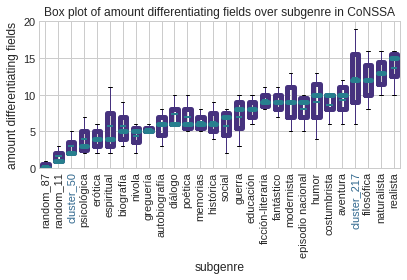

In [87]:
describe_data.boxplots(results_df, "amount differentiating fields",
                       class_by="subgenre", wdir=wdir, dataset="CoNSSA", rotation = 90, sort_by="median",
                      ylim=(0,20), color_label_position=[2,-4])

In [89]:
results_df.loc[results_df["subgenre"]=="social"]["amount differentiating fields"].values

array([8, 7, 2])

Test whether the cluster show statistical differences to the extremes:

In [91]:
stats.ttest_rel(
    results_df.loc[results_df["subgenre"]=="cluster_217"]["amount differentiating fields"].values,
    results_df.loc[results_df["subgenre"]=="realista"]["amount differentiating fields"].values
)

Ttest_relResult(statistic=-0.6099942813304187, pvalue=0.6039409828093303)

In [92]:
stats.ttest_rel(
    results_df.loc[results_df["subgenre"]=="cluster_217"]["amount differentiating fields"].values,
    results_df.loc[results_df["subgenre"]=="random_11"]["amount differentiating fields"].values
)

Ttest_relResult(statistic=3.354511477510138, pvalue=0.07854034604654922)

Test on classification: are these cluster to *easy* to classify?

In [108]:
classification_linguistic_results_df = classify.classify(wdir = wdir, freq_table  = rel_tags_ling_pos_diff_mw_ord_ent_df,
                                metadata = new_metadata_df,
                  classes = ["cluster_50","cluster_217"]+ semantic_subgenres_lt, verbose = True,
                  methods = ["LR"], 
                  max_MFFs = [3000], 
                  text_representations = ["log"],
                  typographies = [True], sampling_mode = "cross", make_relative = False, 
                                under_sample_method = "lpc", sampling_times = 10, outdir_results = wdir)


cut_raw_features          ,@form_punctuation@pos   am.divs  1@person  am.verses  \
ne0001                0.064356  0.000765  0.018683   0.001325   
ne0002                0.095511  0.000501  0.035028   0.000000   
ne0003                0.100304  0.000633  0.044413   0.000000   
ne0004                0.101035  0.000613  0.048261   0.000000   
ne0005                0.091833  0.000571  0.054601   0.000000   

        de@form_adposition@pos  am.sps  2@person  am.paragraphs  \
ne0001                0.052205     0.0  0.012655       0.043937   
ne0002                0.052929     0.0  0.020444       0.017878   
ne0003                0.049310     0.0  0.020160       0.017920   
ne0004                0.051165     0.0  0.022386       0.017341   
ne0005                0.054011     0.0  0.027795       0.010578   

        .@form_punctuation@pos    am.pds           ...            \
ne0001                0.052280  0.023182           ...             
ne0002                0.037056  0.013176           .

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  cluster_50
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  cluster_50
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  cluster_50
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  cluster_50
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  cluster_50
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  cluster_50
(352,)
(352, 3000)
undersampling lpc
undersa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (174,) (174, 3000) lpc
cross validation sampling of  cluster_217
(352,)
(352, 3000)
undersampling lpc
undersampled (174,) (174, 3000) lpc
cross validation sampling of  cluster_217
(352,)
(352, 3000)
undersampling lpc
undersampled (174,) (174, 3000) lpc
cross validation sampling of  cluster_217
(352,)
(352, 3000)
undersampling lpc
undersampled (174,) (174, 3000) lpc
cross validation sampling of  cluster_217
(352,)
(352, 3000)
undersampling lpc
undersampled (174,) (174, 3000) lpc
cross validation sampling of  cluster_217
(352,)
(352, 3000)
undersampling lpc
undersampled (174,) (174, 3000) lpc
cross validation sampling of  cluster_217
(352,)
(352, 3000)
undersa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (52,) (52, 3000) lpc
cross validation sampling of  autobiografía
(352,)
(352, 3000)
undersampling lpc
undersampled (52,) (52, 3000) lpc
cross validation sampling of  autobiografía
(352,)
(352, 3000)
undersampling lpc
undersampled (52,) (52, 3000) lpc
cross validation sampling of  autobiografía
(352,)
(352, 3000)
undersampling lpc
undersampled (52,) (52, 3000) lpc
cross validation sampling of  autobiografía
(352,)
(352, 3000)
undersampling lpc
undersampled (52,) (52, 3000) lpc
cross validation sampling of  autobiografía
(352,)
(352, 3000)
undersampling lpc
undersampled (52,) (52, 3000) lpc
cross validation sampling of  autobiografía
(352,)
(352, 3000)
undersa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (60,) (60, 3000) lpc
cross validation sampling of  biografía
(352,)
(352, 3000)
undersampling lpc
undersampled (60,) (60, 3000) lpc
cross validation sampling of  biografía
(352,)
(352, 3000)
undersampling lpc
undersampled (60,) (60, 3000) lpc
cross validation sampling of  biografía
(352,)
(352, 3000)
undersampling lpc
undersampled (60,) (60, 3000) lpc
cross validation sampling of  biografía
(352,)
(352, 3000)
undersampling lpc
undersampled (60,) (60, 3000) lpc
cross validation sampling of  biografía
(352,)
(352, 3000)
undersampling lpc
undersampled (60,) (60, 3000) lpc
cross validation sampling of  biografía
(352,)
(352, 3000)
undersampling lpc
undersampled 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(352,)
(352, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(352,)
(352, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(352,)
(352, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(352,)
(352, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(352,)
(352, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(352,)
(352, 3000)
undersampling

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7010)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(352,)
(352, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(352,)
(352, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(352,)
(352, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(352,)
(352, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(352,)
(352, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(352,)
(352, 3000)
undersampling lpc
undersampled (18,) (18, 3

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (140,) (140, 3000) lpc
cross validation sampling of  educación
(352,)
(352, 3000)
undersampling lpc
undersampled (140,) (140, 3000) lpc
cross validation sampling of  educación
(352,)
(352, 3000)
undersampling lpc
undersampled (140,) (140, 3000) lpc
cross validation sampling of  educación
(352,)
(352, 3000)
undersampling lpc
undersampled (140,) (140, 3000) lpc
cross validation sampling of  educación
(352,)
(352, 3000)
undersampling lpc
undersampled (140,) (140, 3000) lpc
cross validation sampling of  educación
(352,)
(352, 3000)
undersampling lpc
undersampled (140,) (140, 3000) lpc
cross validation sampling of  educación
(352,)
(352, 3000)
undersampling lpc
u

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(352,)
(352, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(3

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(352,)
(352, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(352,)
(352, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(352,)
(352, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(352,)
(352, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(352,)
(352, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(352,)
(352, 3000)
undersampling lpc
undersampled (34,) (34, 3

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(352,)
(352, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(352,)
(352, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(352,)
(352, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(352,)
(352, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(352,)
(352, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(352,)
(352, 3000)
undersampling lpc
undersa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(352,)
(352, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(352,)
(352, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(352,)
(352, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(352,)
(352, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(352,)
(352, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(352,)
(352, 3000)
undersampling lpc
undersa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (176,) (176, 3000) lpc
cross validation sampling of  filosófica
(352,)
(352, 3000)
undersampling lpc
undersampled (176,) (176, 3000) lpc
cross validation sampling of  filosófica
(352,)
(352, 3000)
undersampling lpc
undersampled (176,) (176, 3000) lpc
cross validation sampling of  filosófica
(352,)
(352, 3000)
undersampling lpc
undersampled (176,) (176, 3000) lpc
cross validation sampling of  filosófica
(352,)
(352, 3000)
undersampling lpc
undersampled (176,) (176, 3000) lpc
cross validation sampling of  filosófica
(352,)
(352, 3000)
undersampling lpc
undersampled (176,) (176, 3000) lpc
cross validation sampling of  filosófica
(352,)
(352, 3000)
undersampling

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7010)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(352,)
(352, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(352,)
(352, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(352,)
(352, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(352,)
(352, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(352,)
(352, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(352,)
(352, 3000)
undersampling lpc
undersampled (4,) (4, 300

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (42,) (42, 3000) lpc
cross validation sampling of  guerra
(352,)
(352, 3000)
undersampling lpc
undersampled (42,) (42, 3000) lpc
cross validation sampling of  guerra
(352,)
(352, 3000)
undersampling lpc
undersampled (42,) (42, 3000) lpc
cross validation sampling of  guerra
(352,)
(352, 3000)
undersampling lpc
undersampled (42,) (42, 3000) lpc
cross validation sampling of  guerra
(352,)
(352, 3000)
undersampling lpc
undersampled (42,) (42, 3000) lpc
cross validation sampling of  guerra
(352,)
(352, 3000)
undersampling lpc
undersampled (42,) (42, 3000) lpc
cross validation sampling of  guerra
(352,)
(352, 3000)
undersampling lpc
undersampled (42,) (42, 3000) l

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (226,) (226, 3000) lpc
cross validation sampling of  histórica
(352,)
(352, 3000)
undersampling lpc
undersampled (226,) (226, 3000) lpc
cross validation sampling of  histórica
(352,)
(352, 3000)
undersampling lpc
undersampled (226,) (226, 3000) lpc
cross validation sampling of  histórica
(352,)
(352, 3000)
undersampling lpc
undersampled (226,) (226, 3000) lpc
cross validation sampling of  histórica
(352,)
(352, 3000)
undersampling lpc
undersampled (226,) (226, 3000) lpc
cross validation sampling of  histórica
(352,)
(352, 3000)
undersampling lpc
undersampled (226,) (226, 3000) lpc
cross validation sampling of  histórica
(352,)
(352, 3000)
undersampling lpc
u

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  humor
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  humor
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  humor
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  humor
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  humor
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  humor
(352,)
(352, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cro

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (110,) (110, 3000) lpc
cross validation sampling of  memorias
(352,)
(352, 3000)
undersampling lpc
undersampled (110,) (110, 3000) lpc
cross validation sampling of  memorias
(352,)
(352, 3000)
undersampling lpc
undersampled (110,) (110, 3000) lpc
cross validation sampling of  memorias
(352,)
(352, 3000)
undersampling lpc
undersampled (110,) (110, 3000) lpc
cross validation sampling of  memorias
(352,)
(352, 3000)
undersampling lpc
undersampled (110,) (110, 3000) lpc
cross validation sampling of  memorias
(352,)
(352, 3000)
undersampling lpc
undersampled (110,) (110, 3000) lpc
cross validation sampling of  memorias
(352,)
(352, 3000)
undersampling lpc
undersa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (70,) (70, 3000) lpc
cross validation sampling of  modernista
(352,)
(352, 3000)
undersampling lpc
undersampled (70,) (70, 3000) lpc
cross validation sampling of  modernista
(352,)
(352, 3000)
undersampling lpc
undersampled (70,) (70, 3000) lpc
cross validation sampling of  modernista
(352,)
(352, 3000)
undersampling lpc
undersampled (70,) (70, 3000) lpc
cross validation sampling of  modernista
(352,)
(352, 3000)
undersampling lpc
undersampled (70,) (70, 3000) lpc
cross validation sampling of  modernista
(352,)
(352, 3000)
undersampling lpc
undersampled (70,) (70, 3000) lpc
cross validation sampling of  modernista
(352,)
(352, 3000)
undersampling lpc
undersa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(352,)
(352, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(352,)
(352, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(352,)
(352, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(352,)
(352, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(352,)
(352, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(352,)
(352, 3000)
undersa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7010)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) l

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7010)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  poética
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  poética
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  poética
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  poética
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  poética
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  poética
(352,)
(352, 3000)
undersampling lpc
undersampled (10,) (10, 3

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(352,)
(352, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(352,)
(352, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(352,)
(352, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(352,)
(352, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(352,)
(352, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(352,)
(352, 3000)
undersampling lpc
u

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (262,) (262, 3000) lpc
cross validation sampling of  realista
(352,)
(352, 3000)
undersampling lpc
undersampled (262,) (262, 3000) lpc
cross validation sampling of  realista
(352,)
(352, 3000)
undersampling lpc
undersampled (262,) (262, 3000) lpc
cross validation sampling of  realista
(352,)
(352, 3000)
undersampling lpc
undersampled (262,) (262, 3000) lpc
cross validation sampling of  realista
(352,)
(352, 3000)
undersampling lpc
undersampled (262,) (262, 3000) lpc
cross validation sampling of  realista
(352,)
(352, 3000)
undersampling lpc
undersampled (262,) (262, 3000) lpc
cross validation sampling of  realista
(352,)
(352, 3000)
undersampling lpc
undersa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (334,) (334, 3000) lpc
cross validation sampling of  social
(352,)
(352, 3000)
undersampling lpc
undersampled (334,) (334, 3000) lpc
cross validation sampling of  social
(352,)
(352, 3000)
undersampling lpc
undersampled (334,) (334, 3000) lpc
cross validation sampling of  social
(352,)
(352, 3000)
undersampling lpc
undersampled (334,) (334, 3000) lpc
cross validation sampling of  social
(352,)
(352, 3000)
undersampling lpc
undersampled (334,) (334, 3000) lpc
cross validation sampling of  social
(352,)
(352, 3000)
undersampling lpc
undersampled (334,) (334, 3000) lpc
cross validation sampling of  social
(352,)
(352, 3000)
undersampling lpc
undersampled (334,)

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(352, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['dirigió@form_verb@pos', 'género@form_noun@pos', 'convertir@form_verb@pos']
method used:	 LR
(352,)
(352, 3000)
undersampling lpc
undersampled (324,) (324, 3000) lpc
cross validation sampling of  ficción-literaria
(352,)
(352, 3000)
undersampling lpc
undersampled (324,) (324, 3000) lpc
cross validation sampling of  ficción-literaria
(352,)
(352, 3000)
undersampling lpc
undersampled (324,) (324, 3000) lpc
cross validation sampling of  ficción-literaria
(352,)
(352, 3000)
undersampling lpc
undersampled (324,) (324, 3000) lpc
cross validation sampling of  ficción-literaria
(352,)
(352, 3000)
undersampling lpc
undersampled (324,) (324, 3000) lpc
cross validation sampling of  ficción-literaria
(352,)
(352, 3000)
undersampling lpc
undersampled (324,) (324, 3000) lpc
cross validation sampling of  ficción-

In [109]:
classification_linguistic_results_df.head()

class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
6             diálogo    1.000     1.000      1.000       0.5        0.500   
20             nivola    0.933     1.000      0.900       0.5        0.433   
5        costumbrista    0.913     0.900      0.967       0.5        0.413   
8   episodio nacional    0.880     0.900      0.867       0.5        0.380   
1         cluster_217    0.877     0.851      0.921       0.5        0.377   

   classifier_name text_representation   MFW  typography  \
6               LR                 log  3000        True   
20              LR                 log  3000        True   
5               LR                 log  3000        True   
8               LR                 log  3000        True   
1               LR                 log  3000        True   

                                                  f1s  test_result_pvalue  \
6   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...        1.049842e-32   
20  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...        1.352700e-44   
5   [0.5, 1.0, 0.67, 1.0, 0.8, 1.0, 1.0, 0.67, 1.0...        1.356691e-38   
8   [0.8, 0.67, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0,...        2.102699e-23   
1   [0.94, 0.88, 0.82, 0.88, 0.82, 0.94, 0.94, 0.7...        4.514778e-59   

                                               labels  sample_size  cv  \
6   ne0250    1
ne0067    0
ne0274    1
ne0232    ...           18   9   
20  ne0073    1
ne0205    0
ne0070    1
ne0336    ...           10   5   
5   ne0390    0
ne0311    1
ne0059    0
ne0087    ...           32  10   
8   ne0240    0
ne0279    1
ne0285    1
ne0361    ...           22  10   
1   ne0018    1
ne0393    0
ne0044    1
ne0250    ...          174  10   

    sampling_times                                         classifier  
6               10  LogisticRegression(C=1.0, class_weight=None, d...  
20              10  LogisticRegression(C=1.0, class_weight=None, d...  
5               10  LogisticRegression(C=1.0, class_weight=None, d...  
8               10  LogisticRegression(C=1.0, class_weight=None, d...  
1               10  LogisticRegression(C=1.0, class_weight=None, d...

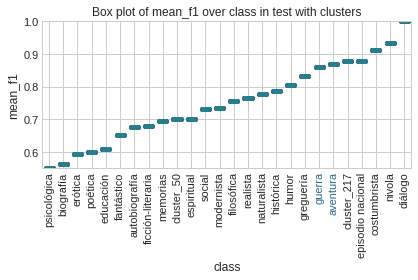

In [110]:
describe_data.boxplots(classification_linguistic_results_df, "mean_f1", "class", wdir, "test with clusters", rotation = 90, figsize=(6,4), baseline=0.5,
                       sort_by="median")

Its results using linguistic features do not show any particularity.

## Modification of Corpus

Addition of these labels to the corpus:

In [110]:
classes_dc = {"cluster_50":"mono-diálogo", "cluster_217":"bucólica"}

In [111]:
new_metadata_df.head()

idno author.name         title  year supergenre   genre  \
ne0001  ne0001      Baroja     Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos  Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos       Nazarin  1895  narrative  novela   
ne0004  ne0004      Galdos         Halma  1895  narrative  novela   
ne0005  ne0005      Galdos      Tristana  1892  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  \
ne0001                  realist          Spain   36912891.0   XX842743   
ne0002                  realist          Spain   71395987.0  XX1014802   
ne0003                  realist          Spain   71395987.0  XX1014802   
ne0004                  realist          Spain   71395987.0  XX1014802   
ne0005            bildungsroman          Spain   71395987.0  XX1014802   

           ...     authorText.relation_ordinal litHist.brow_ordinal  \
ne0001     ...                               0                  NaN   
ne0002     ...                               0                  NaN   
ne0003     ...                               0                  0.0   
ne0004     ...                               0                  NaN   
ne0005     ...                               0                  NaN   

       setting.type_ordinal time.period_ordinal protagonist.age_ordinal  \
ne0001                  1.0                 3.0                     3.0   
ne0002                  3.0                 3.0                     2.0   
ne0003                  3.0                 3.0                     2.0   
ne0004                  3.0                 3.0                     2.0   
ne0005                  3.0                 3.0                     1.0   

       protagonist.socLevel_ordinal end_ordinal representation_ordinal  \
ne0001                          2.0         4.0                      2   
ne0002                          0.0         0.0                      2   
ne0003                          0.0         4.0                      2   
ne0004                          2.0         4.0                      2   
ne0005                          0.0         3.0                      2   

       cluster_50 cluster_217  
ne0001          0           0  
ne0002          0           0  
ne0003          0           0  
ne0004          0           0  
ne0005          0           0  

[5 rows x 213 columns]

In [112]:
import re
import glob
import os

def metadata_from_text(basic_wdir, input_wdir, output_wdir, metadata_df, classes_dc = {"cluster_50":"mono-diálogo", "cluster_217":"bucólica"}):

    # The we open each file
    for doc in glob.glob(basic_wdir+input_wdir):
        idno_file = os.path.basename(doc)
        print(idno_file)
        with open(doc, "r", errors="replace", encoding="utf-8") as fin:
            content = fin.read()
            
            # We take the author of the text (we take the author and not the id because we want to place in the file information about the author)            
            id_ = re.findall(r'<idno\s+type="cligs">(.*?)</idno>', content)[0]
            #print(id_)

            # We delete the items if they were there
            content = re.sub(r'<term type="text.genre.subgenre.litAna" resp="#jct" cert="medium">('+"|".join(list(classes_dc.values()))+')</term>', r'', content)    
            
            try:
                for cluster_key, cluster_value in classes_dc.items():
                    if metadata_df.loc[id_][cluster_key] != 0:
                        content = re.sub(r'(\s+</keywords>)', r'\n\t\t\t\t\t<term type="text.genre.subgenre.cluster" resp="#jct" cert="medium">' + cluster_value + r'</term>\1', content)
            except:
                pass
                    
            with open (os.path.join(basic_wdir+output_wdir, idno_file), "w", encoding="utf-8") as fout:
                fout.write(content)


In [116]:
metadata_from_text("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/", "master/*.xml", "master2/", new_metadata_df, classes_dc = classes_dc)

ne0295.xml
ne0120.xml
ne0095.xml
ne0290.xml
ne0236.xml
ne0390.xml
ne0231.xml
ne0244.xml
ne0002.xml
ne0306.xml
ne0276.xml
ne0185.xml
ne0009.xml
ne0069.xml
ne0073.xml
ne0118.xml
ne0116.xml
ne0393.xml
ne0057.xml
ne0103.xml
ne0131.xml
ne0216.xml
ne0015.xml
ne0259.xml
ne0049.xml
ne0072.xml
ne0005.xml
ne0292.xml
ne0148.xml
ne0031.xml
ne0321.xml
ne0313.xml
ne0399.xml
ne0097.xml
ne0254.xml
ne0223.xml
ne0167.xml
ne0291.xml
ne0264.xml
ne0091.xml
ne0260.xml
ne0297.xml
ne0126.xml
ne0328.xml
ne0039.xml
ne0319.xml
ne0124.xml
ne0320.xml
ne0262.xml
ne0397.xml
ne0160.xml
ne0159.xml
ne0322.xml
ne0032.xml
ne0370.xml
ne0239.xml
ne0035.xml
ne0163.xml
ne0133.xml
ne0021.xml
ne0342.xml
ne0111.xml
ne0176.xml
ne0027.xml
ne0022.xml
ne0234.xml
ne0079.xml
ne0205.xml
ne0187.xml
ne0025.xml
ne0156.xml
ne0252.xml
ne0043.xml
ne0014.xml
ne0056.xml
ne0333.xml
ne0220.xml
ne0395.xml
ne0221.xml
ne0212.xml
ne0362.xml
ne0090.xml
ne0243.xml
ne0378.xml
ne0070.xml
ne0138.xml
ne0398.xml
ne0162.xml
ne0151.xml
ne0019.xml
ne0360.xml

In [117]:
from reading_robot import load_data, get_metadata, tei2text

In [118]:
get_metadata.from_TEIP5("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/","master2/*.xml","metadata","beta-opt-obl-structure")
print("done")

Metadata extracted. Number of documents and metadata columns: (358, 177)
done


In [120]:
metadata_df = load_data.load_metadata(wdir ="/home/jose/Dropbox/Doktorarbeit/novelasespanolas/", metadata_table = "metadata_beta-opt-obl-structure.csv", sep = ",")


metadata and class shape: 	 (358, 177)


In [121]:
metadata_df["subgenre.cluster"]

ne0001                      NaN
ne0002                      NaN
ne0003                      NaN
ne0004                      NaN
ne0005                      NaN
ne0006                      NaN
ne0007                      NaN
ne0008                      NaN
ne0009                      NaN
ne0010                      NaN
ne0011                      NaN
ne0013                 bucólica
ne0014                 bucólica
ne0015                 bucólica
ne0016                 bucólica
ne0017                 bucólica
ne0018                 bucólica
ne0019                      NaN
ne0020                 bucólica
ne0021                 bucólica
ne0022                 bucólica
ne0023                      NaN
ne0024                      NaN
ne0025                      NaN
ne0026                      NaN
ne0027                      NaN
ne0028                      NaN
ne0029                      NaN
ne0030                 bucólica
ne0031                      NaN
                  ...          
ne0360  

In [122]:
process_labels.count_labels_from_sources?

subgenre.cluster
ne0001                       
ne0002                       
ne0003                       
ne0004                       
ne0005                       
ne0006                       
ne0007                       
ne0008                       
ne0009                       
ne0010                       
ne0011                       
ne0013               bucólica
ne0014               bucólica
ne0015               bucólica
ne0016               bucólica
ne0017               bucólica
ne0018               bucólica
ne0019                       
ne0020               bucólica
ne0021               bucólica
ne0022               bucólica
ne0023                       
ne0024                       
ne0025                       
ne0026                       
ne0027                       
ne0028                       
ne0029                       
ne0030               bucólica
ne0031                       
...                       ...
ne0360                       
ne0361                       
ne0362                       
ne0363                       
ne0364               bucólica
ne0365                       
ne0370                       
ne0373               bucólica
ne0378                       
ne0379               bucólica
ne0380               bucólica
ne0381                       
ne0382                       
ne0384                       
ne0385                       
ne0387                       
ne0388                       
ne0390                       
ne0391                       
ne0392                       
ne0393                       
ne0394                       
ne0395                       
ne0396                       
ne0397               bucólica
ne0398                       
ne0399               bucólica
ne0401                       
ne0403  mono-diálogo,bucólica
ne0404                       

[358 rows x 1 columns]

In [127]:
metadata_labels_quantified = process_labels.count_labels_from_sources(["mono-diálogo","bucólica"], metadata_df[["subgenre.cluster"]].fillna(""), ["subgenre.cluster"], wdir)

subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.cluster mono-diálogo
subgenre.c

subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.cluster bucólica
subgenre.clu

In [128]:
metadata_labels_quantified

mono-diálogo bucólica
ne0001            0        0
ne0002            0        0
ne0003            0        0
ne0004            0        0
ne0005            0        0
ne0006            0        0
ne0007            0        0
ne0008            0        0
ne0009            0        0
ne0010            0        0
ne0011            0        0
ne0013            0        1
ne0014            0        1
ne0015            0        1
ne0016            0        1
ne0017            0        1
ne0018            0        1
ne0019            0        0
ne0020            0        1
ne0021            0        1
ne0022            0        1
ne0023            0        0
ne0024            0        0
ne0025            0        0
ne0026            0        0
ne0027            0        0
ne0028            0        0
ne0029            0        0
ne0030            0        1
ne0031            0        0
...             ...      ...
ne0360            0        0
ne0361            0        0
ne0362            0        0
ne0363            0        0
ne0364            0        1
ne0365            0        0
ne0370            0        0
ne0373            0        1
ne0378            0        0
ne0379            0        1
ne0380            0        1
ne0381            0        0
ne0382            0        0
ne0384            0        0
ne0385            0        0
ne0387            0        0
ne0388            0        0
ne0390            0        0
ne0391            0        0
ne0392            0        0
ne0393            0        0
ne0394            0        0
ne0395            0        0
ne0396            0        0
ne0397            0        1
ne0398            0        0
ne0399            0        1
ne0401            0        0
ne0403            1        1
ne0404            0        0

[358 rows x 2 columns]

In [135]:
quantified_subgenre_df = pd.merge(quantified_subgenre_df,metadata_labels_quantified, right_index=True, left_index=True)

In [136]:
quantified_subgenre_df.to_csv(wdir+"new_quantified_subgenre.csv", sep="\t")

In [137]:
quantified_subgenre_df.to_csv("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/new_quantified_subgenre.csv", sep="\t")